In [1]:
database = '../L02languageModel/sqlResult_1558435.csv'
import os
os.path.exists(database) 

True

In [2]:
import pandas as pd
content = pd.read_csv(database, encoding='gb18030')

In [3]:
content = content.fillna('')

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
news_content = content['content'].tolist()

In [6]:
news_content[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [7]:
import jieba
def cut(string):
    return ' '.join(jieba.cut(string))

In [8]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.857 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [9]:
import re
def token(string):
    return re.findall('[\d|\w]+',string)

In [10]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [11]:
news_content = [token(n) for n in news_content]

In [12]:
news_content[0]

['此外',
 '自本周',
 '6月12日',
 '起',
 '除小米手机6等15款机型外',
 '其余机型已暂停更新发布',
 '含开发版',
 '体验版内测',
 '稳定版暂不受影响',
 '以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI',
 '9的研发之中',
 'MIUI',
 '8去年5月发布',
 '距今已有一年有余',
 '也是时候更新换代了',
 '当然',
 '关于MIUI',
 '9的确切信息',
 '我们还是等待官方消息']

In [13]:
news_content = [' '.join(n) for n in news_content]

In [14]:
news_content[0]

'此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息'

In [15]:
news_content = [cut(n) for n in news_content]

In [16]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [17]:
with open('news-sentences-cut.txt', 'w',encoding='utf-8') as f:  #with open 可以省去close()
    for n in news_content:
        f.write(n + '\n')

In [18]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

C:\Users\Administrator\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [19]:
news_word2vec= Word2Vec(LineSentence('news-sentences-cut.txt'), size=35, workers=8)
#size：是指特征向量的维度，默认为100。window：窗口大小，表示当前词与预测词在一个句子中的最大距离是多少。workers：用于控制训练的并行数。

In [20]:
news_word2vec.most_similar('葡萄牙', topn=20)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('意大利', 0.8890459537506104),
 ('捷克', 0.8775872588157654),
 ('克罗地亚', 0.8425456881523132),
 ('摩洛哥', 0.835478663444519),
 ('比利时', 0.8235629796981812),
 ('西班牙', 0.8151254653930664),
 ('马德里', 0.8140965700149536),
 ('乌拉圭', 0.8117578625679016),
 ('比什凯克', 0.8041017651557922),
 ('丹麦', 0.7978264093399048),
 ('奥地利', 0.7960333824157715),
 ('拉脱维亚', 0.7948185205459595),
 ('巴塞罗那', 0.7909833788871765),
 ('苏格兰', 0.7890433073043823),
 ('科特迪瓦', 0.788938045501709),
 ('南非', 0.7792515754699707),
 ('罗马尼亚', 0.7788766622543335),
 ('巴拉圭', 0.7719459533691406),
 ('索', 0.7681878805160522),
 ('瑞士', 0.7667158246040344)]

In [21]:
news_word2vec.most_similar('说', topn=50)  #topn多的时候，错的词较多

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.9068203568458557),
 ('指出', 0.8719408512115479),
 ('认为', 0.8537676334381104),
 ('坦言', 0.7998454570770264),
 ('文说', 0.7890180349349976),
 ('看来', 0.7843242287635803),
 ('称', 0.7574651837348938),
 ('介绍', 0.7462399005889893),
 ('告诉', 0.7403485178947449),
 ('透露', 0.7186117172241211),
 ('强调', 0.7156474590301514),
 ('明说', 0.7086975574493408),
 ('称赞', 0.6706987023353577),
 ('深有体会', 0.664540708065033),
 ('建议', 0.6595683693885803),
 ('所说', 0.6529935002326965),
 ('中说', 0.6517946124076843),
 ('确信', 0.6506383419036865),
 ('时说', 0.6163473129272461),
 ('提到', 0.6142224669456482),
 ('特别强调', 0.6109985113143921),
 ('对瓦姆', 0.5989640951156616),
 ('嚷嚷', 0.5773332118988037),
 ('相信', 0.5759503245353699),
 ('如是说', 0.5746736526489258),
 ('乏人问津', 0.5723994970321655),
 ('还', 0.5713691115379333),
 ('问', 0.5704988241195679),
 ('说道', 0.5700395107269287),
 ('伟说', 0.565660297870636),
 ('资深', 0.5642584562301636),
 ('托说', 0.564059317111969),
 ('坦说', 0.5508701205253601),
 ('直言', 0.5502896308898926),
 ('叙林', 0.55

In [22]:
from collections import defaultdict

In [23]:
def get_related_words(initial_words, model):   #BFS,DFS搜索
    '''
    @initial_words are initial words we already know
    @model is the word2vec model
    '''
    unseen = initial_words
#     seen = set()
    seen = defaultdict(int)  #与搜索问题不同的是，不仅要知道出现的单词，还要知道单词的出现次数
    
    max_size = 500             
    
    while unseen and len(seen) < max_size:   #当看过的单词大于500个即停止，否则运行所有词
        
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        unseen += new_expanding
#         seen.add
        seen[node] += 1    #+1->优化    重复出现的节点，用动态规划减少计算时间
    return seen

In [24]:
len(news_word2vec.wv.vocab)

97927

In [25]:
related_words = get_related_words(['说', '表示'], news_word2vec)

seen length : 0


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


seen length : 50
seen length : 100
seen length : 150
seen length : 150
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 200
seen length : 250
seen length : 300
seen length : 300
seen length : 350
seen length : 400
seen length : 450


In [26]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

[('表示', 78),
 ('指出', 77),
 ('说', 76),
 ('认为', 70),
 ('透露', 68),
 ('坦言', 65),
 ('看来', 60),
 ('告诉', 50),
 ('强调', 44),
 ('介绍', 43),
 ('提到', 39),
 ('文说', 38),
 ('称', 38),
 ('明说', 36),
 ('中说', 33),
 ('确信', 33),
 ('所说', 32),
 ('普遍认为', 31),
 ('建议', 29),
 ('称赞', 27),
 ('特别强调', 27),
 ('深有体会', 26),
 ('呼吁', 22),
 ('直言', 22),
 ('提及', 19),
 ('中称', 18),
 ('时说', 17),
 ('相信', 17),
 ('说明', 17),
 ('眼中', 17),
 ('表明', 16),
 ('写道', 16),
 ('说道', 15),
 ('还称', 15),
 ('证实', 15),
 ('对此', 14),
 ('地说', 14),
 ('感叹', 13),
 ('声称', 13),
 ('叙林', 12),
 ('谈到', 12),
 ('提出', 11),
 ('嚷嚷', 11),
 ('看法', 10),
 ('形容', 10),
 ('对', 10),
 ('祁', 9),
 ('猜测', 9),
 ('撰写', 9),
 ('批评', 9),
 ('如是说', 8),
 ('推测', 8),
 ('FOMC', 8),
 ('重申', 8),
 ('非常高兴', 8),
 ('八竿子打不着', 8),
 ('引用', 8),
 ('回答', 8),
 ('指向', 8),
 ('八面玲珑', 7),
 ('肯定', 7),
 ('见到', 7),
 ('知情', 7),
 ('反复强调', 7),
 ('赞赏', 7),
 ('感激', 7),
 ('原话', 7),
 ('时称', 7),
 ('上称', 7),
 ('质疑', 7),
 ('反映', 7),
 ('对瓦姆', 6),
 ('政务司', 6),
 ('张晓明', 6),
 ('韩长', 6),
 ('万钢', 6),
 ('来说', 6),
 ('来讲', 6),


## TF-IDF keywords

In [27]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [28]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [29]:
document_frequency('小米')

101

In [30]:
import math

In [31]:
def idf(word):
    '''wei get the inversed document frequency'''
    return math.log10(len(news_content)/document_frequency(word))

In [32]:
idf('的') < idf('小米')

True

In [33]:
def tf(word, document):
    '''we get the term frequency of a word in a document'''
    words = document.split()
    return sum(1 for w in words if w == word)

In [34]:
news_content[11]

'巨丰 早评   市场 将 再次 探底   巨丰 观点   周四 大盘 冲高 回落   2500 余 只 个股 下跌   上证 50   沪 深 300 指数 顽强 收红   早盘 大盘 低开 高 走   展开 反弹   沪 指 冲破 120 日 均线 压力 位   午后 大盘 跳水   个股 普跌   盘面 上   保险   电力   银行   民航机场   券商   房地产   人工智能   迪士尼   网络安全 等 板块 涨幅 居前   雄安 新区   福州 新区   医疗器械   丝绸之路 等 跌幅 居前   金融股 全线 大涨   保险 板块 涨 3   新华 保险   中国 太保   中国 人寿 涨 4   中国 平安 涨 2   西水股份   天茂 集团 盘中 大涨 7   以上   银行 板块 涨 2   招商银行 大涨 8   贵阳 银行   兴业银行   浦发银行   兴业银行 等 涨幅 居前   金融股 是 A股 纳入 MSCI 指数 的 受益者   后市 可以 逢 低 关注   盘中 万达 电影   复星 医药 等 白马股 闪崩   导致 午后 市场 出现 大幅 跳水   盘后 消息   银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达   海航 集团   复星   浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析   排查 对象 多 是 近年来 海外投资 比较 凶猛   在 银行业 敞口 较大 的 民营企业 集团   巨丰 投顾 认为 自 5 月 以来   大盘 已经 走出 了 3 重底 的 走势   并 开启 中级 反弹 行情   沪 指 在 上证 50 及 白马股 推动 下 率先 反弹   但 遭遇 60 日   120 日 均线 强 压力 而 出现 调整   MSCI 纳入 A股 后   沪 深 300 指数 创 17 个 月 新高   但 2500 余股 下跌   市场 分化 明显   随着 6 月末 市场 流动性 紧张 的 可能 出现   市场 将 再次出现 探底   建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹   天信 投资   尾盘 跳水 原因 揭秘   伏击 的 品种 曝光   周四 市场 点评   沪 深 两市 早盘 纷纷 低开   但是 开盘 

In [35]:
tf('银行',news_content[11])

6

In [36]:
tf('创业板',news_content[11])

6

In [37]:
tf('短期', news_content[11])

3

In [38]:
idf('创业板')

2.506757120518876

In [39]:
idf('银行')

1.4550169427748936

In [40]:
def get_keywords_of_a_document(document):
    words = set(document.split())  
    tfidf = [
        (w, tf(w,document) * idf(w)) for w in words
    ]
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    return tfidf

In [41]:
get_keywords_of_a_document(news_content[0])

[('MIUI', 13.953993984385477),
 ('机型', 5.854110917055407),
 ('系统优化', 4.9523613237924735),
 ('体验版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('精力', 4.865066660033509),
 ('内测', 4.17421007340883),
 ('官方消息', 3.9523613237924735),
 ('距今已有', 3.6301420290585544),
 ('更新换代', 3.433847383914586),
 ('用到', 3.339577467072738),
 ('确切', 3.139447967149618),
 ('有余', 3.0128420711738553),
 ('小米', 2.948039950009831),
 ('猜测', 2.6828483795745575),
 ('本周', 2.3069390544433817),
 ('其余', 2.2953054709353697),
 ('工程师', 2.2595144045152438),
 ('更新', 2.2143739974590426),
 ('暂停', 2.188933330229536),
 ('发布', 2.15877938610806),
 ('之中', 2.129539678489369),
 ('当然', 2.040139267260058),
 ('等待', 2.0327603000083627),
 ('有人', 1.7504182603908234),
 ('研发', 1.7322532357524185),
 ('手机', 1.7180971994136842),
 ('确保', 1.6071837072497697),
 ('含', 1.5902560044987006),
 ('集中', 1.558260021752429),
 ('时候', 1.5056688574209465),
 ('版', 1.4878717763585023),
 ('开发', 1.428354878235101),
 ('关于', 1.4239588

In [42]:
%prun get_keywords_of_a_document(news_content[0])   #看运行时间

In [43]:
machine_new_keywords = get_keywords_of_a_document(news_content[101])

## wordcloud

In [44]:
import wordcloud

In [45]:
wc = wordcloud.WordCloud('../L03-MachineLearning-HeuristicSearch/SimHei.ttf')

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [47]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

In [48]:
machine_new_keywords_dict

{'0': 0.12495973836320823,
 '1': 0.3482445783310308,
 '10': 0.7960848277894573,
 '15': 0.9544509564457302,
 '169': 2.948039950009831,
 '16992': 4.9523613237924735,
 '2': 0.12008239257713019,
 '2005': 2.513028629962211,
 '2012': 1.9655895895262288,
 '2016': 2.5450574183796917,
 '2017': 0.2022542388651758,
 '22': 1.1569679888611843,
 '23': 1.1108141585359204,
 '32': 1.636600833126739,
 '4': 0.5700969769950187,
 '5': 0.5511525867465363,
 '6': 0.7622602583437212,
 '7': 0.15297252207708978,
 '8': 0.5787505954795428,
 '92': 1.9942754752713885,
 '一': 0.23694300119741732,
 '一定': 1.489215187066124,
 '三一': 3.3503013324645115,
 '三十': 4.6438668975349,
 '上': 0.7073166822180775,
 '上升': 1.7662529439792682,
 '上年': 2.492968836033243,
 '下行': 2.3503013324645115,
 '下降': 1.70783681222239,
 '不': 1.0069391592825077,
 '不过': 1.4431588014613708,
 '专家': 1.3543372514582839,
 '业态': 2.4021329707373793,
 '两位': 2.112255229335716,
 '两年': 1.6603268877977373,
 '两项': 2.46948774018372,
 '个': 0.5035468301229501,
 '中': 0.17

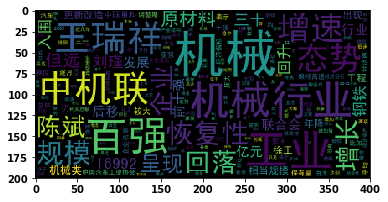

In [49]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [50]:
shenzhen_social_news = get_keywords_of_a_document(news_content[4])

In [51]:
shenzhen_social_news

[('刘青', 67.12860103609216),
 ('女子', 49.805410612821845),
 ('南坪', 23.465811831805492),
 ('交警', 15.805787932978273),
 ('坂田', 13.953993984385477),
 ('黄衣', 13.050903997393533),
 ('巡防', 11.328810194210376),
 ('了', 11.012005636840637),
 ('轻生', 10.382998889874603),
 ('护栏', 9.32178985133465),
 ('裸身', 9.302662656256985),
 ('坂雪岗', 9.302662656256985),
 ('她', 9.285022817533253),
 ('约会', 9.267115391016052),
 ('深圳', 9.139285494790956),
 ('发现', 8.685059498920872),
 ('蜀黍', 8.214526567556433),
 ('网友', 8.126865289542744),
 ('突然', 8.047379355439626),
 ('十多分钟', 7.746360155489698),
 ('内裤', 7.746360155489698),
 ('着', 7.69376356788892),
 ('铁骑', 7.496482682273098),
 ('大概', 7.478906508099729),
 ('缓慢', 7.465405004419699),
 ('龙岗', 7.181266975549762),
 ('快速路', 7.108842630240872),
 ('大道', 6.863158044709045),
 ('环城', 6.816586558884396),
 ('辅警', 6.7921176460503725),
 ('往前走', 6.722593433531949),
 ('走', 6.658635364608071),
 ('视频', 6.65823837544899),
 ('市民', 6.50820380832565),
 ('精神病', 6.4895822953890745),
 ('主干道', 6.4

In [52]:
from PIL import Image

In [53]:
import numpy as np

In [54]:
people_mask = np.array(Image.open('alice_mask.png'))

In [55]:
wordcloud_with_mask = wordcloud.WordCloud(
background_color="white",
font_path='../L03-MachineLearning-HeuristicSearch/SimHei.ttf',
mask=people_mask
)

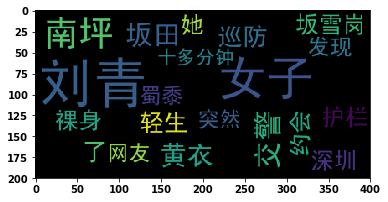

In [56]:
plt.imshow(wc.generate_from_frequencies({w: score for w, score in shenzhen_social_news[:20]}))

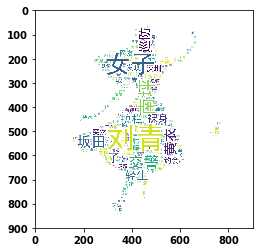

In [59]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w: score for w, score in shenzhen_social_news[:300]}))

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)  #取频率最高的10000个单词

In [61]:
news_content[:3]

['此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台',
 '此前 的 一加 3T 搭载 的 是 3400mAh 电池   DashCharge 快充 规格 为 5V   4A   至于 电池 缩水   可能 与 刘作 虎 所说   一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关   按照 目前 掌握 的 资料   一加 手机 5 拥有 5   5 寸 1080P 三星 AMOLED 显示屏   6G   8GB   RAM   64GB   128GB   ROM   双 1600 万 摄像头   备货 量

In [212]:
sample_num = 50000
sub_samples = news_content[:sample_num]    #为了加快速度，只取前5000个文章

In [213]:
X = vectorizer.fit_transform(sub_samples)
X.shape

(50000, 10000)

In [64]:
vectorizer.vocabulary_

{'此外': 6325,
 '本周': 6040,
 '12': 36,
 '小米': 4140,
 '手机': 5022,
 '15': 58,
 '机型': 6077,
 '其余': 2008,
 '暂停': 5876,
 '更新': 5902,
 '发布': 2802,
 '开发': 4536,
 '影响': 4673,
 '确保': 7379,
 '工程师': 4270,
 '可以': 2908,
 '集中': 9627,
 '全部': 1905,
 '精力': 7676,
 '进行': 9130,
 '工作': 4254,
 '有人': 5954,
 '猜测': 6934,
 '主要': 1086,
 '研发': 7356,
 '之中': 1103,
 '去年': 2734,
 '一年': 442,
 '时候': 5788,
 '当然': 4652,
 '关于': 1978,
 '信息': 1700,
 '我们': 4949,
 '还是': 9061,
 '等待': 7617,
 '骁龙': 9882,
 '835': 238,
 '作为': 1590,
 '唯一': 3145,
 '通过': 9235,
 'windows': 364,
 '10': 11,
 '平台': 4382,
 '认证': 8510,
 '处理器': 3497,
 '高通': 9951,
 '强调': 4622,
 '不会': 703,
 '因为': 3236,
 '考虑': 7995,
 '性能': 4786,
 '核心': 6210,
 '相反': 7242,
 '他们': 1405,
 '联手': 8032,
 '微软': 4729,
 '找到': 5096,
 '一种': 486,
 '适合': 9188,
 '兼顾': 2028,
 '完美': 3944,
 '方案': 5684,
 '报道': 5176,
 '已经': 4296,
 '拿到': 5240,
 '一些': 378,
 '以便': 1425,
 '更好': 5899,
 '理解': 7011,
 '架构': 6163,
 '资料': 8755,
 '显示': 5844,
 '一款': 471,
 '集成': 9633,
 'cpu': 283,
 '传统': 1517,
 '节省': 8186,
 '至少

In [65]:
import numpy as np
x = np.array([1,2,3,4,5])
np.where(x)

(array([0, 1, 2, 3, 4], dtype=int64),)

In [217]:
np.where(X[0].toarray()[0])   #np.where(x) 返回非零元素的下标

(array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631], dtype=int64),)

In [68]:
X[0].toarray()[0][4140]   #小米 18002   tfidf

0.2119373709775164

In [69]:
X[0].toarray()[0][4949]  #我们 4949

0.08503195169915917

In [71]:
word_2_id = vectorizer.vocabulary_
id_2_word = {d: w for w, d in word_2_id.items()}

In [73]:
word_2_id['小米']

4140

In [74]:
id_2_word[4140]

'小米'

In [75]:
np.where(X.toarray())  #行，列

(array([   0,    0,    0, ..., 4999, 4999, 4999], dtype=int64),
 array([  36,   58,  442, ..., 9713, 9755, 9834], dtype=int64))

In [102]:
help(X[0].toarray)

Help on method toarray in module scipy.sparse.compressed:

toarray(order=None, out=None) method of scipy.sparse.csr.csr_matrix instance
    Return a dense ndarray representation of this matrix.
    
    Parameters
    ----------
    order : {'C', 'F'}, optional
        Whether to store multi-dimensional data in C (row-major)
        or Fortran (column-major) order in memory. The default
        is 'None', indicating the NumPy default of C-ordered.
        Cannot be specified in conjunction with the `out`
        argument.
    
    out : ndarray, 2-dimensional, optional
        If specified, uses this array as the output buffer
        instead of allocating a new array to return. The provided
        array must have the same shape and dtype as the sparse
        matrix on which you are calling the method. For most
        sparse types, `out` is required to be memory contiguous
        (either C or Fortran ordered).
    
    Returns
    -------
    arr : ndarray, 2-dimensional
        An

In [183]:
import random 
document_id_1, document_id_2 = random.randint(0,5000),random.randint(0,5000)

In [184]:
document_id_1

593

In [185]:
document_id_2

3554

In [186]:
news_content[document_id_1]

'新华社 长春 ６ 月 ２ ３ 日电   记者 刘硕   记者 从 吉林 机场 集团 获悉   ７ 月   ８ 月 暑运 旺季 期间   长春 机场 预计 将 有 １ ０ 家 航空公司 增加 １ ４ ７ ０ 架次 航班   满足 旅客 出行 需求   长春 是 我国 重要 的 夏季 避暑 旅游 目的地 之一   每年 暑运 期间 进出 旅客 较 多   根据 计划   长春 机场 将 与 长沙   兰州   太原   南昌   呼和浩特   银川   烟台   威海   南通   连云港   海拉尔   长白山 和 美属 塞班岛 等 旅游 城市 之间 增开 航班 １ ４ ７ ０ 架次   部分 航班 的 执 飞机 型 也 做出 调整   东方航空 和 韩亚 航空 将 固定 使用 Ａ ３ ３ ０ 宽体 客机 执行 长春   上海浦东   Ｍ Ｕ ５ ６ ９ ８   和 长春   韩国 首尔   Ｏ Ｚ ３ ０ ３   ４   航班   保障 充足 运力   目前   长春 机场 累计 有 ３ ５ 家 航空公司 运营 １ １ ８ 条 航线   通航 ６ ５ 个 城市   今年 新增 徐州 和 南通 等 航点   恢复 银川   太原   常州 等 航点   截至 目前   长春 机场 今年 旅客 吞吐量 超过 ５ １ ５ 万人次   同比 增长 超过 ２ ０   预计 年内 旅客 吞吐量 将 突破 千万人次'

In [187]:
news_content[document_id_2]

'中新网 6 月 19 日电   据 外媒 报道   当地 时间 18 日   英国伦敦 芬斯 伯里 公园 区域 发生 货车 冲撞 人群 的 袭击 事件   警方 证实 事件 导致 1 人 死亡   8 人 受伤   警方 目前 正在 将 此次 袭击 作为   潜在 恐怖袭击   进行 调查   图为 事故 目击者 Boubou   Sougou 讲述 事发 情景   中新社 记者   周兆军   摄   英国首相 特蕾莎   梅 已经 证实   反恐 指挥部 已经 介入   同时 派遣 了 全副武装 的 警员 巡逻 作为 预防措施   特蕾莎   梅在 今早 的 声明 中 表示   警方 正在 将 此次 袭击 作为   潜在 的 恐怖袭击   进行 调查   她 说   我 稍后 将会 主持 紧急会议   我 向 袭击 受害者 及其 家人 表示慰问   伦敦 市长 萨迪克   汉 谴责 此次 袭击 是 针对 无辜 民众 的   可怕 的 恐怖袭击   当地 时间 18 日   一辆 厢型 车于 伦敦 芬斯 伯里 公园 区域 冲撞 人群   导致 10 人 受伤   英国 天空 新闻 电视台 援引 目击者 的话 称   在 伦敦 东北部 冲撞 行人 货车 上 的 3 名 男子 中 2 人 逃脱   目击者 称   货车 中有 3 人   警方 拘捕 1 人   另 2 人 在 逃   免责 声明   本文 仅 代表 作者 个人观点   与 环球网 无关   其 原创性 以及 文中 陈述 文字 和 内容 未经 本站 证实   对 本文 以及 其中 全部 或者 部分 内容   文字 的 真实性   完整性   及时性 本站 不 作 任何 保证 或 承诺   请 读者 仅作 参考   并 请 自行 核实 相关 内容'

In [216]:
np.where(X[document_id_1].toarray()[0])

(array([ 392,  930,  955, 1217, 1458, 1539, 1601, 1647, 1806, 2028, 2462,
        2467, 2817, 2835, 2874, 2919, 3066, 3231, 3294, 3309, 3350, 3548,
        3857, 4234, 4277, 4689, 4804, 4837, 4926, 5489, 5497, 5547, 5549,
        5605, 5653, 5881, 5931, 6078, 6236, 6667, 6748, 7188, 7193, 7512,
        7693, 8161, 8162, 8163, 8167, 8284, 8541, 8569, 8685, 8873, 9060,
        9125, 9160, 9242, 9323, 9378, 9429, 9466, 9473, 9636, 9657, 9702,
        9745, 9795, 9831], dtype=int64),)

In [189]:
np.where(X[document_id_2].toarray()[0])

(array([  11,   74,   77,  511,  842,  909,  984,  985,  988, 1071, 1177,
        1183, 1189, 1348, 1368, 1383, 1416, 1429, 1452, 1529, 1532, 1590,
        1599, 1685, 1851, 1905, 1930, 2004, 2034, 2097, 2530, 2710, 2750,
        2756, 2758, 2782, 2815, 2848, 2851, 2909, 3016, 3318, 3485, 3534,
        3701, 3942, 4036, 4100, 4109, 4248, 4296, 4332, 4638, 4829, 4956,
        5107, 5176, 5265, 5406, 5608, 5615, 5672, 5716, 5733, 5762, 5803,
        6037, 6049, 6058, 6209, 6307, 6329, 6343, 6401, 6764, 6914, 6966,
        7106, 7117, 7180, 7215, 7216, 7240, 7291, 8128, 8192, 8207, 8209,
        8212, 8329, 8369, 8384, 8481, 8489, 8528, 8532, 8563, 8641, 8652,
        8672, 8718, 9130, 9304, 9400, 9547], dtype=int64),)

In [190]:
vector_of_d_1 = X[document_id_1].toarray()[0]
vector_of_d_2 = X[document_id_2].toarray()[0]

In [205]:
random_choose = random.randint(0,1000)

In [206]:
random_choose

943

In [193]:
news_content[random_choose]

'中国 证券网 讯   据 工信部 6 月 22 日 消息   日前   工业 和 信息化 部党组 书记   部长 苗圩 出席 第十八届 中国   青海 绿色 发展 投资 贸易 洽谈会 开幕式   苗圩 在 致辞 中 指出   当今世界   资源 和 环境 问题 是 人类 面临 的 共同 挑战   面对 国际 绿色 发展趋势 和 国内 资源 环境 瓶颈   加快 我国 制造业 绿色 发展   推进 产业结构 升级   提高 资源 能源 利用率   减少 工业 领域 温室 气体 和 污染物 排放   培育 绿色 品牌   打造 制造业 竞争 新 优势   已经 刻不容缓   近年来   中央 把 生态 文明 建设 纳入 五位一体 的 总体布局   党 的 十八 届 五中全会 提出   创新   协调   绿色   开放   共享   五大 发展 理念   中国 制造 2025   把   创新 驱动   质量 为先   绿色 发展   结构 优化   人才 为本   作为 基本方针   部署 实施 智能 制造   绿色 制造 等 五大 工程   工业 和 信息化 部 积极 落实 中央 有关 决策 部署   不断 健全 政策 标准 体系   大力 推进 传统 制造业 绿色 化 改造   推进 工业 能效 提升   强化 工业 资源 综合利用   推动 清洁 生产 水平 提高   积极 培育 节能 环保   新能源 汽车 等 新兴产业   苗圩 表示   青洽会 突出 绿色 发展 理念   连续 多年 成功 举办   已经 成为 绿色 发展 领域 一个 品牌   取得 了 很 好 的 社会 效果   将 对 青海 实现 绿色 发展 产生 重要 促进作用   工业 和 信息化 部将 进一步 加强 与 青海省 的 战略 合作   大力支持 青海省 深入 贯彻落实 制造 强国   网络 强国 等 重大 战略部署   不断 提升 工业 绿色 发展 水平   加快 促进 产业 迈向 中 高端   在 青海 期间   苗圩 一行 深入 西宁   国家级   经济 技术开发区 东川 工业园区 和 南川 工业园区 调研 部分 重点 企业   苗圩 充分肯定 了 青海省 近年来 工业 和 通信业 发展 取得 的 成绩   他 指出   青海省 是 国家 重要 生态 安全 屏障 和 国家 战

In [194]:
from scipy.spatial.distance import cosine  

$cosine = 1-\frac{u.v}{|u|.|v|}$

In [195]:
def distance(v1, v2): return cosine(v1, v2)   #越接近于0，夹角越小，越相似

In [196]:
distance([1,1],[2,2])

0.0

In [218]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])    

0.9978052459441862

In [219]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])  #更接近于document_1, 区分度不高，可能数据量不够

0.9984947086158904

In [199]:
distance(X[document_id_1].toarray()[0], X[document_id_2].toarray()[0])

0.9940215488096614

In [207]:
sorted(list(range(1000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\spatial\distance.py:644: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[943,
 23,
 110,
 273,
 117,
 18,
 15,
 7,
 11,
 5,
 14,
 34,
 3,
 39,
 76,
 112,
 107,
 46,
 13,
 9,
 10,
 20,
 96,
 19,
 91,
 84,
 21,
 105,
 35,
 8,
 94,
 98,
 101,
 51,
 65,
 38,
 108,
 111,
 43,
 72,
 64,
 88,
 26,
 30,
 4,
 95,
 52,
 113,
 27,
 77,
 68,
 12,
 61,
 42,
 56,
 123,
 70,
 97,
 62,
 92,
 29,
 119,
 63,
 53,
 55,
 47,
 90,
 48,
 114,
 58,
 33,
 99,
 16,
 78,
 109,
 83,
 6,
 85,
 116,
 106,
 44,
 80,
 69,
 71,
 36,
 67,
 124,
 60,
 17,
 57,
 121,
 120,
 40,
 2,
 1,
 81,
 122,
 41,
 31,
 102,
 125,
 66,
 93,
 54,
 118,
 49,
 28,
 0,
 22,
 24,
 25,
 32,
 37,
 45,
 50,
 59,
 73,
 74,
 75,
 79,
 82,
 86,
 87,
 89,
 100,
 103,
 970,
 995,
 937,
 964,
 940,
 966,
 958,
 931,
 934,
 946,
 889,
 887,
 808,
 954,
 270,
 805,
 914,
 842,
 605,
 306,
 219,
 891,
 783,
 868,
 846,
 882,
 908,
 169,
 282,
 904,
 632,
 244,
 150,
 790,
 296,
 290,
 918,
 794,
 295,
 982,
 830,
 658,
 802,
 921,
 263,
 623,
 877,
 825,
 832,
 942,
 205,
 776,
 734,
 272,
 389,
 951,
 849,
 860,
 990,


In [208]:
distance(X[random_choose].toarray()[0], X[23].toarray()[0])

0.8354757192231967

In [209]:
news_content[23]

'中证网 讯   本报记者   张怡   与 此前 两日 蓝筹股 强势 格局 不同   周五   A股 市场 主要 指数 低开 之后 震荡 上扬   不过 接近 中午 收盘 时 突然 大幅 跳水   仅 有 房地产 板块 微涨   主要 指数 均 回落 翻绿   创业板 指 跌幅 超过 1   至 中午 收盘   上证综指 下跌 0   74   收于 3124   23 点   深证 成指 下跌 0   45   收于 10219   41 点   创业板 指 下跌 1   01   收于 1780   20 点   中小板 指 下跌 0   34   收于 6731   24 点   沪 深 两市 成交额 分别 为 914   46 亿元 和 1208   16 亿元   环比 小幅 放量   行业 方面   29 个 中信 一级 行业 中   中午 收盘 时仅 有 房地产 这 一个 行业 收红   上涨 0   53   相对而言   家电   食品饮料   煤炭 等 板块 跌幅 较 小   下跌 均 未 超过 0   4   而 交通运输   传媒   计算机   纺织 服装 和 国防 军工 等 板块 的 跌幅 均 超过 1   概念 方面   中午 收盘 时仅 有 石墨 烯 和 冷链 物流 指数 收红   分别 上涨 0   83   和 0   27   相对而言   雄安 新区   页岩 气 和 煤层气   特斯拉   可燃冰 等 板 指数 的 跌幅 均 超过 2   总体 来看   此前 两个 交易日 蓝筹股 表现 较强   但是 短线 增量 资金 没有 入场 的 情况 下   存量 博弈 使得 虹吸 效应 再现   中 小盘 题材股 连续 下跌   不过 当前 市场 并 不 存在 持续 大幅 下跌 的 基础   短线 下跌 或许 会 创造 低吸 良机'

In [128]:
distance(X[random_choose].toarray()[0], X[101].toarray()[0])

0.8691294069192805

## build search engine
input: words

ouput: documents

用布尔搜索加快搜索过程

In [135]:
len(news_content)

89611

In [136]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    # O(D * w) 

In [139]:
np.where(X[0].toarray()[0])

array([  36,   58,  442, 1086, 1103, 1700, 1905, 1978, 2008, 2734, 2802,
       2908, 4140, 4254, 4270, 4536, 4652, 4673, 4949, 5022, 5788, 5876,
       5902, 5954, 6040, 6077, 6325, 6934, 7356, 7379, 7617, 7676, 9061,
       9130, 9627], dtype=int64)

In [145]:
set(np.where(X[0].toarray()[0])[0])

{36,
 58,
 442,
 1086,
 1103,
 1700,
 1905,
 1978,
 2008,
 2734,
 2802,
 2908,
 4140,
 4254,
 4270,
 4536,
 4652,
 4673,
 4949,
 5022,
 5788,
 5876,
 5902,
 5954,
 6040,
 6077,
 6325,
 6934,
 7356,
 7379,
 7617,
 7676,
 9061,
 9130,
 9627}

In [220]:
X.shape

(50000, 10000)

In [221]:
transposed_x = X.transpose().toarray()  #TFIDF转置，就是布尔搜索，速度快

In [222]:
np.where(transposed_x[0])  #第0个单词在哪些document中出现

(array([   66,    92,   149,   158,   171,   210,   222,   347,   350,
          487,   488,   525,   526,   979,   985,  1120,  1139,  1355,
         1401,  1531,  1556,  1593,  1599,  1635,  1652,  1672,  1682,
         1699,  1718,  1727,  1731,  1753,  1903,  2003,  2036,  2148,
         2205,  2224,  2275,  2444,  2493,  2510,  2530,  2554,  2555,
         2656,  2694,  2713,  2731,  3004,  3026,  3746,  3791,  3824,
         3828,  3910,  4076,  4078,  4092,  4098,  4232,  4386,  4395,
         4518,  4543,  4608,  4613,  4678,  4690,  4807,  4834,  4855,
         4964,  4978,  4980,  5067,  5135,  5170,  5199,  5200,  5209,
         5211,  5241,  5257,  5281,  5391,  5403,  5440,  5460,  5521,
         5694,  5729,  5743,  5760,  5763,  5771,  5783,  5793,  5795,
         5814,  5826,  5828,  5908,  5909,  6001,  6015,  6018,  6079,
         6127,  6222,  6236,  6378,  6560,  6623,  6632,  6688,  6696,
         6703,  6710,  6721,  6747,  6757,  6760,  6763,  6764,  6776,
      

In [223]:
word_2_id = vectorizer.vocabulary_

In [224]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [225]:
id_2_word[488]

'上海申花'

In [226]:
word_2_id['美军']

7922

In [227]:
word_2_id['司令']

2769

In [228]:
np.where(transposed_x[7922])

(array([   20,   239,   250,   272,   303,   786,   797,   836,   924,
         1202,  1218,  1613,  1645,  1651,  1662,  1670,  1673,  1688,
         1691,  1697,  1721,  1728,  1766,  1780,  1849,  1935,  1975,
         1988,  1999,  2017,  2018,  2199,  2344,  2354,  2721,  2752,
         2775,  2785,  2788,  2809,  2818,  2826,  2830,  2841,  2844,
         2868,  2874,  2963,  3064,  3120,  3138,  3153,  3160,  3178,
         3265,  3283,  3309,  3332,  3353,  3388,  3409,  3422,  3458,
         3475,  3497,  3507,  3596,  3841,  3861,  3876,  3880,  3889,
         3894,  3896,  3900,  3915,  3921,  3942,  3944,  3959,  3984,
         4124,  4228,  4244,  4311,  4437,  4524,  4646,  4680,  4711,
         4725,  4868,  4908,  5032,  5216,  5236,  5255,  5268,  5316,
         5318,  5333,  5346,  5354,  5363,  5404,  5425,  5615,  5669,
         5940,  6005,  6192,  6330,  6380,  6443,  6466,  6793,  6817,
         6824,  6865,  6959,  7049,  7053,  7620,  7683,  7701,  7702,
      

In [229]:
type(np.where(transposed_x[7922]))

tuple

In [232]:
type(np.where(transposed_x[7922])[0])

numpy.ndarray

In [234]:
np.where(transposed_x[7922])[0]

array([   20,   239,   250,   272,   303,   786,   797,   836,   924,
        1202,  1218,  1613,  1645,  1651,  1662,  1670,  1673,  1688,
        1691,  1697,  1721,  1728,  1766,  1780,  1849,  1935,  1975,
        1988,  1999,  2017,  2018,  2199,  2344,  2354,  2721,  2752,
        2775,  2785,  2788,  2809,  2818,  2826,  2830,  2841,  2844,
        2868,  2874,  2963,  3064,  3120,  3138,  3153,  3160,  3178,
        3265,  3283,  3309,  3332,  3353,  3388,  3409,  3422,  3458,
        3475,  3497,  3507,  3596,  3841,  3861,  3876,  3880,  3889,
        3894,  3896,  3900,  3915,  3921,  3942,  3944,  3959,  3984,
        4124,  4228,  4244,  4311,  4437,  4524,  4646,  4680,  4711,
        4725,  4868,  4908,  5032,  5216,  5236,  5255,  5268,  5316,
        5318,  5333,  5346,  5354,  5363,  5404,  5425,  5615,  5669,
        5940,  6005,  6192,  6330,  6380,  6443,  6466,  6793,  6817,
        6824,  6865,  6959,  7049,  7053,  7620,  7683,  7701,  7702,
        7737,  7748,

In [159]:
usa_force = set(np.where(transposed_x[7922])[0])

In [160]:
np.where(transposed_x[7922])

(array([  20,  239,  250,  272,  303,  786,  797,  836,  924, 1202, 1218,
        1613, 1645, 1651, 1662, 1670, 1673, 1688, 1691, 1697, 1721, 1728,
        1766, 1780, 1849, 1935, 1975, 1988, 1999, 2017, 2018, 2199, 2344,
        2354, 2721, 2752, 2775, 2785, 2788, 2809, 2818, 2826, 2830, 2841,
        2844, 2868, 2874, 2963, 3064, 3120, 3138, 3153, 3160, 3178, 3265,
        3283, 3309, 3332, 3353, 3388, 3409, 3422, 3458, 3475, 3497, 3507,
        3596, 3841, 3861, 3876, 3880, 3889, 3894, 3896, 3900, 3915, 3921,
        3942, 3944, 3959, 3984, 4124, 4228, 4244, 4311, 4437, 4524, 4646,
        4680, 4711, 4725, 4868, 4908], dtype=int64),)

In [239]:
commander = set(np.where(transposed_x[2769])[0])

In [240]:
usa_force & commander

{836, 1218, 1613, 1935, 2844, 3160, 3283, 3309, 3959, 3984, 4244, 4908}

In [241]:
from functools import reduce

In [242]:
d1, d2,d3 = {1,2,3}, {4,5,6,3,2}, {1,3,4}

In [243]:
from operator import and_    #operator加减乘除运算

In [166]:
reduce(and_, [d1, d2, d3])

{3}

In [244]:
def search_engine(query):
    '''
    query is the searched words, splited by space
    return is the related documents which ranked by tfidf similarity
    '''
    words = query.split()
    
    query_vec = vectorizer.transform([' '.join(words)]).toarray()[0]
    
    candidates_ids = [word_2_id[w] for w in words]
    documents_ids = [
        set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    merged_documents = reduce(and_, documents_ids)  #哪些文章包含这些单词
    
    return merged_documents

In [245]:
search_engine('美军 司令 航母')   #时间加快

{2844, 21484, 21523, 22987}

In [250]:
%%timeit
naive_search('美军 司令 航母'.split())

84.3 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [249]:
%%timeit
search_engine('美军 司令 航母')

14.9 ms ± 459 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [251]:
search_engine('美联储 加息 次数')

{2189}

In [252]:
content['content'][2189]

'\u3000\u30006月15日凌晨，是美联储公布利率决议的时刻，截至发稿，联邦基金利率期货蕴含的加息概率为100%。\r\n\u3000\u3000但多位分析人士告诉中国证券报记者，目前而言，单纯从加息的角度看，市场已经充分定价，此次会议透露出来的美联储对下半年加息和缩表的态度将成为接下来市场关注焦点。此外，大宗商品近期走势与美元相关性走弱，未来也将更多受国内基本面主导，并趋向震荡偏弱。\r\n\u3000\u3000市场聚焦美联储\r\n\u3000\u3000在美联储利率决议公布前夕的紧张气氛中，黄金屏息以待，本周来持续窄幅震荡，截至昨日，COMEX黄金期货主力报收1269.7美元/盎司。与此同时，原油期货震荡区间也明显收窄。而在此前，黄金、原油期货均出现明显跌幅。\r\n\u3000\u3000南华宏观章睿哲表示，目前美联储加息已被市场充分预期，周四重点关注美联储对下半年几次议息会议的态度，如果态度不够鹰派，那么美元可能还会下行，黄金短期内还会上涨。\r\n\u3000\u3000如何看待美联储货币政策后续走势？\r\n\u3000\u3000“当前市场的核心焦点在美联储对下半年加息和缩表的态度。”浙商期货研究中心首席宏观分析师洪清源表示，6月美联储加息基本被市场充分预期，议息会议前市场预期的加息概率就已高达99%。加息本身对市场的冲击并不大。“从当前美国经济基本面看，补库存周期进入尾声，薪资增长放缓，消费后继增长乏力，经济复苏面临一定压力。特朗普政策是当前美国经济最大的不确定因素，其减税和基建刺激计划有利于提振私人部门投资，但从目前推进的情况看并不是很顺畅，8月前税改能否推出则十分关键。同时，市场表现中，本次加息是市场反应最不积极的一次加息，以往每次加息前美债收益率和美元均有所上涨，而近期美债收益率不升反降、美元持续疲弱，体现出市场对美国经济持续复苏的担忧。因此来看，近期美联储难以鹰派，对下半年加息和缩表的预期也有望放缓。”\r\n\u3000\u3000值得注意的是，国金宏观边泉水团队认为，本次美联储会议将会公布新的点阵图，其对未来缩表相关细节的披露，以及点阵图蕴含的加息次数，将是影响市场的关键变量。当前市场对9月进一步加息预期不高（联邦基金利率期货蕴含的加息概率不超过50%），如果相关信息偏鹰，可能推升美国国债收益率，提振美元指数，打压黄金价格。\

In [253]:
np.where(vectorizer.transform(['美联储 加息 次数']).toarray()[0])

(array([2253, 6150, 7944], dtype=int64),)

In [256]:
def search_engine_sorted(query):    #搜索排序
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorizer.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [257]:
search_engine_sorted('美军 司令 航母')

[22987, 21523, 21484, 2844]

In [258]:
search_engine('美军 司令 航母') 

{2844, 21484, 21523, 22987}

In [260]:
candidates_ids = search_engine_sorted('美军 司令 航母')
for i, _id in enumerate(candidates_ids):
    print('## Search Result {}'.format(i))
    print(content['content'][_id])

## Search Result 0
　　新华社北京４月１０日电新闻分析：“卡尔·文森”号航母缘何成西太平洋军情新主角\n　　新华社记者刘莉莉\n　　美国海军第三舰队下属的“卡尔·文森”号航母打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调航母打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\n　　（小标题）侧重对地攻击\n　　据第三舰队网站主页发布的消息，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”号航母打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号是“尼米兹”级核动力航母，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级航母是核动力多用途航母，也是美国海军远洋作战群的核心力量。\n　　“卡尔·文森”航母打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\n　　据军事专业人士介绍，航母打击群与航母战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而航母打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\n　　（小标题）配角跻身主角\n　　第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个航母打击群，分别是以“卡尔·文森”号为核心的第一航母打击群、以“约翰·斯坦尼斯”号为核心的第三航母打击群、以“西奥多·罗斯福”号为核心的第九航母打击群和以“尼米兹”号为核心的第十一航母打击群。　\n　　资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执行前沿部署和应急反应任务的第七舰队有需要时，第三舰队才会奉令前去换班或增援。但自２０１５年下半年以来，太平洋舰队打破了延续数十年的惯例，大幅提升第三舰队的活跃度，令其开始更多涉足西太平洋地区。\n　　“实际上，这是美军根据新的‘全球一体化’军事战略而做的调整，目的是优化资源、改变本土与前沿

In [261]:
text = '''
新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）
'''

In [262]:
print(text)


新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。
　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。
　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。
　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）



In [263]:
import re

In [265]:
text1 = '''美国有线电视新闻网援引美国军方官员的话说'''
pat = r'(新闻|官员)'
re.compile(pat).sub(repl="**\g<1>**", string=text1)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [266]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [267]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [271]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document)

In [272]:
highlight_keywords(get_query_pat('美军 司令 航母'), content['content'][22987])

'\u3000\u3000新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\\n\u3000\u3000新华社记者刘莉莉\\n\u3000\u3000美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\\n\u3000\u3000（小标题）侧重对地攻击\\n\u3000\u3000据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\\n\u3000\u3000“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\\n\u3000\u3000“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\\n\u3000\u3000据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\\n\u3000\u3000（小标题）配角跻身主角\\n\u3000\u3000第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。\u3000\\n\u3000\u3000资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期

In [273]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine_sorted(query)
    for i, _id in enumerate(candidates_ids):
        print('## Search Result {}'.format(i))
        print(content['content'][_id])
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)
        print(c)

In [274]:
search_engine_with_pretty_print('美军 司令 航母')

## Search Result 0
　　新华社北京４月１０日电新闻分析：“卡尔·文森”号航母缘何成西太平洋军情新主角\n　　新华社记者刘莉莉\n　　美国海军第三舰队下属的“卡尔·文森”号航母打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调航母打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\n　　（小标题）侧重对地攻击\n　　据第三舰队网站主页发布的消息，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”号航母打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号是“尼米兹”级核动力航母，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级航母是核动力多用途航母，也是美国海军远洋作战群的核心力量。\n　　“卡尔·文森”航母打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\n　　据军事专业人士介绍，航母打击群与航母战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而航母打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\n　　（小标题）配角跻身主角\n　　第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个航母打击群，分别是以“卡尔·文森”号为核心的第一航母打击群、以“约翰·斯坦尼斯”号为核心的第三航母打击群、以“西奥多·罗斯福”号为核心的第九航母打击群和以“尼米兹”号为核心的第十一航母打击群。　\n　　资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执行前沿部署和应急反应任务的第七舰队有需要时，第三舰队才会奉令前去换班或增援。但自２０１５年下半年以来，太平洋舰队打破了延续数十年的惯例，大幅提升第三舰队的活跃度，令其开始更多涉足西太平洋地区。\n　　“实际上，这是美军根据新的‘全球一体化’军事战略而做的调整，目的是优化资源、改变本土与前沿

In [275]:
from IPython.display import display, Markdown
def search_engine_with_pretty_print2(query):     #高亮显示，类似于百度等搜索引擎
    candidates_ids = search_engine_sorted(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)
        display(Markdown(title + '\n' + c))

In [276]:
search_engine_with_pretty_print2('美军 司令 航母')

## Search Result 0
　　新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\n　　新华社记者刘莉莉\n　　美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\n　　（小标题）侧重对地攻击\n　　据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\n　　“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\n　　据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\n　　（小标题）配角跻身主角\n　　第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。　\n　　资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执行前沿部署和应急反应任务的第七舰队有需要时，第三舰队才会奉令前去换班或增援。但自２０１５年下半年以来，太平洋舰队打破了延续数十年的惯例，大幅提升第三舰队的活跃度，令其开始更多涉足西太平洋地区。\n　　“实际上，这是**美军**根据新的‘全球一体化’军事战略而做的调整，目的是优化资源、改变本土与前沿的兵力平衡，缓解目前美国海军兵力不足与战线过长、资源下滑与保持战备之间的尖锐矛盾，”石宏说。\n　　正因如此，“卡尔·文森”号**航母**开始忙碌起来。自从今年１月离开母港后，“卡尔·文森”号边走边练，特别是在夏威夷和关岛水域与当地驻扎部队进行了多轮演训。２月１８日，“卡尔·文森”号**航母**进入南海水域进行所谓“巡航”；３月１５日，“卡尔·文森”号抵达韩国釜山，随后在２０日参加了美韩“关键决断”联合军演。４月４日，“卡尔·文森”号抵达新加坡，原本计划南下前往澳大利亚，但随后接到再度北上命令，赶往朝鲜半岛附近海域。\n　　（小标题）或在火上浇油\n　　一名不愿公开姓名的五角大楼官员告诉美国有线电视新闻网，“卡尔·文森”号**航母**打击群驶向西太平洋的朝鲜半岛水域，“旨在对近期朝鲜的挑衅行为作出回应”。\n　　包括“卡尔·文森”号在内的美国海军新近动向引起各方关注。不少人担心，这一行动将给半岛紧张局势火上浇油。俄罗斯议会上院防务和安全委员会主席维克托·奥泽罗夫警告说，美国动作可能会刺激朝鲜方面作出急躁反应。\n　　石宏认为，美国急调“卡尔·文森”号**航母**打击群赶赴半岛附近水域，是想通过军事施压，迫使朝鲜放弃进行新一轮核试验的打算。但从以往经验看，美国用不断加码的军事威慑不仅不会让半岛局势降温，反而会刺激朝鲜越发强硬。（完）　

## Search Result 1
\n新华社洛杉矶4月8日新媒体专电（记者黄恒）美国第三舰队8日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n\n\n　　3月14日，在韩国东部海域举行的韩美联合军演期间，美国海军人员站在“卡尔·文森”号核动力**航母**上的一架C-2舰载运输机旁。（新华社/法新）\n\n“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年1月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。\n

## Search Result 2
　　新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）

## Search Result 3
参考消息网6月15日报道?日本《每日新闻》6月14日发表题为《日本欲邀请海外大学和科研机构参与本国防卫研究》的报道称，关于从大学等公开招募可应用于防卫装备品的尖端研究、并支付研究委托费的《安全保障技术研究推进制度》，防卫装备厅已开始研究与国际制度接轨。设想是，将委托对象从目前的只限国内，扩大至海外的大学和企业。该制度被很多人批评是“用于军事研究”，作为科学家代表机构的日本学术会议3月发表声明指出：“从学术健康发展角度看，存在很多问题。”防卫装备厅的方针料想将会引起轩然大波。
该制度中，公开招募的规定是“研究代表人需要是日本国籍”，对象限定为大学、研究机构、企业。然而，防卫装备厅认为，要想维持和提高与安全保障有关的技术的优势，需要招募更广泛的尖端研究机构。因此，防卫装备厅准备参考**美军**向海外研究者提供研究资金的制度，并考虑与美国等盟国建立共同资金制度。
日本防卫装备厅防卫技术总监外园博一13日在千叶县海洋领域国际装备展销会上发表演讲，面对各国军人和军工企业相关人士表示：“希望发展制度，使其能够国际性地提供资金。”
反对军事研究的名古屋大学宇宙物理学名誉教授池内了批评说：“到底要模仿美国到何时？感觉这是通过集体自卫权推进与盟国一体化的一环，是旨在实现装备品共同开发的危险动向。”
原海上自卫队自卫舰队**司令**香田洋二表示：“技术的问题在于如何使用。从海外公开招募研究不存在国家利益上的问题。但在现行制度的预算规模和框架下，海外知名大学不会满意，应该不会应招。”
点击图片进入下一页
? 6月1日，美海军2艘尼米兹级核**航母**“卡尔·文森”号（CVN-70）和“罗纳德·里根”号(CVN-76)携数艘提康德罗加级导弹巡洋舰及伯克级导弹驱逐舰与日本海上自卫队“日向”号直升机**航母**在日本海组成庞大编队巡航。图为三**航母**特写照，从近至远依次为“文森”号、“日向”号和“里根”号。


In [277]:
search_engine_with_pretty_print2('五四')

## Search Result 0
\n新华社南京5月3日电（记者陈聪颖　周思雨）**五四**青年节，今天的青年人怎么过？带着这个问题，记者在南京走访了一些大学师生和共青团干部。\n过节，有多种选择\n**五四**青年节即将来临之际，记者在南京大学、东南大学等大学校园里随机采访了一些学生和游客，大部分受访者表示**五四**当天不放假，会去上课、科研或者回单位工作，也有学生老师他们会参加各类**五四**主题活动。\n“教育部安排了新入选的青年长江学者到延安大学参加研修班。”东南大学青年教师蒋卫祥教授说，“我**五四**青年节那几天主要在延安，学习革命前辈当年的精神。”\n前就读于东南大学土木工程学院的大四学生孟畅介绍，该校团委在**五四**当天会举行入团仪式及**五四**表彰大会，自己会去参加表彰会，向各位发言的同学学习，之后回实验室继续科研项目。该校化学化工学院的大四学生梁爽、数学学院博士一年级学生谷乐告诉记者，他们将在表彰会上发言，分享自己的经历感受，传递正能量鼓励别人。\n“**五四**倒没有特殊的安排，老样子，正常上班。”面对记者的问题，东南大学教授、青年长江学者虞文武说。该校仪器科学与工程学院的索传哲同学表示，响应国家“大众创业、万众创新”的号召，自己和几位同学目前在经营一家创业公司，**五四**当天需要处理一些公司相关事宜，不能到会，但他深受青年创新、拼搏、坚持的精神鼓舞。\n据共青团南京市委副书记石磊介绍，团委将组织开展形式多样的活动，例如举办主题团日、表彰先进青年、瞻仰革命遗迹等。他告诉记者，**五四**期间他会参加共青团组织的**五四**主题活动，如表彰南京十佳青年等系列活动。石磊说：“希望能够引导青年向上向善，把**五四**的价值观与理想信念观贯穿到平常的生活中。”\n践行**五四**精神，在自身领域有所作为\n梁爽告诉记者，过**五四**节不仅仅是为了纪念**五四**运动，更重要的是践行**五四**精神、肩负起时代赋予青年人的责任与担当。\n“在1919年，青年人的责任与担当是爱国救亡、反抗侵略，而在当下，我们这一代青年人的责任与担当是在‘大众创业、万众创新’的时代背景下，发挥自身所长，努力拼搏，推动社会、国家的进步发展。”他还告诉记者，目前他有多篇文章被收入SCI（美国《科学引文索引》），也申请获得了7项专利，内容涉及工业水处理的组垢、石油脱钙、光催化等领域，以期在缓解水垢、降解废水里的污染物以及解决能源问题上有所突破。\n“作为一名在校学习的青年学生，我们需要做的就是练就过硬的本领、勇于创新创造，这不仅仅是为了实现自我价值，更是为国家的发展作出贡献，为别人的生活带来改变。”孟畅告诉记者，他目前正在研究组合梁桥，希望通过自己的努力在这方面有所突破，未来能够使我国的桥梁建设更加节省、安全、稳固、高效。“‘一桥架南北，天堑变通途’，桥梁给这个社会带来的不仅是交通便捷，更是经济的发展。我很庆幸自己选择了这个专业。”\n索传哲说，他正在设计一款机器人，其核心理念是人机合一，即人通过自己的肢体动作控制机器人在工业中进行巡检、远程操控机器人在危险环境中进行焊接等。这样即使是没有编程经验的工人也能直接上手操作而不需要任何的培训，既降低了人力成本，也使生产操作更加灵活轻便。他说：“希望用自己创造的价值，特别是在科技方面，来推动国家层面的具体应用，真正使人类生活更轻便，解放生产力、促进社会的发展。”\n**五四**精神，新的时代有新的内涵\n石磊告诉记者，不同的群体对过青年节的意义认识不同，有些人认为**五四**是属于青年人的节日，代表着先进；也有些人不了解**五四**，不认为有必要过这个节。让青年人了解**五四**的历史、赋予**五四**精神新的时代内涵，才能让青年人更好地认识**五四**、过好**五四**。\n虞文武说：“时代背景不一样了，现在的青年人需要思考一下，他们的梦想在哪里。”石磊也认为，中国已经走过了积贫积弱的旧时代，我国经济保持着平稳较快的发展，社会文明不断地进步提高，因此要将**五四**精神赋予新的时代内涵，即与中国梦结合起来、与民族复兴结合起来。\n“**五四**在每个时代的具体表达都不太一样，但精神都是一脉相承的。”蒋卫祥说，“我觉得**五四**精神内涵最重要的、最核心的是爱国精神。无论什么职业，每个人能坚守自己的岗位，做好自己的本职工作，更好地为祖国建设作贡献，就是爱国精神的一种体现。现在与以前的历史环境条件不一样，要实现个人价值和奉献，过去的榜样可以学习，但不能盲目重复其路径。作为青年人，有正确的价值观来指引人生道路方向是很重要的，我们要注重精神的传承”。\n石磊说：“一年有365天，希望不仅在5月4日这一天，在其余的364天也要践行**五四**精神，在价值观、理想信念上多做自我提升。”\n

## Search Result 1
　　新华社南京５月３日电（记者陈聪颖　周思雨）**五四**青年节，今天的青年人怎么过？带着这个问题，记者在南京走访了一些大学师生和共青团干部。\n　　（小标题）过节，有多种选择\n　　**五四**青年节即将来临之际，记者在南京大学、东南大学等大学校园里随机采访了一些学生和游客，大部分受访者表示**五四**当天不放假，会去上课、科研或者回单位工作，也有学生老师他们会参加各类**五四**主题活动。\n　　“教育部安排了新入选的青年长江学者到延安大学参加研修班。”东南大学青年教师蒋卫祥教授说，“我**五四**青年节那几天主要在延安，学习革命前辈当年的精神。”\n　　前就读于东南大学土木工程学院的大四学生孟畅介绍，该校团委在**五四**当天会举行入团仪式及**五四**表彰大会，自己会去参加表彰会，向各位发言的同学学习，之后回实验室继续科研项目。该校化学化工学院的大四学生梁爽、数学学院博士一年级学生谷乐告诉记者，他们将在表彰会上发言，分享自己的经历感受，传递正能量鼓励别人。\n　　“**五四**倒没有特殊的安排，老样子，正常上班。”面对记者的问题，东南大学教授、青年长江学者虞文武说。该校仪器科学与工程学院的索传哲同学表示，响应国家“大众创业、万众创新”的号召，自己和几位同学目前在经营一家创业公司，**五四**当天需要处理一些公司相关事宜，不能到会，但他深受青年创新、拼搏、坚持的精神鼓舞。\n　　据共青团南京市委副书记石磊介绍，团委将组织开展形式多样的活动，例如举办主题团日、表彰先进青年、瞻仰革命遗迹等。他告诉记者，**五四**期间他会参加共青团组织的**五四**主题活动，如表彰南京十佳青年等系列活动。石磊说：“希望能够引导青年向上向善，把**五四**的价值观与理想信念观贯穿到平常的生活中。”　\n　　（小标题）践行**五四**精神，在自身领域有所作为\n　　梁爽告诉记者，过**五四**节不仅仅是为了纪念**五四**运动，更重要的是践行**五四**精神、肩负起时代赋予青年人的责任与担当。\n　　“在１９１９年，青年人的责任与担当是爱国救亡、反抗侵略，而在当下，我们这一代青年人的责任与担当是在‘大众创业、万众创新’的时代背景下，发挥自身所长，努力拼搏，推动社会、国家的进步发展。”他还告诉记者，目前他有多篇文章被收入ＳＣＩ（美国《科学引文索引》），也申请获得了７项专利，内容涉及工业水处理的组垢、石油脱钙、光催化等领域，以期在缓解水垢、降解废水里的污染物以及解决能源问题上有所突破。\n　　“作为一名在校学习的青年学生，我们需要做的就是练就过硬的本领、勇于创新创造，这不仅仅是为了实现自我价值，更是为国家的发展作出贡献，为别人的生活带来改变。”孟畅告诉记者，他目前正在研究组合梁桥，希望通过自己的努力在这方面有所突破，未来能够使我国的桥梁建设更加节省、安全、稳固、高效。“‘一桥架南北，天堑变通途’，桥梁给这个社会带来的不仅是交通便捷，更是经济的发展。我很庆幸自己选择了这个专业。”\n　　索传哲说，他正在设计一款机器人，其核心理念是人机合一，即人通过自己的肢体动作控制机器人在工业中进行巡检、远程操控机器人在危险环境中进行焊接等。这样即使是没有编程经验的工人也能直接上手操作而不需要任何的培训，既降低了人力成本，也使生产操作更加灵活轻便。他说：“希望用自己创造的价值，特别是在科技方面，来推动国家层面的具体应用，真正使人类生活更轻便，解放生产力、促进社会的发展。”　\n　　（小标题）**五四**精神，新的时代有新的内涵\n　　石磊告诉记者，不同的群体对过青年节的意义认识不同，有些人认为**五四**是属于青年人的节日，代表着先进；也有些人不了解**五四**，不认为有必要过这个节。让青年人了解**五四**的历史、赋予**五四**精神新的时代内涵，才能让青年人更好地认识**五四**、过好**五四**。\n　　虞文武说：“时代背景不一样了，现在的青年人需要思考一下，他们的梦想在哪里。”石磊也认为，中国已经走过了积贫积弱的旧时代，我国经济保持着平稳较快的发展，社会文明不断地进步提高，因此要将**五四**精神赋予新的时代内涵，即与中国梦结合起来、与民族复兴结合起来。\n　　“**五四**在每个时代的具体表达都不太一样，但精神都是一脉相承的。”蒋卫祥说，“我觉得**五四**精神内涵最重要的、最核心的是爱国精神。无论什么职业，每个人能坚守自己的岗位，做好自己的本职工作，更好地为祖国建设作贡献，就是爱国精神的一种体现。现在与以前的历史环境条件不一样，要实现个人价值和奉献，过去的榜样可以学习，但不能盲目重复其路径。作为青年人，有正确的价值观来指引人生道路方向是很重要的，我们要注重精神的传承”。\n　　石磊说：“一年有３６５天，希望不仅在５月４日这一天，在其余的３６４天也要践行**五四**精神，在价值观、理想信念上多做自我提升。”（完）

## Search Result 2
新华社照片，杭州，2017年5月3日\n杭州大学生举行迎“**五四**”校园广场秀\n5月3日，浙江工业大学的学生们在“**五四**”广场秀中表演。\n当日，浙江工业大学举行迎“**五四**”广场秀，活动以“青春·挑战·担当”为主题，展现青年学子们的青春梦想。\n新华社记者徐昱摄

## Search Result 3
新华社照片，北京，2017年5月3日\n（体育·专题）（10）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2016年8月12日，中国选手王镇在2016年里约奥运会田径男子20公里竞走比赛中。2016年王镇获得“中国青年**五四**奖章”。\n新华社记者李明摄

## Search Result 4
新华社照片，北京，2017年5月3日\n（体育·专题）（5）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2012年7月31日，在伦敦奥运会击剑男子花剑个人决赛中，中国选手雷声庆祝击败埃及选手阿布卡西姆，夺得冠军。2012年雷声获得“中国青年**五四**奖章”。\n新华社记者王毓国摄

## Search Result 5
新华社照片，北京，2017年5月3日\n（体育·专题）（2）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2011年6月4日，李娜在比赛中回球。当日，在2011年法国网球公开赛女单决赛中，中国选手李娜以2比0战胜意大利选手斯齐亚沃尼，夺得冠军。2013年李娜获得“中国青年**五四**奖章”。\n新华社记者徐亮摄

## Search Result 6
新华社照片，北京，2017年5月3日\n（体育·专题）（8）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2012年8月5日，中国选手何姿在颁奖仪式上。当日，在伦敦奥运会跳水女子3米板决赛中，何姿以379.20分的成绩获得亚军。2012年何姿获得“中国青年**五四**奖章”。\n新华社记者凡军摄

## Search Result 7
新华社照片，北京，2017年5月3日\n（体育·专题）（1）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2004年8月20日，在雅典奥运会乒乓球男子双打半决赛中，首次以男队主教练身份带队出征奥运会的刘国梁在场边为队员呐喊助威。2005年刘国梁获得“中国青年**五四**奖章”。\n新华社记者徐家军摄

## Search Result 8
新华社照片，北京，2017年5月3日\n（体育·专题）（7）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2012年8月5日，蔡赟（右）/傅海峰夺冠后庆祝。当日，在伦敦奥运会羽毛球男双决赛中，中国选手蔡赟/傅海峰以2比0战胜丹麦选手鲍伊/摩根森，获得冠军。2012年蔡赟、傅海峰获得“中国青年**五四**奖章”。\n新华社记者任正来摄

## Search Result 9
新华社照片，北京，2017年5月3日\n（体育·专题）（3）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2012年7月28日，易思玲夺冠后庆祝。当日，在伦敦奥运会女子10米气步枪决赛中，中国选手易思玲以502.9环的总成绩夺冠，这是本届奥运会的首枚金牌。2012年易思玲获得“中国青年**五四**奖章”。\n新华社记者戚恒摄

## Search Result 10
新华社照片，北京，2017年5月3日\n（体育·专题）（9）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2016年8月20日，谌龙在比赛后庆祝夺冠。当日，在2016年里约奥运会羽毛球男子单打决赛中，中国选手谌龙以2比0战胜马来西亚选手李宗伟，夺得冠军。2016年谌龙获得“中国青年**五四**奖章”。\n新华社记者吕小炜摄

## Search Result 11
新华社照片，北京，2017年5月3日\n（体育·专题）（11）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2016年8月7日，张梦雪庆祝胜利。当日，在2016年里约奥运会射击女子10米气手枪决赛中，中国选手张梦雪夺得金牌，为中国代表团摘得本届奥运会首金。2016年张梦雪获得“中国青年**五四**奖章”。\n新华社记者韩瑜庆摄\n

## Search Result 12
新华社照片，北京，2017年5月3日\n（体育·专题）（6）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2012年8月4日，陈定在夺冠后庆祝。当日，在2012年伦敦奥运会田径男子20公里竞走比赛中，中国选手陈定以1小时18分46秒的成绩夺得冠军，并打破奥运会纪录。2012年陈定获得“中国青年**五四**奖章”。\n新华社记者郭勇摄

## Search Result 13
新华社照片，北京，2017年5月3日\n（体育·专题）（12）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2016年8月12日，中国队选手宫金杰（右）和钟天使在2016年里约奥运会场地自行车女子团体竞速赛决赛中。宫金杰与钟天使搭档夺得该项目桂冠，实现中国自行车项目奥运金牌零的突破。2016年宫金杰与钟天使获得“中国青年**五四**奖章”。\n新华社记者李尕摄

## Search Result 14
新华社照片，杭州，2017年5月3日\n杭州大学生举行迎“**五四**”校园广场秀\n5月3日，浙江工业大学的学生们在广场上进行队形表演。\n当日，浙江工业大学举行迎“**五四**”广场秀，活动以“青春·挑战·担当”为主题，展现青年学子们的青春梦想。\n新华社记者徐昱摄

## Search Result 15
新华社照片，杭州，2017年5月3日\n杭州大学生举行迎“**五四**”校园广场秀\n5月3日，浙江工业大学的学生们参加校园火炬接力赛。\n当日，浙江工业大学举行迎“**五四**”广场秀，活动以“青春·挑战·担当”为主题，展现青年学子们的青春梦想。\n新华社记者徐昱摄

## Search Result 16
新华社照片，杭州，2017年5月3日\n杭州大学生举行迎“**五四**”校园广场秀\n5月3日，浙江工业大学的学生们参加校园火炬接力赛。\n当日，浙江工业大学举行迎“**五四**”广场秀，活动以“青春·挑战·担当”为主题，展现青年学子们的青春梦想。\n新华社记者徐昱摄

## Search Result 17
新华社照片，北京，2017年5月3日\n（体育·专题）（4）挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n体育赛场是一个挥洒青春、激扬梦想的舞台。许许多多的中国运动员在这个舞台上努力拼搏，追逐自己的梦想，取得了突出成绩。在“**五四**青年节”到来之际，让我们一起回顾一下那些获得“中国青年**五四**奖章”的体育健儿挥洒青春、燃情赛场的闪亮时刻。\n图为2012年7月31日，叶诗文颁奖台上展示金牌。当日，在伦敦奥运会游泳女子200米个人混合泳决赛中，中国选手叶诗文以2分07秒57的成绩获得冠军，并创造新的奥运会纪录。2012年叶诗文获得“中国青年**五四**奖章”。\n新华社记者凡军摄

## Search Result 18
新华社照片，福清（福建），2017年5月3日\n福建福清：迎**五四**话梦想\n5月3日，参加团日活动的人员在福清市漈头村革命历史纪念馆参观学习。\n当日，福清市公安边防大队与共建单位福清市人民检察院、福清市第二中学在福州市爱国主义教育基地——福清市漈头村革命历史纪念馆开展“中国梦、青春志”主题团日活动，迎接即将到来的**五四**青年节。\n新华社记者魏培全摄

## Search Result 19
今年的5月4日，是“**五四**运动”98周年纪念日和北大校庆日。今天i思就带你们走进**五四**运动的策源地——北京大学，一起探寻历史，和今天的北大学子聊聊“**五四**”精神，跟我来吧。记者：李杰、蒋志强编辑：阮帅、母萌

## Search Result 20
新华社照片，南京，2017年5月2日\n重温入团誓词传承“**五四**”精神\n5月2日，在侵华日军南京大屠杀遇难同胞纪念馆，南京港边防检查站的青年官兵在烈士名单墙前重温入团誓词。\n当日，江苏边防总队南京港边防检查站组织青年官兵来到侵华日军南京大屠杀遇难同胞纪念馆，在烈士名单墙前重温入团誓词，传承发扬“**五四**”精神，培养青年官兵爱国奉献、忠诚为民的精神品质。\n新华社记者李响摄

## Search Result 21
新华社照片，南京，2017年5月2日\n重温入团誓词传承“**五四**”精神\n5月2日，在侵华日军南京大屠杀遇难同胞纪念馆，南京港边防检查站的青年官兵在烈士名单墙前重温入团誓词。\n当日，江苏边防总队南京港边防检查站组织青年官兵来到侵华日军南京大屠杀遇难同胞纪念馆，在烈士名单墙前重温入团誓词，传承发扬“**五四**”精神，培养青年官兵爱国奉献、忠诚为民的精神品质。\n新华社记者李响摄

## Search Result 22
新华社照片，南京，2017年5月2日\n重温入团誓词传承“**五四**”精神\n5月2日，在侵华日军南京大屠杀遇难同胞纪念馆，南京港边防检查站的青年官兵在烈士名单墙前重温入团誓词。\n当日，江苏边防总队南京港边防检查站组织青年官兵来到侵华日军南京大屠杀遇难同胞纪念馆，在烈士名单墙前重温入团誓词，传承发扬“**五四**”精神，培养青年官兵爱国奉献、忠诚为民的精神品质。\n新华社记者李响摄

## Search Result 23
新华社照片，石家庄，2017年5月3日\n河北公安边防开展“**五四**”纪念活动\n5月3日，河北省公安边防总队训练基地特勤大队的青年官兵在西柏坡七届二中全会会址前重温入党誓词。\n当日，河北省公安边防总队训练基地特勤大队组织青年官兵来到西柏坡开展以“坚定信念，筑牢军魂，做有灵魂、有本事、有血性、有品德”的革命军人主题团日活动，传承发扬“**五四**”精神，培养青年官兵爱国奉献、忠诚为民的精神品质。\n新华社发（王小雪摄）

## Search Result 24
新华社照片，石家庄，2017年5月3日\n河北公安边防开展“**五四**”纪念活动\n5月3日，河北省公安边防总队训练基地特勤大队的青年官兵在西柏坡纪念馆参观。\n当日，河北省公安边防总队训练基地特勤大队组织青年官兵来到西柏坡开展以“坚定信念，筑牢军魂，做有灵魂、有本事、有血性、有品德”的革命军人主题团日活动，传承发扬“**五四**”精神，培养青年官兵爱国奉献、忠诚为民的精神品质。\n新华社发（王小雪摄）

## Search Result 25
新华社照片，北京，2017年4月18日\n北京东城区整治故宫及王府井周边环境\n4月18日，在东城区**五四**大街（红楼段），一位行人拍摄被封堵后的“开墙打洞”建筑。\n当日，北京市东城区东华门街道联合东华门城管执法队等相关部门，启动王府井大街北段环境整治提升行动，这也是东华门街道继17日启动辖区内故宫周边景山前街、**五四**大街（红楼段）、北河沿大街环境整治后的又一项环境提升行动。据介绍，这一行动将对违规开墙打洞、占道经营行为以及擅自改变房屋结构和使用性质等进行集中整治，恢复建筑物和原有街巷风貌，提升辖区环境。\n新华社记者鞠焕宗摄

## Search Result 26
新华社照片，北京，2017年4月18日\n北京东城区整治故宫及王府井周边环境\n4月18日，在东城区**五四**大街（红楼段），工人在对一处违规“开墙打洞”进行封堵施工。\n当日，北京市东城区东华门街道联合东华门城管执法队等相关部门，启动王府井大街北段环境整治提升行动，这也是东华门街道继17日启动辖区内故宫周边景山前街、**五四**大街（红楼段）、北河沿大街环境整治后的又一项环境提升行动。据介绍，这一行动将对违规开墙打洞、占道经营行为以及擅自改变房屋结构和使用性质等进行集中整治，恢复建筑物和原有街巷风貌，提升辖区环境。\n新华社记者鞠焕宗摄

## Search Result 27
　　新华社上海４月２２日电（记者孙丽萍）记者获悉，中国国家话剧院与上海戏剧学院携手制作、著名导演田沁鑫执导的“青春版”话剧《狂飙》正在紧张排练之中，即将于“**五四**”青年节前后登台演出。\n　　话剧《狂飙》于１６年前的“**五四**”青年节首演，由中央实验话剧院出品，袁泉、辛柏青主演，而编剧正是当年充满理想主义浪漫激情的田沁鑫。\n　　时隔１６年，田沁鑫重拾自己的作品，连连感叹“剧本很幼稚”。她期待与上海的优秀戏剧人携手，对《狂飙》进行全新创作，尤其是在视觉效果上“彻底颠覆原作”。曾为北京奥运会开幕式担纲灯光设计的萧丽河、曾获金马奖的造型师陈顾方等人加盟了创作团队。\n　　话剧《狂飙》以中华人民共和国国歌的词作者、中国话剧奠基人之一田汉为主角，演绎他天马行空、不受世俗拘束的人生，展现出一部恢弘的中国早期戏剧发展史。剧中以“戏中戏”方式呈现田汉的戏剧代表作如《乡愁》《莎乐美》《关汉卿》《白蛇传》《到民间去》，也描写他与四位红颜知己之间的情感历程，将观众带回一个令人热血沸腾的动荡时代。\n　　据悉，青春版《狂飙》在沪首演后，还将赴京公演。（完）

## Search Result 28
新华社照片，太谷（山西），2017年5月2日\n校园里的朗读者\n5月2日，山西农业大学的学生在朗诵诗词。\n“**五四**”青年节来临之际，一场以“激扬青春筑梦未来”为主题的诗词朗诵会在位于山西省太谷县的山西农业大学举办。\n新华社记者曹阳摄

## Search Result 29
新华社北京5月3日电（记者朱基钗）为树立和宣传政治进步、品德高尚、贡献突出的优秀青年典型，集中反映当代青年的精神品格和价值追求，激励引导全国广大青年为实现“两个一百年”奋斗目标和中华民族伟大复兴的中国梦而努力奋斗，共青团中央、全国青联日前决定，授予大连理工大学物理学院副院长王正汹等20人第21届“中国青年**五四**奖章”，授予内蒙古自治区额济纳旗算井子公安边防派出所等8个青年集体“中国青年**五四**奖章集体”。\n荣获第21届“中国青年**五四**奖章”的分别是：大连理工大学物理学院副院长、教授王正汹（满族），特变电工股份有限公司吉尔吉斯首席代表木沙江·马克来克（柯尔克孜族），民航三亚空中交通管理站管制运行部进近管制室主任石岩松（蒙古族），四川省丹巴县巴底镇甲斯关牧业村学前教育学校教师龙他（藏族），内蒙古自治区陈巴尔虎旗白音哈达边防派出所所长达林台（蒙古族），中国人民武装警察部队8661部队司令部参谋成林，中国人民解放军93534部队76分队士官刘伟修，湖北航天技术研究院总体设计所快舟运载火箭副总设计师刘萧磊，西藏自治区安多县文化局副局长次旺卓玛（女，藏族），江西科技学院国际经济与贸易专业学生米拉迪力·麦麦提阿伍拉（维吾尔族），水利部水利水电规划设计总院高级工程师李云玲（女，满族），湖南省湘潭市青年创业协会会长杨怀保，海军工程大学电气工程学院舰船综合电力技术国防科技重点实验室教授肖飞，湖北省鄂州市华容区红莲湖第一小学教师闵楠飞（女），安徽省蚌埠市公安局特警支队一大队教导员张劼，中国科学技术大学微尺度国家实验室教授陆朝阳，青岛公交集团公司乘务员陈乐乐（女），广西壮族自治区陆川县乌石镇副镇长、陆河村党支部书记梁丽娜（女），江西省贵溪市公安局刑侦大队副大队长程永林，澳大利亚国立大学亚太学院外交系博士研究生雷希颖（畲族）。\n荣获“中国青年**五四**奖章集体”的分别是：内蒙古自治区额济纳旗算井子公安边防派出所，中航工业沈阳所对地攻击型无人作战飞机平台验证机项目攻关团队，中国第四支赴利比里亚维和警察防暴队，中国海警46101舰，中国工程物理研究院神光III主机装置总体集成攻关团队，西藏阿里地区日土县泉水湖一级公安检查站，新疆维吾尔自治区喀什地区公安局特警支队特战大队，中国人民解放军66188部队63分队。\n此外，中国商飞公司民用飞机试飞中心试飞运行部副部长马菲，浙江工商大学团委副书记张华（女），吉林省长春市书山学府教育培训学校校长张超凡（女），日照港股份有限公司第二港务分公司矿石装车队女子堆取料机班班长陈晓红（女），江苏省万帮新能源投资集团有限公司董事长、总裁邵丹薇（女）等5人获第21届“中国青年**五四**奖章”提名奖。\n同时，共青团中央公布了2017年“全国向上向善好青年”推选结果。天津师范大学新闻传播学院教师陈娜等20人被推选为爱岗敬业好青年，福建省厦门市挂居坊家政服务有限公司总经理陈鸣宇等20人被推选为创新创业好青年，海南省五指山市环卫局清洁工人陈海容等20人被推选为诚实守信好青年，山东省文登整骨医院推拿手法康复科主任丁勇等20人被推选为崇义友善好青年，海南省海口市自由职业者陈勋虎等20人被推选为孝老爱亲好青年，G20杭州峰会“小青荷”青年志愿者群体等3个群体被推选为“全国向上向善好青年群体”。\n共青团中央、全国青联号召全国各级共青团、青联组织深入学习贯彻习近平总书记青年工作思想，在广大青年中深入宣传先进典型事迹，大力弘扬社会主义核心价值观，进一步激发当代青年的责任感、使命感和奋斗精神，在改革发展稳定第一线建功立业、接续奋斗；受到表彰的同志要珍惜荣誉、发扬成绩、再接再厉，积极发挥模范带头作用，带动广大青年立足岗位创新创业创优；全国各族青年要以受到表彰的先进典型为榜样，更加紧密地团结在以习近平同志为核心的党中央周围，坚定理想信念，练就过硬本领，勇于创新创造，矢志艰苦奋斗，锤炼高尚品格，在全面建成小康社会、实现中华民族伟大复兴中国梦的历史进程中谱写无愧于时代的青春篇章。（完）

## Search Result 30
新华社摄影部2017年05月03日发稿目录(中国新闻)\n*#(社会)(2)贵州省大方县境内一在建隧道疑似瓦斯爆炸搜救结束\n\n*#(经济)(4)乡村“小工匠”传承创新业\n\n*#(经济)湖南邵阳：微特色农业促脱贫\n\n*#(环境)大连海雾上岸形成平流雾\n\n*#(图片故事)(8)高校女子国旗班飒爽英姿\n\n*#(教育)(5)特色足球操欢乐美少年\n\n*#(社会)(5)苗族女孩传承农民画\n\n*(图文互动)(8)台生林柔婷：发现“新”大陆　发掘“新”自我——新华旺中“台胞在大陆”联合采访报道之三\n\n*(脱贫攻坚)(16)青春在大别山脱贫攻坚一线绽放\n\n*(科技)(5)国产大型客机C919将于5月5日首飞\n\n*(一带一路)(13)一带一路好风光\n\n*(文化)(7)广西钦州：戏曲进校园\n\n*(文化)(4)棋盘上的微世界\n\n*(社会)济南群众纪念“五三惨案”89周年\n\n*(空中之眼)(8)浙江建德：美丽乡村打造“全域旅游”示范区\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(文化)(2)俯瞰全球首座世博会博物馆\n\n*(社会)(4)杭州大学生举行迎“**五四**”校园广场秀\n\n*(文化)(5)上海档案馆公布一批“红色珍档”\n\n*(知识分子典型·图文互动)(9)造出属于中国人的“争气机”：记两院院士、我国歼8II飞机总设计师顾诵芬\n\n*(图片故事)(5)“90后”女换轨工绽放在铁路上的青春\n\n*(脱贫攻坚)(6)产业扶贫：扶智扶技助农脱贫\n\n*(时政)(2)习近平在中国政法大学考察\n\n*(经济)(2)河北任县：无人机植保助农增效\n\n*(服务)(3)马福良：让花丝镶嵌古老技艺焕发新彩\n\n*(社会)(2)小小童心感恩母亲\n\n*(社会)(2)河北公安边防开展“**五四**”纪念活动\n\n*(社会)(2)蒙汉奇石宴\n\n*(服务)(2)河北临西：食用菌工厂化培育增产增收\n\n*(社会)(2)合肥：传统戏剧进校园\n\n*(“蛟龙”探南海·图文互动)(4)“蛟龙”号探秘南海北部高速堆积体\n\n*(文化)(2)浙江省残疾人艺术团台湾献艺\n\n*(一带一路·好伙伴)(6)阿富汗商人福来敦：五彩地毯“铺出”精彩生活\n\n*(社会)福建福清：迎**五四**话梦想\n\n*(经济)(3)“南茶北移”开辟太行山区农户增收新路\n\n*(时政)李克强同丹麦首相拉斯穆森举行会谈\n\n新华社摄影部\n2017年5月3日

## Search Result 31
１、（时政）习近平在中国政法大学考察时强调立德树人德法兼修抓好法治人才培养励志勤学刻苦磨炼促进青年成长进步（３２６０）\n２、（时政）李克强主持召开国务院常务会议　决定提高中央财政自然灾害生活补助标准　加快因灾倒损民房恢复重建　确定支持社会办医和健康旅游发展的措施　满足群众多层次多样化健康需求　部署推动大中型商业银行设立普惠金融事业部　聚焦小微企业和“三农”等提升服务能力（１５１０）\n３、（外事）李克强同丹麦首相拉斯穆森举行会谈时强调　深化中丹全面战略伙伴关系推动中国－欧盟、中国－北欧国家关系与合作取得新发展（８８０）\n４、（时政）在实现中国梦中绽放青春光芒——习近平总书记在中国政法大学考察时的重要讲话引起热烈反响（２０６０）\n５、（科技）国产大型客机Ｃ９１９将于５月５日首飞（５５０）\n６、（新华全媒头条·中国药价调查报告之一）告别“以药补医”　大国药改的关键一招（２９６０）\n７、（新华全媒头条·中国药价调查报告之二）一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？（７８０）\n８、（新华全媒头条·中国药价调查报告之三）廉价药去哪儿了？难以承受的短缺之痛！（２２００）\n９、（全国文明城市巡礼）佛山：“温暖”的制造业大市（１２８０）\n１０、（知识分子典型）造出属于中国人的“争气机”：记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬（１９９０）\n１１、（新华视点）团费上涨游客减少，如何面对转型阵痛？——云南整治旅游市场新规实施首个小长假追踪（１９９０）\n１２、（解读经济开局季·民生工程）述评：立规矩　建制度——购租并举住房体制不断完善（１５９０）\n１３、（服务）２０１７年新农合人均补助标准较２０１６年提高３０元　农民就医将得啥实惠？（８８０）\n１４、（你该知道的民法总则·以案说法）民法总则明确虚拟财产属于民事权利保护范围（６６０）\n１５、（一带一路·合作共赢）打造跨时空的发展之路——迎接“一带一路”国际合作高峰论坛系列述评之一（３０４０）\n１６、（法治）我国１．７９亿人换领１０年期驾照　驾驶人安全文明素养不断提升（４７０）\n１７、（法治）国务院安委会启动为期３年的电气火灾综合治理行动（７５０）\n１８、（外事）外交部：反对任何一方激化朝鲜半岛紧张局势（３７０）\n１９、（法治）国家信访局新规强化责任　群众来信须１５日内及时办理（６７０）\n２０、（外事）宋涛会见澳大利亚客人（６０）\n２１、（时政）国务院办公厅印发《关于进一步完善国有企业法人治理结构的指导意见》（８５０）\n２２、（今日关注·量子计算机问世）一组４篇（４２００）\n２３、（法治）安徽省人民政府原副省长杨振超一审被判无期徒刑（５００）\n２４、（经济）商务部：美方应克制、审慎使用贸易保护措施（４２０）\n２５、（**五四**青年节）致敬，那些逝去的青春（２０６０）\n２６、（经济）财政部：提高科技型中小企业研发费用税前加计扣除比例（４２０）\n２７、（教育）２０１６年全国教育经费总投入３８８６６亿元（２８０）\n２８、（经济）７月起投资初创科技型企业满２年可抵扣应纳税所得额（６３０）\n２９、（时政）张庆伟当选中共黑龙江省委书记（１８０）\n３０、（经济）我国自7月1日起取消13%增值税税率（４６０）\n３１、（经济）中国海事仲裁委员会将独立运营（３８０）\n３２、（经济）总量增加、结构优化、收入趋缓——解读２０１６年农民工监测调查报告（１８３０）\n３３、（外事）外交部：南海问题不是美国与东盟之间的问题（３３０）\n３４、（经济）2016年外汇局对外汇违规违法案件共罚没4.31亿元（７６０）\n３５、（金融形势述评）不断升级对金融业的监管——落实习近平总书记金融安全重要讲话精神系列述评之二（１３３０）\n３６、（经济）中央国家机关5年投入资金物资67亿元帮扶定点扶贫县（６７０）\n３７、（经济）六部门联合发文严禁地方政府利用PPP等方式违法违规变相举债（７１０）\n３８、（新华时评·**五四**青年节）与时代同心同向　让青春绽放光芒（８９０）\n３９、（国务院常务会议解读）促进普惠金融落到实处——解读国务院常务会议（１３４０）\n４０、（国务院常务会议解读）推动社会办医补上医疗服务短板——解读国务院常务会议（９９０）\n４１、（国务院常务会议解读）统一救灾补助标准提高救助水平——解读国务院常务会议（７９０）\n４２、（时政）第21届“中国青年**五四**奖章”评选和2017年“全国向上向善好青年”推选结果揭晓（１６４０）\n４３、（新华全媒头条）新华社评论员：激扬青春力量培育法治人才（１３６０）\n４４、（**五四**青年节）青春应该这样飞扬——对话第21届“中国青年**五四**奖章”和2017年全国“向上向善好青年”代表（２３９０）\n４５、人民日报社论：唱响新时代的青春之歌——纪念中国共产主义青年团成立95周年（１６００）\n\n　　　　　　　　　　　　　新华社国内部\n　　　　　　　　　　　２０１７年５月３日

## Search Result 32
新华社北京５月２日电（记者李寒芳　尚昊）“年轻时在哪里，有多重要？”这是微信上一篇阅读量超过１０万次的文章题目。在北京大学国际关系学院就读博士的许晋铭已经作出了选择，他的理想是毕业后在大陆找一份教职。\n“**五四**”青年节前夕，新华社记者采访了几位在北京就学、工作、创业的台湾青年。在他们的眼中，大陆广袤的土地上机遇和挑战并存、变革与创新激荡，“台青”们在这里打拼，实现着人生价值，回馈着两岸社会。\n（小标题）“陆企是就业首选”\n　　“大陆仍在快速发展中。以我个人的判断来看，大陆对外推行‘一带一路’，对内实行‘供给侧改革’，这代表未来至少还有３０年的改革红利可享，我个人当然不愿意错过这个机遇，希望个人的进步和大陆的发展连接在一起。”许晋铭说。\n　　在清华大学公共管理学院与台湾研究院就读博士研究生的罗鼎钧研究发现，在大陆就读的台生，有超过７成都选择在大陆谋职。其中，有台生利用自己的法律、财会等专业知识和两岸背景为在大陆的台企和从事两岸经贸的大陆企业进行服务，具有得天独厚的“人和”优势。\n　　“普遍而言，想在大陆发展的台湾青年，就业考虑顺序是陆企和事业单位、外企、最后才是台企，”自称“台湾北漂客”的创业者郑博宇说，如果想去台企或者外企，那留在台湾就可以达到目标。既然决定扎根大陆，那台生自然想更好地融入这里的社会、商业环境，了解陆企的运作和思维模式。\n（小标题）期待打造在大陆创业的“台湾乔布斯”\n　　大陆“双创”的热潮中，也不乏台湾创业者的身影。郑博宇在北京创业公社担任台湾青年创业驿站的负责人。这家公社是首钢基金旗下以打造公共服务平台＋中小企业服务＋区域产业服务为主的孵化运营商。\n　　创业公社如今在北京、哈尔滨、成都、西安等地均设立基地，“我们按照大陆的政策规划部署，北京着眼京津冀经济圈，哈尔滨聚焦振兴大东北以及‘龙江丝路带’，成都和西安则是看好‘一带一路’。未来我们还将布点深圳，同样是看好粤港澳大湾区规划。”郑博宇表示，台湾驿站会为入驻的台湾创业团队提供三个月的免费办公场地，以及包括资讯、金融扶持等在内的服务咨询，让台湾创业者了解大陆的政策指向，“顺势而为”方能事半功倍。\n　　位于中关村海龙大厦的华灿工场，是台湾青年李伟国在北京打造的两岸青年创新创业交流合作平台。华灿工场基于两岸新锐设计竞赛“华灿奖”资源而创建，已在北京、成都、深圳、台北布局。工场还联合了多家从事两岸科技文化交流的社团组织，组成两岸青年创新大联盟。\n无论是郑博宇还是李伟国，都渴望能够打造一个“台青”创业的“标杆”企业。目前，郑博宇手中已有台湾创业者进行了B轮融资。但他更希望，能在大陆的土地上，借助两岸的技术资本对接，孵化出一个台湾的“乔布斯”或者“大疆科技”，借助“灯塔效应”，激励更多的台青来大陆创业。\n（小标题）“**五四**”强调青年对社会的责任\n“**五四**”青年节期间，中国人民大学新闻学院的台湾学生游涵文投身于一年一度盛大的学生文化活动季，参加了学校“**五四**”文化艺术节的舞蹈比赛。\n排练的两个多月里，游涵文和１２名大陆同学们一起，每天都要进行高强度的训练。“大家都很积极认真，不想给彼此拖后腿，排练的过程也是充满欢笑。”她说。\n　游涵文表示，中学期间，“**五四**运动”是她历史课程中的重要篇章。过去从书本中了解了这场青年学生爱国运动，在大陆实际参与源于“**五四**运动”的青年节，她感悟更多的是青年人对于社会的责任。\n“节日期间，不管是参与文艺演出还是志愿服务，青年人都希望能够纪念历史、服务社会、展示自我。”游涵文说，两岸青年人都有梦想，希望社会能够越来越好，希望彼此有更多的沟通和交流。\n李伟国则在“**五四**”前夕在北京又举行一次两岸沙龙分享会。一个月内，他成功组织了四场沙龙，邀请了两岸知名学者和企业家座谈分享，成为两岸青年思维碰撞的大聚会。\n“台湾年轻人中一度曾流行‘小确幸'，但这不应该是个人的发展方向，”郑博宇说，台湾青年应该跳出“舒适区”，把握大好时光，多往大陆走走，争取更多的机会一展抱负。　\n谈到“**五四**精神”在当代，许晋铭表示，这讲述的是青年的担当，两岸的青年应努力成为社会的栋梁，中华民族伟大复兴有赖于青年的贡献。（完）

## Search Result 33
新华社照片，福州，2017年5月2日\n校园倡清风\n5月2日，福建省福州市阳光学院学生们在交流剪纸技艺。\n**五四**青年节前夕，福建省福州市阳光学院开展国学进校园活动，组织学生挖掘我国勤廉人物及家风典故，学习、制作传统剪纸和创意脸谱，在弘扬传统文化的同时倡导青年学生清正做人。\n新华社记者宋为伟摄

## Search Result 34
新华社照片，太谷（山西），2017年5月2日\n校园里的朗读者\n5月2日，山西农业大学诗词朗诵会的领读者在带领同学们一起朗诵诗词。\n“**五四**”青年节来临之际，一场以“激扬青春筑梦未来”为主题的诗词朗诵会在位于山西省太谷县的山西农业大学举办。\n新华社记者曹阳摄

## Search Result 35
新华社照片，福州，2017年5月2日\n校园倡清风\n5月2日，福建省福州市阳光学院学生姚爱林（左一）在绘制以包拯为原型的脸谱作品。\n**五四**青年节前夕，福建省福州市阳光学院开展国学进校园活动，组织学生挖掘我国勤廉人物及家风典故，学习、制作传统剪纸和创意脸谱，在弘扬传统文化的同时倡导青年学生清正做人。\n新华社记者宋为伟摄

## Search Result 36
\n\n　　李伟国在华灿工场中关村基地前\n\n新华社北京5月2日电（记者李寒芳　尚昊）“年轻时在哪里，有多重要？”这是微信上一篇阅读量超过10万次的文章题目。在北京大学国际关系学院就读博士的许晋铭已经作出了选择，他的理想是毕业后在大陆找一份教职。\n“**五四**”青年节前夕，新华社记者采访了几位在北京就学、工作、创业的台湾青年。在他们的眼中，大陆广袤的土地上机遇和挑战并存、变革与创新激荡，“台青”们在这里打拼，实现着人生价值，回馈着两岸社会。\n“陆企是就业首选”\n“大陆仍在快速发展中。以我个人的判断来看，大陆对外推行‘一带一路’，对内实行‘供给侧改革’，这代表未来至少还有30年的改革红利可享，我个人当然不愿意错过这个机遇，希望个人的进步和大陆的发展连接在一起。”许晋铭说。\n在清华大学公共管理学院与台湾研究院就读博士研究生的罗鼎钧研究发现，在大陆就读的台生，有超过7成都选择在大陆谋职。其中，有台生利用自己的法律、财会等专业知识和两岸背景为在大陆的台企和从事两岸经贸的大陆企业进行服务，具有得天独厚的“人和”优势。\n“普遍而言，想在大陆发展的台湾青年，就业考虑顺序是陆企和事业单位、外企、最后才是台企，”自称“台湾北漂客”的创业者郑博宇说，如果想去台企或者外企，那留在台湾就可以达到目标。既然决定扎根大陆，那台生自然想更好地融入这里的社会、商业环境，了解陆企的运作和思维模式。\n\n郑博宇团队参与投资的米家全景相机拍摄“创业公社台湾驿站”360度全景\n\n期待打造在大陆创业的“台湾乔布斯”\n大陆“双创”的热潮中，也不乏台湾创业者的身影。郑博宇在北京创业公社担任台湾青年创业驿站的负责人。这家公社是首钢基金旗下以打造公共服务平台＋中小企业服务＋区域产业服务为主的孵化运营商。\n创业公社如今在北京、哈尔滨、成都、西安等地均设立基地，“我们按照大陆的政策规划部署，北京着眼京津冀经济圈，哈尔滨聚焦振兴大东北以及‘龙江丝路带’，成都和西安则是看好‘一带一路’。未来我们还将布点深圳，同样是看好粤港澳大湾区规划。”郑博宇表示，台湾驿站会为入驻的台湾创业团队提供三个月的免费办公场地，以及包括资讯、金融扶持等在内的服务咨询，让台湾创业者了解大陆的政策指向，“顺势而为”方能事半功倍。\n位于中关村海龙大厦的华灿工场，是台湾青年李伟国在北京打造的两岸青年创新创业交流合作平台。华灿工场基于两岸新锐设计竞赛“华灿奖”资源而创建，已在北京、成都、深圳、台北布局。工场还联合了多家从事两岸科技文化交流的社团组织，组成两岸青年创新大联盟。\n无论是郑博宇还是李伟国，都渴望能够打造一个“台青”创业的“标杆”企业。目前，郑博宇手中已有台湾创业者进行了B轮融资。但他更希望，能在大陆的土地上，借助两岸的技术资本对接，孵化出一个台湾的“乔布斯”或者“大疆科技”，借助“灯塔效应”，激励更多的台青来大陆创业。\n\n　　中关村的台湾小镇-华灿工场一景\n\n“**五四**”强调青年对社会的责任\n“**五四**”青年节期间，中国人民大学新闻学院的台湾学生游涵文投身于一年一度盛大的学生文化活动季，参加了学校“**五四**”文化艺术节的舞蹈比赛。\n排练的两个多月里，游涵文和12名大陆同学们一起，每天都要进行高强度的训练。“大家都很积极认真，不想给彼此拖后腿，排练的过程也是充满欢笑。”她说。\n游涵文表示，中学期间，“**五四**运动”是她历史课程中的重要篇章。过去从书本中了解了这场青年学生爱国运动，在大陆实际参与源于“**五四**运动”的青年节，她感悟更多的是青年人对于社会的责任。\n“节日期间，不管是参与文艺演出还是志愿服务，青年人都希望能够纪念历史、服务社会、展示自我。”游涵文说，两岸青年人都有梦想，希望社会能够越来越好，希望彼此有更多的沟通和交流。\n李伟国则在“**五四**”前夕在北京又举行一次两岸沙龙分享会。一个月内，他成功组织了四场沙龙，邀请了两岸知名学者和企业家座谈分享，成为两岸青年思维碰撞的大聚会。\n“台湾年轻人中一度曾流行‘小确幸'，但这不应该是个人的发展方向，”郑博宇说，台湾青年应该跳出“舒适区”，把握大好时光，多往大陆走走，争取更多的机会一展抱负。\n谈到“**五四**精神”在当代，许晋铭表示，这讲述的是青年的担当，两岸的青年应努力成为社会的栋梁，中华民族伟大复兴有赖于青年的贡献。\n

## Search Result 37
新华社照片，西安，2017年5月2日\n铁路青年工地约会觅良缘\n5月2日，参加联谊活动的男女青年合影留念。\n当日，由中铁七局西安公司组织的“我和工地有个约会”相亲联谊活动在西安站改扩建工程XZGS-4标项目施工现场举行，来自医院、学校、幼儿园等行业的女青年们走进铁路施工现场，了解铁路职工的工作环境，与铁路男青年们通过互动游戏、才艺表演等活动彼此结识、寻觅良缘，用一场甜蜜的相亲活动迎接即将到来的“**五四**”青年节。\n新华社记者刘潇摄

## Search Result 38
新华社照片，西安，2017年5月2日\n铁路青年工地约会觅良缘\n5月2日，西安站改扩建工程XZGS-4标项目部的男青年们在一条废弃的铁路线上为女青年送上玫瑰。\n当日，由中铁七局西安公司组织的“我和工地有个约会”相亲联谊活动在西安站改扩建工程XZGS-4标项目施工现场举行，来自医院、学校、幼儿园等行业的女青年们走进铁路施工现场，了解铁路职工的工作环境，与铁路男青年们通过互动游戏、才艺表演等活动彼此结识、寻觅良缘，用一场甜蜜的相亲活动迎接即将到来的“**五四**”青年节。\n新华社记者刘潇摄

## Search Result 39
新华社摄影部2017年05月03日白班发稿目录(体育专线)\n1、发专线稿件\n(8)足球——欧冠：皇马胜马竞\n(2)赛车——巴西“车神”埃尔顿·塞纳纪念广场向公众开放\n(6)篮球——NBA季后赛：勇士主场告捷\n(4)篮球——NBA季后赛：凯尔特人胜奇才\n(4)足球——足协杯：北京人和对阵北京中赫国安\n(12)挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n\n\n\n\n新华社摄影部\n2017年05月03日

## Search Result 40
　　新华社北京５月３日电（记者李寒芳　尚昊）又是一年五月天，一个充满活力与激情的节日——“**五四**”青年节即将来临。纪念**五四**运动，展示青春风采，两者的交融构成了这个节日独特的历史与现实内涵。\n　　“**五四**”青年节到来前夕，新华社记者采访了几位在北京学习和工作的港澳青年。他们与内地同龄人一样，在当代践行着“爱国、进步、民主、科学”的精神，书写着与时代同进步共发展的青春之卷。\n　　（小标题）“和内地朋友之间没有界限”\n　　光彩夺目的舞台上，古曲乐韵悠扬，舞者身姿曼妙。青春洋溢的画面中，中国人民大学经济学院的香港学生张舒妤是亮丽的一抹颜色。\n　　在为期一个多月的时间里，包括舞蹈比赛、音乐比赛、微电影比赛等在内的一系列人大“**五四**”文化艺术活动轮番上演，为大学生们提供了展示自我、相识相知的舞台。\n　　“我们可以通过这样的形式去纪念历史，展现青年人的面貌。”张舒妤说，“我已经参加过两届‘**五四**’舞蹈比赛，认识了很多内地的朋友，对内地的亲近感也在不断加强。”\n　　当年曾害怕无法融入内地的这位香港女孩，如今已是所在学院的学生会副主席了。“我希望自己成为香港同学和内地同学之间的桥梁，帮助双方更好地理解。”张舒妤说。\n　　“互相学习、互相借鉴、互相尊重”——在澳门女孩李凯琪看来，与内地朋友的交往远比想象的要轻松。\n　　“刚到北京念书的时候，澳门同学会有自己的小圈子。现在７年过去了，我们和内地朋友之间已经没有界限了。”李凯琪说。\n　　在李凯琪与内地朋友相互交往的过程中，一些原有的偏见也被打破。“其实我们都有着一样的情感，都一起经历着人生最美好的年华。”李凯琪说。\n　　（小标题）背靠祖国“大树”好发展\n　　正值毕业前夕，北京大学法学院香港学生陈飞鹏已为自己今后的人生做好了选择——留在内地工作。\n　　“内地的机会更多，往来内地和香港也很方便，在内地工作已经成为了很多香港年轻人的选择。”陈飞鹏说。\n　　广阔的市场、创新的热潮、先进的技术……李凯琪给出了诸多留在北京的理由。“虽然澳门的整体收入和福利待遇会更好，但我自己喜欢北京。作为国家首都，这里有着许多澳门没有的资源，对于青年的成长是很有帮助的。”李凯琪说。\n　　李凯琪对互联网行业有着浓厚的兴趣。“我希望能够在北京多学习这方面的经验，比如移动支付、共享经济等。如果以后回澳门工作，可以把这些经验带回去，相信是很有用的。”李凯琪说。\n　　与李凯琪不同的是，清华大学公共管理学院澳门学生施养正则考虑，背靠内地发展这棵“大树”，毕业后回澳门回馈乡梓。\n　　“澳门在此前一段时间经济产业比较单一。但现在，国家提出了把澳门作为联结葡语系国家的平台，加上‘一带一路’和粤港澳大湾区的建设，澳门的未来将会有更好的发展。”施养正说。\n　　“不管在哪里，年轻人只要敢想敢闯，努力实干，就会拼出自己的明天。”施养正说。\n　　（小标题）“青年人的价值观基础首先是爱国”\n　　１９１９年**五四**运动爆发的消息传到香港，香港市民爱国情绪高涨，在香港报刊的广告上，也出现了许多爱国漫画。——回望历史，陈飞鹏说：“**五四**运动体现的是当时青年的责任感，爱国是它的底色。”\n　　今年年初，陈飞鹏曾作为香港大学生代表参加央视春晚，并与成龙一起表演手语舞蹈《国家》，谈及这段经历，陈飞鹏感触颇深。“青年人要有一个向上的价值观，首先是要爱国。没有一个个健康的个体，哪里会有健康的国家？”陈飞鹏说。\n　　一代人有一代人的责任与担当。在香港青年魏嘉星看来，如今的年轻人所面对的虽不再是**五四**运动时动荡的岁月，却仍需与时俱进，做时代的先行者。\n　　援助打工子弟学校，关爱自闭症儿童，参加环保主题活动……在北京的１０年间，公益活动构成了魏嘉星生活的重要部分。\n　　“**五四**运动提倡革旧迎新，年轻人也应该为社会带来一些新的变化，要带动整个社会的活力。”魏嘉星说，“我们常说青年是初生的太阳，代表着希望，现在要看我们了”。\n　　“从**五四**运动来看，中国青年与时代同步，在这个过程中，港澳青年不应该缺位。我们要多一些成熟和理性，为国家做出应有的贡献。”施养正说。（完）

## Search Result 41
“相约北京”：哥伦比亚民族音乐嗨翻中国乐迷　\n一分钟看天下风云（５月３日）　\n（新华简讯）叙伊边境一难民营遭“伊斯兰国”武装分子袭击致３０多人死亡　\n（新华简讯）美驻华大使提名人表示希望为美中关系带来积极影响　\n（内蒙古自治区成立７０年）马背民族的７０年沧桑巨变　\n见字如面，习近平的“尺素传情”　\n时评｜维护金融安全根本出路在改革　\n２０１６年Ａ股派现总额近万亿元　\n强监管推动金融机构去杠杆　逾１５０只债券推迟或取消发行　\n５５城密集发布最严调控令　一二线楼市成交整体降温　\n世界首台超越早期经典计算机的光量子计算机在中国诞生　\nＶＲ记录：雄安２４小时　\nＶＲ视角下的北京春雪　\n伊拉克政府军高官豪言三周收复摩苏尔靠谱吗？　\n〔新华社快讯〕天津市政协原常委舒长云被开除党籍和公职　\n中国企业承建特拉维夫轻轨项目　\n剧荒再见！好莱坞编剧不闹罢工了　\n欧冠半决赛：Ｃ罗“帽子戏法”　皇马３：０完胜马竞　\n国际大赛推动青岛帆船运动普及　\n微纪录片《生死线上的青春绽放》：跟随年轻的“排雷勇士”闯进最危险的雷场　\n日本：银联卡盗刷猖獗　中国游客咋办？　\n５月３日《参考消息》全球新闻ＴＯＰ５　\n一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？　\n廉价药去哪儿了？难以承受的短缺之痛！　\n国产大型客机Ｃ９１９将于５月５日首飞　\n告别“以药补医”　大国药改的关键一招　\n瞬间看世界　５月３日　\n纽约高楼大厦下的中国园林　\n台湾旅游业者：苦撑中看不到停损点　\n梦想造出“变形金刚”他成为工业机器人研发者　\n勇闯伊拉克的新疆石油人热合曼·依米提　\n**五四**青年节｜青春在大别山脱贫攻坚一线绽放　\n美驻华大使提名人：望探访中国各地　\n国产大型客机Ｃ９１９将于５月５日首飞　\n丝路古今　▏六百年相遇与相知——海丝路上的元首外交　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n少时吸烟吃快餐，长大大脑老得快　\n全职妈妈需要主动适应身份转变　\n在美国，如何看待“全职妈妈”？　\n勒庞演讲抄菲永　英雄所见略同？　\n读懂“全职妈妈”　\n西媒：世界最大河中岛２０年内或消失　\n研究人员开发出超高速相机　速度可达５万亿分之一秒　\n英媒：研究称女性孕期服用抗生素或致流产　\n英媒：科学家成功创造出“双头鼠”　\n英媒：中国”大圣号”有望对战美日机器人　\n（热点鲜报）解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n台生林柔婷：发现“新”大陆　“新”自我——新华旺中“台胞在大陆”联合采访报道之三　\n廉价药去哪儿了？难以承受的短缺之痛！　\n告别“以药补医”，让患者花更少的钱——大国药改的关键一招　\n三次电话，普京与特朗普谈话有何“意味”　\n轮椅上的“航天梦”　\n北京上调房贷利率　二套房执行基准利率１．２倍　\n希腊与国际债权人达成救市改革计划　\n再见！“千脚落地屋”　\n林柔婷：发现“新”大陆　发掘“新”自我　\n尼斯“雄鹰”展翅翱翔　\n广西钦州：戏曲进校园　\n央行４月开展ＳＬＦ操作１０８．８７亿元　ＰＳＬ净增加８３９亿元　\n一带一路好风光　\n不唯吞吐量论英雄，中国港口绩效评价年内将出炉　\n中资并购德国著名电机企业　\n对接：“一带一路”实现共赢的钥匙　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n全身上下抖起来！邵婷携山猫队众新秀搞笑献舞　\n马云：对阿根廷未来电商发展充满信心　\n在挪威“书镇”淘二手书　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n青春的模样丨歼８ＩＩ型战机总设计师顾诵芬　\n新闻分析：中国男足组建国家二队意欲何为？　\n爱国是底色　青年须先行——在京港澳年轻人心中的“**五四**”青年节　\n（现场新闻）“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n新华微视评｜买广告还是买产品　\n新华微视评｜ＶＲ／ＡＲ真的变冷了？　\n湖北创新“改革推进方式”促改革落地见效　\n世界哮喘日特辑　\n（中国网事）无人机“黑飞”扰航频发　监管现难点如何破解？　\n（现场新闻）聆听洛阳丝路遗存背后的故事　\n从“门里”到“门外”：中国武术待解的一道考题　\n部分房地产企业违反明码标价规定受查处　\n记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬　\n青春，绽放在军营——三位青年士兵的军营故事　\n（图表）叙伊边境一难民营遭“伊斯兰国”武装分子袭击　\n（图表）阿富汗首都遇袭造成至少２６人死亡　\n（图表）贵州大方县境内一在建隧道发生疑似瓦斯爆炸　\n三峡水库水位消落至１６０米以内　释放六成防洪库容　\n（图表）纽约油价２日下跌　\n（图表）世界首台超越早期经典计算机的光量子计算机在中国诞生　\n无人机“黑飞”扰航频发　监管现难点如何破解？　\n“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n（热点鲜报）**五四**青年节，今天的青年人怎样过？　\n（图表）塔吉克斯坦发生６．２级地震　\n〔新华社快讯〕习近平：青年要立志做大事，不要立志做大官　\n**五四**青年节，今天的青年人怎样过？　\n“城市矿山”——电子垃圾淘金记　\n高压严打操纵市场　证监会对朱康军股票操纵案罚没逾５亿元　\n〔新华社快讯〕张庆伟当选中共黑龙江省委书记　\n北海区今年伏季休渔时间提前一个月，休渔联合执法行动启动　\n阿根廷驻华大使：基建和农贸合作是阿根廷参与“一带一路”建设的主要途径　\n食药监总局通告４批次食品不合格　\n假发卖出“新路子”：校园创客掘金跨境电商　\n（国际）习近平同菲律宾总统杜特尔特通电话　\n（热点鲜报）从“技术宅”到“科技新贵”——８０后“修炼”记　\n从“技术宅”到“科技新贵”——８０后“修炼”记　\n世界首台超越早期经典计算机的光量子计算机在中国诞生　\n（一带一路·面孔）巴基斯坦留学生：“一带一路”是我们的重要机遇　\n揭秘微观世界“小精灵”：量子为人类打开“新世界”　\n〔新华社快讯〕习近平：立德树人德法兼修抓好法治人才培养　\n亿年遗迹被破坏、涉险事故屡发生——如何挡住“任性”驴友的脚步？　\n财政部：提高科技型中小企业研发费用税前加计扣除比例　\n（现场新闻）掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（一带一路·合作共赢）格林伍德国际贸易中心中国企业成长记　\n河北平泉：农村电子商务搭建农民创业增收新平台　\n（热点鲜报）北京：杨柳絮频频肇祸　多部门联动严防火灾　\nＮＢＡ｜托马斯５３分绿军连胜　库里闪光勇士告捷　\n（一带一路·合作共赢）荷兰奶粉首次通过中欧班列运往中国　\n（新华简讯）英国议会解散　选战拉开帷幕　\n（新华简讯）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的美国籍男子　\n（新华简讯）中国使馆为美气候专家举行国际科技合作奖颁奖仪式　\n（新华简讯）华人科学家袁钧瑛当选美国科学院院士　\n杭州僧人“托钵行脚”募集善款　\n３２岁的Ｃ罗，停不下的脚步　\n（“**五四**”特别节目）ｉ思机器人走进**五四**运动策源地（上）　\n掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（玩在中国）成都：“农家乐”华丽转身　“艺家乐”雅俗共赏　\n英国议会解散　选战拉开帷幕　\n（热点鲜报）这个临界点中国科学家抓住了，量子计算机到底牛在哪？　\n教室主题餐厅亮相成都　\n三星自动驾驶技术首获“上路许可”　\n北京：杨柳絮频频肇祸　多部门联动严防火灾　\n朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的美国籍男子　\n男人“自以为是”原来是睾酮作怪　\n〔新华社快讯〕夜览｜重磅！世界首台光量子计算机在中国问世！　\n雪后瞰天山　\n这个临界点中国科学家抓住了，量子计算机到底牛在哪？　\n（中国网事）地下打车困难　地面堵车成灾，北京南站怪现象为哪般　\n（青春中国）解读“生命密码”的青春力量　\n中国量子计算机“婴儿”诞生　２０２０年有望“量子称霸”　\n津巴布韦最大规模文艺盛事哈拉雷国际艺术节开幕　\n穆罕默德·法拉哈特：“一带一路”天生具有互利共赢的特征　\n门镜：欧洲国家希望通过“一带一路”拓展与中国的合作　\n\n新媒体中心\n２０１７年５月３日

## Search Result 42
“相约北京”：哥伦比亚民族音乐嗨翻中国乐迷　\n一分钟看天下风云（５月３日）　\n（新华简讯）叙伊边境一难民营遭“伊斯兰国”武装分子袭击致３０多人死亡　\n（新华简讯）美驻华大使提名人表示希望为美中关系带来积极影响　\n（内蒙古自治区成立７０年）马背民族的７０年沧桑巨变　\n见字如面，习近平的“尺素传情”　\n时评｜维护金融安全根本出路在改革　\n２０１６年Ａ股派现总额近万亿元　\n强监管推动金融机构去杠杆　逾１５０只债券推迟或取消发行　\n５５城密集发布最严调控令　一二线楼市成交整体降温　\n世界首台超越早期经典计算机的光量子计算机在中国诞生　\nＶＲ记录：雄安２４小时　\nＶＲ视角下的北京春雪　\n伊拉克政府军高官豪言三周收复摩苏尔靠谱吗？　\n〔新华社快讯〕天津市政协原常委舒长云被开除党籍和公职　\n中国企业承建特拉维夫轻轨项目　\n剧荒再见！好莱坞编剧不闹罢工了　\n欧冠半决赛：Ｃ罗“帽子戏法”　皇马３：０完胜马竞　\n国际大赛推动青岛帆船运动普及　\n微纪录片《生死线上的青春绽放》：跟随年轻的“排雷勇士”闯进最危险的雷场　\n日本：银联卡盗刷猖獗　中国游客咋办？　\n５月３日《参考消息》全球新闻ＴＯＰ５　\n一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？　\n廉价药去哪儿了？难以承受的短缺之痛！　\n国产大型客机Ｃ９１９将于５月５日首飞　\n告别“以药补医”　大国药改的关键一招　\n瞬间看世界　５月３日　\n纽约高楼大厦下的中国园林　\n台湾旅游业者：苦撑中看不到停损点　\n梦想造出“变形金刚”他成为工业机器人研发者　\n勇闯伊拉克的新疆石油人热合曼·依米提　\n**五四**青年节｜青春在大别山脱贫攻坚一线绽放　\n美驻华大使提名人：望探访中国各地　\n国产大型客机Ｃ９１９将于５月５日首飞　\n丝路古今　▏六百年相遇与相知——海丝路上的元首外交　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n微视频｜回顾：就在昨天，世界最长跨海大桥海底隧道贯通　\n少时吸烟吃快餐，长大大脑老得快　\n全职妈妈需要主动适应身份转变　\n在美国，如何看待“全职妈妈”？　\n勒庞演讲抄菲永　英雄所见略同？　\n读懂“全职妈妈”　\n西媒：世界最大河中岛２０年内或消失　\n研究人员开发出超高速相机　速度可达５万亿分之一秒　\n英媒：研究称女性孕期服用抗生素或致流产　\n英媒：科学家成功创造出“双头鼠”　\n英媒：中国”大圣号”有望对战美日机器人　\n（热点鲜报）解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n台生林柔婷：发现“新”大陆　“新”自我——新华旺中“台胞在大陆”联合采访报道之三　\n廉价药去哪儿了？难以承受的短缺之痛！　\n告别“以药补医”，让患者花更少的钱——大国药改的关键一招　\n三次电话，普京与特朗普谈话有何“意味”　\n轮椅上的“航天梦”　\n北京上调房贷利率　二套房执行基准利率１．２倍　\n希腊与国际债权人达成救市改革计划　\n再见！“千脚落地屋”　\n林柔婷：发现“新”大陆　发掘“新”自我　\n尼斯“雄鹰”展翅翱翔　\n广西钦州：戏曲进校园　\n央行４月开展ＳＬＦ操作１０８．８７亿元　ＰＳＬ净增加８３９亿元　\n一带一路好风光　\n不唯吞吐量论英雄，中国港口绩效评价年内将出炉　\n中资并购德国著名电机企业　\n对接：“一带一路”实现共赢的钥匙　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n全身上下抖起来！邵婷携山猫队众新秀搞笑献舞　\n马云：对阿根廷未来电商发展充满信心　\n在挪威“书镇”淘二手书　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n解决执行难有了新办法　云南尝试推出“悬赏金保险”　\n青春的模样丨歼８ＩＩ型战机总设计师顾诵芬　\n新闻分析：中国男足组建国家二队意欲何为？　\n爱国是底色　青年须先行——在京港澳年轻人心中的“**五四**”青年节　\n（现场新闻）“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n新华微视评｜买广告还是买产品　\n新华微视评｜ＶＲ／ＡＲ真的变冷了？　\n湖北创新“改革推进方式”促改革落地见效　\n世界哮喘日特辑　\n（中国网事）无人机“黑飞”扰航频发　监管现难点如何破解？　\n（现场新闻）聆听洛阳丝路遗存背后的故事　\n从“门里”到“门外”：中国武术待解的一道考题　\n部分房地产企业违反明码标价规定受查处　\n记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬　\n青春，绽放在军营——三位青年士兵的军营故事　\n（图表）叙伊边境一难民营遭“伊斯兰国”武装分子袭击　\n（图表）阿富汗首都遇袭造成至少２６人死亡　\n（图表）贵州大方县境内一在建隧道发生疑似瓦斯爆炸　\n三峡水库水位消落至１６０米以内　释放六成防洪库容　\n（图表）纽约油价２日下跌　\n（图表）世界首台超越早期经典计算机的光量子计算机在中国诞生　\n无人机“黑飞”扰航频发　监管现难点如何破解？　\n“一带一路”上的“芯动奇迹”助力陕西“弯道超车”　\n（热点鲜报）**五四**青年节，今天的青年人怎样过？　\n（图表）塔吉克斯坦发生６．２级地震　\n〔新华社快讯〕习近平：青年要立志做大事，不要立志做大官　\n**五四**青年节，今天的青年人怎样过？　\n“城市矿山”——电子垃圾淘金记　\n高压严打操纵市场　证监会对朱康军股票操纵案罚没逾５亿元　\n〔新华社快讯〕张庆伟当选中共黑龙江省委书记　\n北海区今年伏季休渔时间提前一个月，休渔联合执法行动启动　\n阿根廷驻华大使：基建和农贸合作是阿根廷参与“一带一路”建设的主要途径　\n食药监总局通告４批次食品不合格　\n假发卖出“新路子”：校园创客掘金跨境电商　\n（国际）习近平同菲律宾总统杜特尔特通电话　\n（热点鲜报）从“技术宅”到“科技新贵”——８０后“修炼”记　\n从“技术宅”到“科技新贵”——８０后“修炼”记　\n世界首台超越早期经典计算机的光量子计算机在中国诞生　\n（一带一路·面孔）巴基斯坦留学生：“一带一路”是我们的重要机遇　\n揭秘微观世界“小精灵”：量子为人类打开“新世界”　\n〔新华社快讯〕习近平：立德树人德法兼修抓好法治人才培养　\n亿年遗迹被破坏、涉险事故屡发生——如何挡住“任性”驴友的脚步？　\n财政部：提高科技型中小企业研发费用税前加计扣除比例　\n（现场新闻）掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（一带一路·合作共赢）格林伍德国际贸易中心中国企业成长记　\n河北平泉：农村电子商务搭建农民创业增收新平台　\n（热点鲜报）北京：杨柳絮频频肇祸　多部门联动严防火灾　\nＮＢＡ｜托马斯５３分绿军连胜　库里闪光勇士告捷　\n（一带一路·合作共赢）荷兰奶粉首次通过中欧班列运往中国　\n（新华简讯）英国议会解散　选战拉开帷幕　\n（新华简讯）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的美国籍男子　\n（新华简讯）中国使馆为美气候专家举行国际科技合作奖颁奖仪式　\n（新华简讯）华人科学家袁钧瑛当选美国科学院院士　\n杭州僧人“托钵行脚”募集善款　\n３２岁的Ｃ罗，停不下的脚步　\n（“**五四**”特别节目）ｉ思机器人走进**五四**运动策源地（上）　\n掘金“城市矿山”，你淘汰的电子产品中能“挖”出哪些宝贝？　\n（玩在中国）成都：“农家乐”华丽转身　“艺家乐”雅俗共赏　\n英国议会解散　选战拉开帷幕　\n（热点鲜报）这个临界点中国科学家抓住了，量子计算机到底牛在哪？　\n教室主题餐厅亮相成都　\n三星自动驾驶技术首获“上路许可”　\n北京：杨柳絮频频肇祸　多部门联动严防火灾　\n朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的美国籍男子　\n男人“自以为是”原来是睾酮作怪　\n〔新华社快讯〕夜览｜重磅！世界首台光量子计算机在中国问世！　\n雪后瞰天山　\n这个临界点中国科学家抓住了，量子计算机到底牛在哪？　\n（中国网事）地下打车困难　地面堵车成灾，北京南站怪现象为哪般　\n（青春中国）解读“生命密码”的青春力量　\n中国量子计算机“婴儿”诞生　２０２０年有望“量子称霸”　\n津巴布韦最大规模文艺盛事哈拉雷国际艺术节开幕　\n穆罕默德·法拉哈特：“一带一路”天生具有互利共赢的特征　\n门镜：欧洲国家希望通过“一带一路”拓展与中国的合作　\n\n新华社技术局

## Search Result 43
\n新华社北京5月3日电（记者李寒芳　尚昊）又是一年五月天，一个充满活力与激情的节日——“**五四**”青年节即将来临。纪念**五四**运动，展示青春风采，两者的交融构成了这个节日独特的历史与现实内涵。\n“**五四**”青年节到来前夕，新华社记者采访了几位在北京学习和工作的港澳青年。他们与内地同龄人一样，在当代践行着“爱国、进步、民主、科学”的精神，书写着与时代同进步共发展的青春之卷。\n“和内地朋友之间没有界限”\n光彩夺目的舞台上，古曲乐韵悠扬，舞者身姿曼妙。青春洋溢的画面中，中国人民大学经济学院的香港学生张舒妤是亮丽的一抹颜色。\n在为期一个多月的时间里，包括舞蹈比赛、音乐比赛、微电影比赛等在内的一系列人大“**五四**”文化艺术活动轮番上演，为大学生们提供了展示自我、相识相知的舞台。\n\n　　张舒妤（右）与内地同学一起参加校园文化活动。（受访者供图）\n\n“我们可以通过这样的形式去纪念历史，展现青年人的面貌。”张舒妤说，“我已经参加过两届‘**五四**’舞蹈比赛，认识了很多内地的朋友，对内地的亲近感也在不断加强。”\n当年曾害怕无法融入内地的这位香港女孩，如今已是所在学院的学生会副主席了。“我希望自己成为香港同学和内地同学之间的桥梁，帮助双方更好地理解。”张舒妤说。\n“互相学习、互相借鉴、互相尊重”——在澳门女孩李凯琪看来，与内地朋友的交往远比想象的要轻松。\n“刚到北京念书的时候，澳门同学会有自己的小圈子。现在7年过去了，我们和内地朋友之间已经没有界限了。”李凯琪说。\n在李凯琪与内地朋友相互交往的过程中，一些原有的偏见也被打破。“其实我们都有着一样的情感，都一起经历着人生最美好的年华。”李凯琪说。\n背靠祖国“大树”好发展\n正值毕业前夕，北京大学法学院香港学生陈飞鹏已为自己今后的人生做好了选择——留在内地工作。\n“内地的机会更多，往来内地和香港也很方便，在内地工作已经成为了很多香港年轻人的选择。”陈飞鹏说。\n广阔的市场、创新的热潮、先进的技术……李凯琪给出了诸多留在北京的理由。“虽然澳门的整体收入和福利待遇会更好，但我自己喜欢北京。作为国家首都，这里有着许多澳门没有的资源，对于青年的成长是很有帮助的。”李凯琪说。\n李凯琪对互联网行业有着浓厚的兴趣。“我希望能够在北京多学习这方面的经验，比如移动支付、共享经济等。如果以后回澳门工作，可以把这些经验带回去，相信是很有用的。”李凯琪说。\n与李凯琪不同的是，清华大学公共管理学院澳门学生施养正则考虑，背靠内地发展这棵“大树”，毕业后回澳门回馈乡梓。\n“澳门在此前一段时间经济产业比较单一。但现在，国家提出了把澳门作为联结葡语系国家的平台，加上‘一带一路’和粤港澳大湾区的建设，澳门的未来将会有更好的发展。”施养正说。\n“不管在哪里，年轻人只要敢想敢闯，努力实干，就会拼出自己的明天。”施养正说。\n“青年人的价值观基础首先是爱国”\n1919年**五四**运动爆发的消息传到香港，香港市民爱国情绪高涨，在香港报刊的广告上，也出现了许多爱国漫画。——回望历史，陈飞鹏说：“**五四**运动体现的是当时青年的责任感，爱国是它的底色。”\n\n　　陈飞鹏（右）作为香港大学生代表参与央视春晚手语舞蹈节目《国家》。（受访者供图）\n\n今年年初，陈飞鹏曾作为香港大学生代表参加央视春晚，并与成龙一起表演手语舞蹈《国家》，谈及这段经历，陈飞鹏感触颇深。“青年人要有一个向上的价值观，首先是要爱国。没有一个个健康的个体，哪里会有健康的国家？”陈飞鹏说。\n一代人有一代人的责任与担当。在香港青年魏嘉星看来，如今的年轻人所面对的虽不再是**五四**运动时动荡的岁月，却仍需与时俱进，做时代的先行者。\n援助打工子弟学校，关爱自闭症儿童，参加环保主题活动……在北京的10年间，公益活动构成了魏嘉星生活的重要部分。\n\n　　魏嘉星（中）与两位同在北京工作学习的香港朋友。（受访者供图）\n\n“**五四**运动提倡革旧迎新，年轻人也应该为社会带来一些新的变化，要带动整个社会的活力。”魏嘉星说，“我们常说青年是初生的太阳，代表着希望，现在要看我们了”。\n“从**五四**运动来看，中国青年与时代同步，在这个过程中，港澳青年不应该缺位。我们要多一些成熟和理性，为国家做出应有的贡献。”施养正说。\n

## Search Result 44
新华社北京5月3日电人民日报5月4日社论：唱响新时代的青春之歌\n　　——纪念中国共产主义青年团成立95周年\n　　青年朝气蓬勃，像早晨八九点钟的太阳；青春富有梦想，在拼搏奋斗中绽放光芒。今天是**五四**青年节，也是中国共产主义青年团成立95周年纪念日。在此之际，我们向全国共青团员、各族青年和广大青少年工作者致以节日的问候和祝贺！\n**五四**青年节到来之际，习近平总书记来到中国政法大学考察，深情寄语广大青年不忘初心坚定跟党走，励志勤学、刻苦磨炼，在激情奋斗中绽放青春光芒、健康成长进步。总书记的深情嘱托，在青年一代心中激起强烈共鸣，给亿万青年以巨大鼓舞和深深启示。\n　98年前，伟大的**五四**运动如同一道闪电照亮了历史的星空，宣告中国青年作为一支新生社会力量登上历史舞台。1922年，在中国共产党直接领导下，中国共产主义青年团成立。95年栉风沐雨，共青团始终坚定不移跟党走，团结带领共青团员和广大青年前赴后继、勇当先锋，书写了中国青年运动的华章。实践证明，共青团不愧为党和人民事业的生力军和突击队，不愧为党的得力助手和可靠后备军。今天，以爱国、进步、民主、科学为内涵的**五四**精神，早已融入社会主义核心价值观和中华民族的血液；作为最积极最有生气的力量，广大青年已成为我们时代的风向标。\n青年兴则国家兴，青年强则国家强。正如习近平总书记所强调的，青年一代的理想信念、精神状态、综合素质，是一个国家发展活力的重要体现，也是一个国家核心竞争力的重要因素。今日之中国，早已摆脱了积贫积弱、任人宰割的悲惨命运，13亿多人民正奋进在民族复兴的大道上。从高速铁路施工的道桥到国产航母舾装的现场，从城市地下综合管廊的作业面到自贸区装卸塔吊的操作台，从精准施策誓拔穷根的贫困村到应急抢险救灾的第一线……无处不浸润着青春的汗水，无处不刻印着青年的奉献。中国青年运动的时代主题，就是为实现中华民族伟大复兴的中国梦而不懈奋斗。“青春须早为，岂能长少年”。不忘初心、继续前进，唱响新时代的青春之歌，当代青年才能以奋斗刷新青春的意涵，承载起国家和民族的光明未来。\n载人航天实验室中的科研达人，毅然回国创业的海归精英，奔波于大街小巷的快递小哥，心怀梦想的网络歌手……今天，在不同领域里奔跑的青春身影，正成为推动社会进步的力量之源。青年群体也日渐多元多样，他们思想活跃，个性鲜明，表达欲望强烈，渴望人生出彩。因应青年发展大势，中共中央、国务院前不久印发《中长期青年发展规划（2016－2025年）》，为做好青年工作提供了指南。面对决战决胜全面小康的形势和任务，如何激发青年智慧、凝聚青春力量？面对新时代青年的特点和诉求，如何贴近青年、为青年成长成才提供优质服务？作为党领导的先进青年组织，共青团唯有深化自身改革，真诚关心和爱护青年，为放飞青春梦想搭建舞台，才能团结和带领广大青年矢志不渝跟党走，在时代洪流中绽放青春的光华。\n青春，意味着拼搏、无畏、进取，象征着乐观、创新、开放。当代青年经受经济全球化与互联网的双重洗礼，不少人知识储备丰厚、综合素质过硬，获取信息与独立思考的能力很强，既充满活力又视野开阔。青年运动先驱有言：“青年最要紧的精神，是要与命运奋斗。”不甘平庸、锐意进取，是青春的通行证；消极懈怠、安逸享乐，只会辜负美好韶华。当今中国最鲜明的时代主题，就是实现“两个一百年”奋斗目标、实现中华民族伟大复兴的中国梦。树立与这个时代主题同心同向的理想信念，勇于担当这个时代赋予的历史责任，到祖国和人民最需要的地方去，振奋舍我其谁的精气神，激扬青春风采、播撒青春气质，新时代的青春之歌才会嘹亮动人。\n中国的未来属于青年，中华民族的未来也属于青年。“青年一代有理想、有担当，国家就有前途，民族就有希望，实现我们的发展目标就有源源不断的强大力量”。今天，**五四**精神的火炬已经传到这一代青年手中。我们深情寄语广大青年，请用青春作桨、以梦想为帆，让青春之光照亮奋进之路。（完）\n

## Search Result 45
新华社照片，北京，2017年4月18日\n北京东城区整治故宫及王府井周边环境\n4月18日，在东城区王府井大街北段，工人对违法建筑进行拆除。\n当日，北京市东城区东华门街道联合东华门城管执法队等相关部门，启动王府井大街北段环境整治提升行动，这也是东华门街道继17日启动辖区内故宫周边景山前街、**五四**大街（红楼段）、北河沿大街环境整治后的又一项环境提升行动。据介绍，这一行动将对违规开墙打洞、占道经营行为以及擅自改变房屋结构和使用性质等进行集中整治，恢复建筑物和原有街巷风貌，提升辖区环境。\n新华社记者鞠焕宗摄

## Search Result 46
新华社照片，北京，2017年4月18日\n北京东城区整治故宫及王府井周边环境\n4月18日，在东城区王府井大街北段，工人对一处违法建筑进行拆除。\n当日，北京市东城区东华门街道联合东华门城管执法队等相关部门，启动王府井大街北段环境整治提升行动，这也是东华门街道继17日启动辖区内故宫周边景山前街、**五四**大街（红楼段）、北河沿大街环境整治后的又一项环境提升行动。据介绍，这一行动将对违规开墙打洞、占道经营行为以及擅自改变房屋结构和使用性质等进行集中整治，恢复建筑物和原有街巷风貌，提升辖区环境。\n新华社记者鞠焕宗摄

## Search Result 47
国内新闻\n（社会）北京：珠江四季悦城项目违规“商改住”开发商被严惩\n（社会·广角）贵州毕节通报５起扶贫领域“小官大贪”典型案例\n国内重要稿件预告（５月３日晚上）\n（金融形势述评）不断升级对金融业的监管——落实习近平总书记金融安全重要讲话精神系列述评之二\n（科技）与阴阳理念重合我国科学家揭示干细胞分化新机制\n（“蛟龙”探南海）“蛟龙”号探秘南海北部高速堆积体\n（新华简讯）７月起投资初创科技型企业满２年可抵扣应纳税所得额\n（新华简讯）部分房地产企业违反明码标价规定受查处\n（新华简讯）食药监总局通告４批次食品不合格\n（经济）中央国家机关5年投入资金物资67亿元帮扶定点扶贫县\n（经济）六部门联合发文严禁地方政府利用PPP等方式违法违规变相举债\n（新华时评·**五四**青年节）与时代同心同向　让青春绽放光芒\n胶东成为世界第三大金矿区\n（国务院常务会议解读）促进普惠金融落到实处——解读国务院常务会议\n（国务院常务会议解读）推动社会办医补上医疗服务短板——解读国务院常务会议\n（国务院常务会议解读）统一救灾补助标准提高救助水平——解读国务院常务会议\n（时政）第21届“中国青年**五四**奖章”评选和2017年“全国向上向善好青年”推选结果揭晓\n（财经·动态）北京：两宗普通商品住房用地成交未触及设定的土地价格上限\n（新华全媒头条）新华社评论员：激扬青春力量培育法治人才\n（社会）中国大熊猫“和兴”“毛二”将旅居丹麦哥本哈根动物园\n（社会）内蒙古全力扑救大兴安岭北大河林场森林火灾\n（**五四**青年节）青春应该这样飞扬——对话第21届“中国青年**五四**奖章”和2017年全国“向上向善好青年”代表\n（时政）在实现中国梦中绽放青春光芒——习近平总书记在中国政法大学考察时的重要讲话引起热烈反响\n国内要闻目录（５月３日）\n\n（时政）李克强主持召开国务院常务会议（因标题超长，请用电头前标题）\n（外事）李克强同丹麦首相拉斯穆森举行会谈时强调　　深化中丹全面战略伙伴关系　推动中国－欧盟、中国－北欧国家关系与合作取得新发展\n人民日报社论：唱响新时代的青春之歌　　——纪念中国共产主义青年团成立95周年\n\n对外新闻\n（两岸关系）“故乡不仅是地理意义的故乡”——扎根“世界屋脊”的台湾商人\n（港澳台）看巡游、抢包山、吃平安包——香港长洲太平清醮好热闹\n（两岸关系）第二届京台青年创新创业大赛吸引逾九百个台湾项目参赛\n（两岸关系）浙江：５年内将为台企提供５００亿融资授信额度\n（两岸关系）台湾举办模范劳工表扬大会　大陆劳模赠送“金饭碗”\n（港澳台）崔世安寄语澳门青年：抓紧时代机遇　传承澳门精神\n（新华简讯）第二届京台青年创新创业大赛吸引逾九百个台湾项目参赛\n（新华简讯）浙江：５年内将为台企提供５００亿融资授信额度\n（两岸关系）海峡两岸神农炎帝民间拜祖典礼在山西高平举行\n（新华简讯）海峡两岸神农炎帝民间拜祖典礼在山西高平举行\n（新华简讯）台湾举办模范劳工表扬大会　大陆劳模赠送“金饭碗”\n\n国际新闻\n（财经）丹麦制药企业诺和诺德一季度净利润增长７％\n（科技）德国环境部：家庭节约用电潜力大\n（经济）普京称Ｇ２０峰会将探讨消除世界经济发展障碍\n（国际）塔吉克斯坦发生６级地震　暂无人员伤亡报告\n（新华简讯）英国议会解散　选战拉开帷幕\n（新华简讯）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的美国籍男子\n（新华简讯）中国使馆为美气候专家举行国际科技合作奖颁奖仪式\n（新华简讯）华人科学家袁钧瑛当选美国科学院院士\n国际重要稿件预告\n（科技）科普：散步有利于增加脑供血量\n（经济）财经观察：拉美牛油果“飞入”中国寻常百姓家的背后\n（社会）综述：英国房产中介市场乱象及争端解决机制\n（国际）数万日本民众参加“和平宪法”颁布７０周年纪念集会\n（社会）记者手记：美国房子为何炒不起来\n（国际）叙利亚边境城市发生汽车炸弹袭击致７人亡\n（社会）赫尔辛基公共自行车投放数量增加两倍\n（国际）中印尼禁毒委员会加强合作机制\n（文化）中国出版商亮相德黑兰国际书展\n（财经）海航集团成为德银最大股东\n（国际）伊朗一煤矿爆炸致２人死亡５０多人被困\n（国际）以色列交通部长希望更多中国企业参与以新项目建设\n（国际）欧委会发布“脱欧”谈判指令草案\n（国际）英国首相批评欧盟企图影响６月大选\n（国际）汪洋与美国财长姆努钦和商务部长罗斯通话\n\n新华社快讯：德国法兰克福股市ＤＡＸ指数３日上涨１９．９４点，涨幅０．１６％，报收于１２５２７．８４点。\n新华社快讯：巴黎股市ＣＡＣ４０股指３日尾盘报收于５３０１．００点，较前一交易日下跌３．１５点，跌幅为０．０６％。\n\n体育新闻\n（体育）２０１７姚基金慈善篮球赛７月将在港举行\n（体育）第七届中国摩托艇联赛重庆彭水大奖赛揭幕\n体育重要稿件预告\n（体育）俄罗斯橄榄球远东联赛冠军队将来华对阵沈大球队\n（体育）围甲联赛上演杭州德比云林险胜卫冕冠军苏泊尔\n（体育）足协杯赛大连一方队被天津权健队淘汰\n（体育·武术）中国武术协会：坚决反对“约架”等违法违规行为\n（体育·武术）中国武术不是武侠小说\n（体育·武术）题：“老外”眼中的“中国功夫”\n（体育·武术）武林人士谈传承：中国武术应更加开放包容\n（体育·武术）“江湖约架”易触法网　“民间比武”亟待规制\n（体育）四川省大众体育联合会成立\n（体育）新女篮首秀中国队１００：６３轻取塞内加尔\n（体育）浙江回浦中学夺全国高中男篮冠军\n（体育）女篮主帅许利民：队伍心态问题是致命弱点\n（体育）题：蔡振华谈国羽面临的三大问题及三大建议\n通稿线路体育新闻５月３日发稿总目录\n\n新华社技术局\n\n\n

## Search Result 48
\n\n**五四**青年节即将到来之际，中共中央总书记、国家主席、中央军委主席习近平到中国政法大学考察。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n【习近平考察中国政法大学】**五四**青年节即将到来之际，中共中央总书记、国家主席、中央军委主席习近平到中国政法大学考察。习近平代表党中央，对中国政法大学建校65周年向全校师生员工表示热烈祝贺，向全国广大青年、全国高校广大师生、全国广大青年工作者致以节日的美好祝愿，向全国政法战线的同志们致以诚挚问候。\n\n\n\n\n\n\n【习近平赞中国政法大学资深教授：依法治国见证人】习近平3日上午在中国政法大学考察时，亲切会见了张晋藩、廉希圣、李德顺、王卫国、卞建林等中国政法大学资深教授。习近平说，你们见证和参与了我们国家依法治国的进程，对培养法治人才都作出了很大贡献。\n\n\n\n\n\n\n【习近平为中国政法大学主题团日活动点赞】习近平步入中国政法大学学生活动中心，正在这里举行“不忘初心跟党走”主题团日活动的同学们以热烈掌声欢迎总书记的到来。习近平说，如何发挥共青团的积极作用是新的时代课题，要与时俱进、积极探索。你们正在做这样的探索，我为你们的主题团日活动点赞。\n【习近平：青年要立志做大事，不要立志做大官】习近平在中国政法大学民商经济法学院本科二年级2班团支部主题团日活动上，对大家树立远大的志向表示肯定。他说，立志是一切开始的前提，青年要立志做大事，不要立志做大官。\n【习近平：焦裕禄精神是一盏明灯】听到同学们讲述学习焦裕禄精神的体会，习近平深情回忆起他上初中一年级时学习穆青撰写的焦裕禄文章的感受：“这件事一直影响着我。直到我从政，直到我担任县委书记，后来担任总书记，焦裕禄精神一直是一盏明灯。学习焦裕禄精神诠释了中国共产党人的优秀品质。”\n（文字/新华社记者张晓松、邹伟，摄影/新华社记者李学仁、姚大伟、丁林、王晔）\n

## Search Result 49
新华社北京5月3日电题：青春应该这样飞扬——对话第21届“中国青年**五四**奖章”和2017年全国“向上向善好青年”代表\n朱基钗、荣启涵、何欣禹\n青春因奋斗而飞扬。\n在属于青年的节日里，获得第21届“中国青年**五四**奖章”和2017年全国“向上向善好青年”荣誉的几位优秀青年代表，结合自身经历，分享了他们关于选择、坚守、奉献的故事，和以青春之我实现出彩之人生的思考。\n\n（小标题）选择，不忘初心\n在许多青年人拼命奔向大城市的时候，梁丽娜选择回到农村。\n2011年，从广西师范大学理论物理专业研究生毕业后，梁丽娜回到了家乡广西陆川县乌石镇陆河村，当选为村党支部书记，成为广西第一位女硕士村支书。\n通过读书走出大山是许多农村孩子的梦想，当时很多人包括她的家人都不理解。\n“觉得自己的家乡太落后了，作为村里学历最高的孩子，想通过自己的努力为家乡做一些力所能及的事情，也是积极响应国家关于高校毕业生到基层去建功立业的号召。”谈及当初的选择，梁丽娜这样说。\n“一个没有基层经验的年轻女孩，能当好村支书吗？”“农村工作这么苦，她在村子里干不了3个月”……对于质疑，梁丽娜没有过多解释，而是埋头苦干，坚守最初的梦想。\n多元而充满诱惑的时代，如何保持定力做研究？做怎样的研究？这大概是年轻科研工作者内心都曾有过的疑问。在科技前沿的量子信息技术领域，另外一位“中国青年**五四**奖章”获得者陆朝阳给出了自己的答案。\n2000年，18岁的陆朝阳考入中国科学技术大学，从本科到研究生逐步将光量子信息作为自己的研究方向。24岁时他作为第一作者在国际上首次实验实现了六光子纠缠“薛定谔猫态”和“簇态”，刷新了光量子纠缠的世界纪录。\n2011年，在剑桥大学完成博士答辩后，陆朝阳未做一刻停留，随即回国组建固态量子光学实验室，成为当时中科大最年轻的教授。“当时我就感受到量子信息技术在通信安全和计算能力方面的潜在重大应用，决心一定要把这项技术做强做精，为国家所用。”\n“不要只满足于找一份好工作，要忠于自己的兴趣，立大志成大才。”面对讲台下年轻的学生，陆朝阳总是这样提醒他们如何做好人生道路的正确选择。\n\n（小标题）坚守，成就非凡\n7米高的炼钢精炼炉台，测温取样50余次，全国“向上向善好青年”周文涛每天都需要完成这样看似简单重复的工作。\n2011年从东北大学毕业后，周文涛进入邯钢公司第三炼钢厂，成为一名技术员。“对于有些大学生来说，理想与现实之间的落差可能很大。对我而言，相比父辈面朝黄土背朝天的命运，成为一名中国钢铁工业的产业工人已让我十分自豪。”\n“产线是我锤炼本领，施展个人才华，实现理想和抱负的舞台。在平凡的工作岗位上也能发挥自己最大的价值，把每一件简单的事情做好就是不简单。”周文涛说。\n在精心完成日常生产工作的同时，他积极攻关技术难题，打破“经验炼钢”的传统模式，不断优化计算二级模型，加快实施数字化冶炼操作。全年累计开发及优化品种钢131个，牵头攻关重点钢种10个，用坚持不懈的钻研和探索精神，生动诠释了“工匠精神”的时代内涵。\n同样，为了带领乡亲们脱贫致富，梁丽娜经过多方调研了解，决定因地制宜走特色产业脱贫的道路，发动村民种植一种具有止咳化痰功效的中药材橘红。\n“为了带动村民种植橘红，我和村干部首先带头开始种。一开始乡亲们还处于观望状态，随着橘红市场的良好态势，每亩地能够达到1.2万元以上的收入，大家纷纷把曾经丢荒的土地利用了起来，目前村里橘红种植面积达500亩以上。”梁丽娜说。\n担任村支书以来，她履职尽责、吃苦在前，带领大家撸起袖子一起干，为村里硬化了12.8公里道路，建设了篮球场、舞台和农家书屋，修建了2个水坝，解决了500多亩农田干旱问题，申请了3个自来水项目，解决了3600多人的饮用水问题……村容村貌和村民的生活发生了大变样。\n“只要你真心地帮助群众办实事，解决困难，他们心里就会记得。通过一件件‘小事’的积累，很多群众慢慢改变了对我的看法，都说年轻的村官就是不一样。”梁丽娜说。\n\n（小标题）奉献，为国为民\n利用自主发展起来的高性能单光子源，在国际上率先实现超越人类历史上第一台电子管和晶体管计算机的单光子量子计算机；在国际上首次实现单光子多自由度的量子隐形传态，打破了国际学术界18年以来只能传输基本粒子单一自由度的局限……\n回国后，陆朝阳获得了“中国科技十大进展新闻”“年度国际光学重大进展”国家自然科学一等奖等荣誉。他表示，最想做的是“顶天立地”的研究。\n“我的导师曾告诉我，做研究要‘顶天立地’。”陆朝阳说，顶天，是指探索人类未知的前沿，拓展我们的知识；立地，是指把基础研究过程中已经产生的新技术投入实际应用，回馈社会。\n走进陆朝阳所在的中科院量子卓越中心，一进门墙上几行红字格外醒目：“回想自己的一生，经历过许多坎坷，唯一希望的就是祖国繁荣昌盛，科学发达……尚需当今与后世无私的有为青年再接再厉，继续努力。”\n陆朝阳指着墙上的字说，这是中国核物理研究开拓者赵忠尧先生的话，是提醒也是嘱托。在他看来，当下是科研报国的好时代，“做有价值的科研，科学家自身的价值就能和国家创新发展战略完美地结合起来了。”\n不到1个月前，第11届世界模拟炼钢挑战赛落下帷幕，来自37个国家的1479名选手参与角逐。作为中国赛区冠军，周文涛代表中国钢铁技术工人不负重托，摘得桂冠。\n“钢铁专业理论和生产实践一经结合，就会产生质的飞跃。我要珍惜机遇和平台，勤学苦练，成为一名金牌工人、优秀工匠，为我国的钢铁事业做出贡献。”周文涛说。\n2016年，梁丽娜所在的陆河村实现脱贫92户293人，贫困发生率由9.92%降为3.52%，2017年计划完成整村脱贫“摘帽”。\n“现在全国上下正在打响脱贫攻坚的决战，这为青年人提供了一个为群众办好事、做实事的难得机会。我们要扎根基层，到祖国最需要的地方去。”梁丽娜说，当你真正融入这份工作中，就会从中获得很多快乐和幸福。（完）

## Search Result 50
新华社北京5月3日电题：与时代同心同向　让青春绽放光芒\n新华社记者闫祥岭\n　　“**五四**”青年节来临之际，习近平总书记在中国政法大学考察时深情寄语当代青年，要树立与这个时代主题同心同向的理想信念，勇于担当这个时代赋予的历史责任，励志勤学、刻苦磨炼，在激情奋斗中绽放青春光芒、健康成长进步。\n青春一生一次，如江河奔流，永远向前。“**五四**”青年节来临之际，我们向青春致敬，并以青春的名义承诺：牢记习近平总书记的嘱托，把握时代方向、勇担祖国重任，知行合一、奋力拼搏、圆梦青春。\n时代的使命、人生的际遇交汇成青春的坐标，这是青年人谋划人生、开创未来的起点。\n　　青春最大的幸运，莫过于个人目标与国家命运同向而行。伟大的时代，有着伟大的目标。当今中国最鲜明的时代主题，就是实现“两个一百年”奋斗目标、实现中华民族伟大复兴的中国梦。这注定当代每位青年的人生坐标意义非凡，这其中既有国家对人才的渴求，更有历史对青年的期待。青年兴则国家兴，青年强则国家强。无论从真切的现实需求，还是从深远的历史意义来看，当代广大青年真是生逢其时、躬逢盛世。\n　　青春最大的价值，莫过于个人成长与国家进步交相辉映。紧跟时代砥砺前行、担当责任奋发有为，是我国青年的光荣传统，也是党和人民对广大青年的殷切期望。广大青年要勇于承担历史使命，自觉按照党和人民的要求提高自己，与国家的前途、民族的命运、人民的幸福紧密结合，主动把自身发展融入民族复兴的历史潮流中，让青春年华焕发出绚丽光彩。\n　　青春最好的开端，莫过于扣好人生的第一粒扣子。青年在成长和奋斗中，会收获成功和喜悦，也会面临困难和压力。要正确对待一时的成败得失，处优而不养尊，受挫而不短志，使顺境逆境都成为人生的财富而不是人生的包袱。青年要树立正确的世界观、人生观、价值观，把可贵的青春时光用来辛勤耕耘，读万卷书，行万里路，用真善美来雕琢自己，不断培养高洁的操行和纯朴的情感，努力使自己成为高尚的人。\n　　民族伟大复兴的光荣使命，召唤广大青年把坚定跟党走的初心树立为人生航向，珍惜韶华，潜心读书，敏于求知，做到德智体美全面发展，在为祖国和人民施展才华中实现自己的人生价值。（完）

## Search Result 51
　　新华社青岛４月２９日电　２０１７国际极限帆船系列赛青岛站２９日继续进行。按照赛程，今天的比赛是港内赛，赛船在青岛奥帆中心到**五四**广场之间的海域进行比赛，观众在灯塔附近都能获得绝好的观赛视野。然而天公不作美，今天赛场风力极弱，甚至没有达到起航要求。最终今天的比赛在无风等待中结束，各船队积分与昨日相同。\n　　在午间船长会议上，赛事技术委员会给出的气象信息显示，赛时场地风力将为２－１１节。当风速大于５节时便可达到起航标准。\n　　然而，开赛时风力却只有１节。赛事组委会决定延迟起航，以等待风速的加强。在等待期间，船队们借小风开展了几轮表演对抗赛，让聚集在浮山湾码头的大批观众体验帆船运动不同风格的竞技之美。\n　　赛后接受采访时，路虎ＢＡＲ青年帆船学院队的威尔·阿洛韦表示，今天队员们有了一个练习在弱风条件下驾船的机会。\n　　“虽然我们只进行了几场练习赛，但我对我们的表现很满意，”他说，“我们沟通很棒，大家团结一心。”\n　　阿曼航空队的主帆缭手兼战术师彼得·格林海夫说：“尽管今天没有风，但是大家仍然一如既往地全力以赴。”\n　　略有遗憾的第二日比赛让船队们和观众们更加期待第三日的比赛。各船队对青岛站冠军的争夺将集中在最后两日。（完）\n

## Search Result 52
新华社摄影部2017年5月3日发稿目录(体育专线)\n\n发专线稿件：\n*(体育)(8)足球——欧冠：皇马胜马竞\n*(体育)(2)赛车——巴西“车神”埃尔顿·塞纳纪念广场向公众开放\n*(体育)(6)篮球——NBA季后赛：勇士主场告捷\n*(体育)(4)篮球——NBA季后赛：凯尔特人胜奇才\n*(体育)(4)足球——足协杯：北京人和对阵北京中赫国安\n*(体育·专题)(12)挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n*(体育)(18)足球——足协杯：北京中赫国安胜北京人和\n*(体育)(3)篮球——“2017姚基金慈善赛”即将举行\n*(体育)(7)足球——足协杯：河南建业胜上海申梵?\n*(体育)(8)足球——足协杯：河南建业胜上海申梵\n*(体育)(6)篮球——中塞国际女篮对抗赛：中国胜塞内加尔?\n*(体育)(7)篮球——中塞国际女篮对抗赛：中国胜塞内加尔??\n*(体育)(5)篮球——中塞国际女篮对抗赛：中国胜塞内加尔\n*(体育)(8)足球——足协杯：石家庄永昌不敌上海上港\n\n\n新华社摄影部\n2017年5月3日

## Search Result 53
国内新闻\n（经济）2016年外汇局对外汇违规违法案件共罚没4.31亿元\n（经济）总量增加、结构优化、收入趋缓——解读２０１６年农民工监测调查报告\n（经济）胶东成为世界第三大金矿区\n“今日关注”栏目发稿目录（5月3日）\n（经济）中国海事仲裁委员会将独立运营\n（经济）我国自7月1日起取消13%增值税税率\n（今日关注·量子计算机问世）揭秘微观世界“小精灵”：量子为人类打开“新世界”\n国内重要稿件预告(5月3日下午二)\n（今日关注·量子计算机问世）量子计算机中国造　“速度革命”新飞跃——量子时代的探寻与追问\n（时政）张庆伟当选中共黑龙江省委书记\n（经济）７月起投资初创科技型企业满２年可抵扣应纳税所得额\n（教育）２０１６年全国教育经费总投入３８８６６亿元\n（经济）财政部：提高科技型中小企业研发费用税前加计扣除比例\n（一带一路·合作共赢）从远程会诊到共建医院：“一带一路”医疗合作不断结出硕果\n（**五四**青年节）致敬，那些逝去的青春\n（经济）商务部：美方应克制、审慎使用贸易保护措施\n（法治）安徽省人民政府原副省长杨振超一审被判无期徒刑\n（走基层　听民声）河南信阳：茶旅融合助力绿水青山变金山银山\n（今日关注·量子计算机问世）破纪录我国科学家实现10个超导量子比特纠缠\n(财经·动态）“五一”假期银联卡交易增长近四成\n（服务·生活）北京已完成３８个市场疏解提升\n（**五四**青年节）让志愿服务成为青年人的精神坐标--吉林1400多名大学生开展医疗志愿服务活动\n（文化·时讯）殷墟大遗址保护区内发现１８００年前游牧民族特征墓葬群\n（走基层·听民声）下岗矿工的梦乡村\n（服务·生活）２０１７年陕西计划招聘特岗教师４１５０名　\n（法治）国家信访局新规强化责任　群众来信须１５日内及时办理\n（社会）北京清理散租住人普通地下室超2000余处\n（法治）海关海警联动破获６．５亿元硅铁走私案\n（法治）国务院安委会启动为期３年的电气火灾综合治理行动\n（法治）我国１．７９亿人换领１０年期驾照　驾驶人安全文明素养不断提升　\n（一带一路·合作共赢）打造跨时空的发展之路——迎接“一带一路”国际合作高峰论坛系列述评之一\n（军事·强军故事）青春，绽放在军营——三位青年士兵的军营故事\n（社会·调查）亿年遗迹被破坏、涉险事故屡发生——如何挡住“任性”驴友的脚步？\n（你该知道的民法总则·以案说法）民法总则明确虚拟财产属于民事权利保护范围\n（财经·动态）Ａ股继续调整格局沪深Ｂ股逆市飘红\n（社会·广角）我国口岸首次截获活体树蛙\n（服务）２０１７年新农合人均补助标准较２０１６年提高３０元　农民就医将得啥实惠？\n（服务·健康）青海：深化医改开出新“药方”　医疗服务将“提档升级”\n（财经·动态）高压严打操纵市场证监会对朱康军股票操纵案罚没逾5亿元\n（服务·生活）食药监总局通告４批次食品不合格\n（解读经济开局季·民生工程）述评：立规矩　建制度——购租并举住房体制不断完善\n（经济）北海区今年伏季休渔时间提前一个月，休渔联合执法行动启动\n（社会）内蒙古大兴安岭毕拉河发生森林火灾\n（科技）５月５日１５时３１分“立夏”：万物至此皆长大\n（新华视点）团费上涨游客减少，如何面对转型阵痛？——云南整治旅游市场新规实施首个小长假追踪\n（知识分子典型）造出属于中国人的“争气机”：记两院院士、我国歼８ＩＩ飞机总设计师顾诵芬\n（社会）三峡水库水位消落至１６０米以内　释放六成防洪库容\n（教育）河南：2017年高招本科三批和二批合并录取\n（社会）“年纪越大，报效祖国的愿望就越强烈！”——华裔前沿科研人员归国创新创业见闻\n（法治）深圳警方破获“虚假期货交易平台”诈骗案\n（法治）山东：公安机关六项职责协助法院推进解决执行难\n（科技）宝瓶座伊塔流星雨６日极盛　亮流星较多值得观测\n（全国文明城市巡礼）佛山：“温暖”的制造业大市\n（法治）浙江曝光11起拖欠农民工工资典型案件\n\n（时政）习近平在中国政法大学考察时强调立德树人德法兼修抓好法治人才培养励志勤学刻苦磨炼促进青年成长进步\n（外事）外交部：南海问题不是美国与东盟之间的问题\n（时政）国务院办公厅印发《关于进一步完善国有企业法人治理结构的指导意见》\n（外事）宋涛会见澳大利亚客人\n（外事）外交部：反对任何一方激化朝鲜半岛紧张局势\n\n对外新闻\n（港澳台）一名港籍女性旅客携120只活体蜥蜴入境被查\n\n国际新闻\n（一带一路·合作共赢）专访：“一带一路”倡议将促进不同文明间交流与理解——访联合国文明联盟高级代表纳赛尔\n（国际·环球军情）综述：美国欲大力扩大海军规模\n（国际）英国议会解散　选战拉开帷幕\n（文化）综述：“中国书香”打开“一带一路”出版市场——阿布扎比国际书展中国主宾国活动受热捧\n（一带一路·高端访谈）专访：“一带一路”倡议有力推动跨文化对话和文明交流互鉴——访联合国教科文组织总干事伊琳娜·博科娃\n（国际）朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的美国籍男子\n（科技）三星获批在韩国公路测试自动驾驶技术\n（经济）新西兰一季度失业率降至４．９％\n（经济）专访：澳大利亚应抓住“一带一路”带来的战略机遇——访澳佳宝首席执行官克里斯蒂娜·霍尔盖特\n国际重要稿件预告\n\n（国际）习近平同菲律宾总统杜特尔特通电话\n\n体育新闻\n（体育）中赫国安５：０轻取全替补出场的人和足协杯晋级\n（体育）广西将为５００个村（屯）级篮球场发放补助金\n（体育·武术）体育时评：从“门里”到“门外”：中国武术待解的一道考题\n（国际足球）３２岁的Ｃ罗，停不下的脚步\n（体育）从全国健将到顶尖鞋匠——短道速滑选手王阳的蜕变之路\n（体育）ＮＢＡ综合：托马斯狂飙５３分绿衫军连胜　库里闪光勇士首战告捷\n（体育）篮球欧冠：希腊奥林匹亚科斯闯进四强　半决赛对决莫斯科中央陆军\n体育重要稿件预告\n\n新华社技术局

## Search Result 54
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国内\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n习近平在中国政法大学考察时强调，立德树人德法兼修，抓好法治人才培养，励志勤学刻苦磨炼，促进青年成长进步。\n\n\n\n习近平同菲律宾总统杜特尔特通电话，指出中菲要坚持两国睦邻友好合作大方向，全力推进各领域务实合作，更好造福两国和两国人民。\n李克强主持召开国务院常务会议，决定提高中央财政自然灾害生活补助标准、加快因灾倒损民房恢复重建；确定支持社会办医和健康旅游发展的措施，满足群众多层次多样化健康需求；部署推动大中型商业银行设立普惠金融事业部，聚焦小微企业和“三农”等提升服务能力。\n全国人大常委会2017年立法工作计划公布，拟于6月初次审议国家监察法。\n国务院办公厅印发《关于进一步完善国有企业法人治理结构的指导意见》，部署加快推进中国特色国有企业现代企业制度建设。\n外交部：南海问题不是美国与东盟之间的问题。\n国家发改委：部分房地产企业违反明码标价规定受查处。\n我国将于2017年7月1日起简并增值税税率结构，取消13%的增值税税率。\n商务部：美方应克制、审慎使用贸易保护措施。\n世界首台超越早期经典计算机的光量子计算机在中国诞生。\n\n\n\n国产大型客机C919将于5月5日首飞。\n\n\n\n张庆伟当选中共黑龙江省委书记。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n国际\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n被美国总统特朗普提名为新任驻华大使的特里·布兰斯塔德表示，如果获得正式任命，他希望为美中关系带来积极影响。\n普京与特朗普通电话，就叙利亚冲突、中东地区反恐和朝鲜半岛局势等问题进行了磋商。\n俄德领导人强调乌克兰东部地区当务之急是实现停火。\n英国本届议会正式解散，标志着6月8日英国大选前的选战拉开帷幕。\n普京称G20峰会将探讨消除世界经济发展障碍。\n朝鲜拘留一名涉嫌从事颠覆朝鲜政府活动的美国籍男子。\n委内瑞拉总统马杜罗在电视讲话中表示，委内瑞拉重新制定宪法的程序已正式启动，称这将创造国家“伟大的历史”。\n华人科学家袁钧瑛当选美国科学院院士。\n叙伊边境一难民营遭“伊斯兰国”武装分子袭击致30多人死亡。\n阿富汗首都遇袭造成至少26人死伤。\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n社会\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n天文专家介绍，有着著名的哈雷彗星“血统”的宝瓶座伊塔流星雨5月6日将达到极盛。届时，每小时将有数十颗流星划过夜空。\n《中国天文年历》显示，北京时间5月5日15时31分迎来“立夏”节气。天文学上，立夏表示即将告别春天，是夏天的开始。\n\n\n\n今年一季度以来，北京市已完成38个市场的疏解提升。\n山东：公安机关将在协助查找下落不明的被执行人、协助限制被执行人出境等六个方面协助法院推进解决执行难。\n内蒙古大兴安岭北大河林场森林火灾扑救困难，兵力增至7765人。\n济南拉响防空警报，纪念“五三”惨案89周年。\n\n\n\n浙江曝光11起拖欠农民工工资典型案件。\n一名港籍女性旅客携120只活体蜥蜴入境被查。\n贵州省大方县境内一在建隧道疑似瓦斯爆炸事故搜救结束，12人死亡12人受伤。\n安徽省人民政府原副省长杨振超一审被判无期徒刑。\n\n\n\n\n\n\n\n\n\n\n\n\n\n新华社客户端现场新闻预告\n\n\n\n\n\n09:30\n古籍“有毒”——云南复兴古法造纸为珍稀古籍续命\n14:00\n**五四**青年节他们将镜头聚焦在这片大山里\n15:30\n国产大飞机“机头”有多牛：探秘C919机头生产线\n16:00\n千年前汉武帝朝思暮想的就是它！——探访中国最大的汗血宝马繁育基地\n\n\n\n监制：于卫亚\n编辑：王朝\n\n\n\n

## Search Result 55
　　新华社澳门５月３日电（记者王晨曦）“**五四**”青年节前夕，澳门特区行政长官崔世安于３日向澳门青年发表感言，呼吁他们抓紧时代机遇，充分发挥所长，传承澳门精神。\n　　崔世安在题为《海阔凭鱼跃　天高任鸟飞——给青年朋友的寄语》的感言中回忆说，他大学毕业已经是三十多年前的事，即使经过了这段悠长的岁月，至今仍然能体会到青年朋友们的种种心情。当年，他选择继续完成学业，然后选择回到澳门自己土生土长的家园。\n　　崔世安说，无论青年朋友选择了什么，他都要说：“海阔凭鱼跃，天高任鸟飞”。青年是社会的栋梁，未来的世界属于青年。每个人都有发挥潜能、施展才华的机会，因为这是一个充满变革和机遇的时代，只要有梦想、有才干，承传澳门居民勤劳向上、谦厚务实的精神，相信澳门青年必能充分发挥所长，搭建实现自己人生理想的舞台。\n　　他表示，特区政府一直积极实施“教育兴澳”“人才建澳”的理念，近年致力构建教育系统长效机制和人才培养长效机制，并成立人才发展委员会，为青年的成长、成才、成功创造条件。在政策和资源的配合下，特区政府努力改善澳门的教育环境，优化教育硬件和软件，争取更好的教育成果。\n　　崔世安说，未来特区的建设和发展需要澳门青年，尤其需要他们的担当和创新精神。当走出校园、步向人生新阶段之时，希望他们知行合一、努力前进。他希望澳门能在澳门青年的手中持续发展，也希望他们将个人的梦想与包括“澳门梦”在内的“中国梦”紧密相连，在实现“家国梦”中体现自己的人生价值。（完）

## Search Result 56
\n\n夜览|重磅!世界首台光量子计算机在中国问世;北京招30名初中生学做\"故宫匠人\";5月5日15时31分\"立夏\"&gt;&gt;&gt;\n\n外交部：反对任何一方激化朝鲜半岛紧张局势\n对于有报道称美战略轰炸机在韩国进行核弹投掷演习，外交部发言人耿爽3日表示，中方反对任何一方采取激化朝鲜半岛紧张局势、危害地区和平稳定的言行。详细&gt;&gt;\n\n重磅！世界首台光量子计算机在中国问世！\n世界首台超越早期经典计算机的光量子计算机3日在上海亮相，十个超导量子比特纠缠首次成功实现，中国科学家再次站在了创新的前沿。详细&gt;&gt;\n\n**五四**青年节，今天的青年人怎样过？\n**五四**青年节，今天的青年人怎么过？带着这个问题，记者在南京走访了一些大学师生和共青团干部。详细&gt;&gt;\n5月5日15时31分“立夏”：万物至此皆长大\n《中国天文年历》显示，北京时间5月5日15时31分迎来“立夏”节气。天文学上，立夏表示即将告别春天，是夏天的开始。详细&gt;&gt;\n国家信访局新规：群众来信须15日内及时办理\n国家信访局日前对2005年制定实施的《国家信访局办理群众来信工作规则（试行）》进行了修订。修订后的规则强化了办理信访事项的工作责任，明确群众来信须在登记15日内及时办理。详细&gt;&gt;\n北京招30名初中生学做“故宫匠人”学成将获本科学历\n\n\n\n昨日（5月2日），北京联合大学、北京国际职业教育学校和故宫博物院联合开展的文物保护与修复专业高端技术技能人才贯通培养试验项目获批，今年起，30名北京籍初中生将在故宫专家的口传心授下学艺，学成之后，将获得本科学历。详细&gt;&gt;\n官方回应臭脚盐事件：涉事企业食盐生产许可证被暂扣\n\n\n\n据工信部网站消息，近期，有关媒体对河南省食盐异味问题(即“臭味盐”问题)进行了广泛报道，河南省高度重视，成立三个工作组第一时间奔赴河南省三家制盐企业，已要求问题产品全部下架，涉及数量为7000吨。目前，涉事企业的食盐生产许可证、批发许可证、工商许可证已被要求暂扣，暂停一切食盐生产、经营活动。详细&gt;&gt;\n甘肃白银中院依法受理白银“8·05”连环杀人案\n记者3日从甘肃省白银市中级人民法院获悉，该院已于2日依法立案受理白银“8·05”连环杀人案犯罪嫌疑人高某某涉嫌故意杀人、强奸、抢劫、侮辱尸体一案。详细&gt;&gt;\n青城派掌门：武术界吹牛现象确需打假，但不是这种打法\n\n\n\n近日，退役MMA运动员徐晓冬和太极养生教练雷雷“对决”的视频热传网上，舆论沸沸扬扬，有的说这纯粹是一场炒作，有的配以雷雷被KO后流血捂鼻的照片，说中国传统武术是花架子，不行了。再加上徐晓冬继续向国内各派掌门人下“战书”，各种应战传闻也纷纷出炉，事情持续发酵。详细&gt;&gt;\n货车与运油车相撞司机被火球吞噬瞬间\n\n\n\n据英国《每日邮报》5月1日报道，4月30日，美国俄亥俄州的一名货车司机在洲际公路上由于错误的行驶造成了与一辆运油车发生相撞事故，事故发生后立刻产生了爆炸，货车司机当场死亡。详细&gt;&gt;\n编辑：李维\n

## Search Result 57
新华社摄影部2017年05月02日发稿目录(中国新闻)\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(脱贫攻坚)(6)云南禄劝：苗寨村民易地搬迁过上新生活\n\n*新华社摄影部今日重要稿件预告\n\n*(图片故事)(10)“挠挠”所长履职记\n\n*(新华视点·图片版)(2)港珠澳大桥岛隧工程海底隧道的最终接头对接完成\n\n*(法治)(8)中意警方在沪联合巡逻\n\n*(时代先锋·图文互动)(5)仰望最亮“星”勿忘造星人——记航天科技集团五院“通信卫星创新团队”\n\n*(文化)(8)“民族翰骨”潘天寿诞辰120周年纪念大展在京开幕\n\n*(文化)(2)校园里的朗读者\n\n*(图文互动)(5)台籍青年教师黄志伟：“我在武汉找到了舞台”——新华旺中“台胞在大陆”联合采访报道之二\n\n*(一带一路)(5)一带一路好日子——元旦\n\n*(一带一路)(5)一带一路好日子——春节\n\n*(一带一路)(5)一带一路好日子——泼水节\n\n*(一带一路)(4)一带一路好日子——洒红节\n\n*(一带一路)(4)一带一路好日子——诺鲁孜节\n\n*(社会)(2)铁路青年工地约会觅良缘\n\n*(经济)河北宣化发展现代农业助农增收\n\n*(经济)(2)河北宣化：打造高端装备制造产业集群\n\n*(服务)(3)西安：高速公路收费站开通手机支付业务\n\n*(文化)(3)《东京审判——为了世界和平》一书国内首发\n\n*(社会)(2)校园倡清风\n\n*(社会)(3)重温入团誓词传承“**五四**”精神\n\n*(体育)(2)排球——朱婷回乡与媒体、球迷互动\n\n*(社会)(4)扎根农村干事业村官摸索致富路\n\n*(体育)(1)自行车——第五届环巴松措国际山地自行车赛落幕\n\n*(社会)(4)高铁微客服受旅客欢迎\n\n*(时政)张高丽会见阿联酋外交与国际合作部长阿卜杜拉\n\n*(新华全媒头条·图文互动)(10)港珠澳大桥全线贯通在即粤港澳大湾区加速起航\n\n*(社会)(2)辽宁海警开展清查整治“三无”船舶专项行动\n\n*(环境)乌鲁木齐遭遇短时雨雪冰雹天气\n\n*(社会)(5)港珠澳大桥工程上的“大国重器”\n\n*(体育)(2)足球——足协杯：杭州绿城胜辽宁开新\n\n*#(经济)(3)三峡船闸累计货运量突破10亿吨\n\n*#(社会)(3)内蒙古大兴安岭北部火场外线合围　明火被扑灭\n\n*#(环境)(3)湖北宣恩：“鸽子花”悄然开放\n\n*#(社会)(4)山西永济：鹳雀楼前旗袍秀\n\n*#(图片故事)(7)苗乡“90后草根乐队”寻梦记\n\n\n\n\n\n新华社摄影部\n2017年5月2日

## Search Result 58
　　新华社长春５月３日电题：从全国健将到顶尖鞋匠\n　　——短道速滑选手王阳的蜕变之路\n　　新华社记者姚友明\n　　虽然雪季早已结束，但长春百凝盾体育用品器材有限公司创始人王阳在“**五四**”青年节这几天依然忙得不可开交。在他位于长春市郊区的工厂里，他和工人们正为赶制２６００余双旱地轮滑鞋而忙碌着。“冬天主要是为运动员训练和比赛服务，现在则主要是服务轮滑爱好者。”这位曾为张虹打造出２０１４年索契冬奥会“金牌战靴”的世界级鞋匠对记者说。\n　　和从事冰鞋制造的绝大多数商人不同，王阳最早的身份，其实是一名花样滑冰运动员。“练过四年的花滑，后来１４岁改练短道速滑。当时的冰鞋几乎都是进口产品，由于不符合中国人的脚型，穿起来其实是有点硌脚，于是我训练间隙就喜欢自己琢磨改鞋，帮自己改，也帮队友改。”王阳说。\n　　最初的改鞋工具，其实就是纱布和速干胶。王阳回忆道，只要把这两样东西简单地“糊”在鞋上，就能使运动员滑行时发力更加集中，起速后调整重心也变得容易，高速滑行时摔倒的概率也大大下降……初次改鞋的那年，王阳就获得吉林省运动会短道男子１０００米项目冠军，后来他甚至穿着自己改制的冰鞋，“滑”进了国家队。\n　　不过正当他开始憧憬到更大的舞台上去展现自我时，伤痛却悄然而至。２００５年，王阳因为疝气手术而提前退役。为了生活，他一度去兰州漂泊，做一名普通的轮滑教练。一次偶然的机会，王阳见到当地会缝制冰鞋鞋面的匠人，已多少摸索出冰鞋鞋底工艺的他与匠人合作，做出了第一双纯手工冰鞋，这让他萌生了创业的想法。\n　　２００６年王阳回到长春，在尝试复出的计划失败后，他索性买了一台缝纫机，把自己关进小黑屋，开始自学缝纫手艺。“运动员都有不怕吃苦、勇攀高峰的意志品质和心态，这是我创业的一个重要优势。”王阳说。\n　　为寻找合适的鞋面材料，王阳曾走遍兰州、广州、北京、上海等地的皮革市场。有时候脚磨出血泡了，他干脆就拿针挑破，第二天接着上路。从鞋面皮料到缝合用线，再到鞋带、鞋带扣，因为比普通制造商更了解运动员，所以王阳对每个细节的要求都近乎苛刻。\n　　在攻克冰鞋的技术瓶颈后，王阳又开始研究起冰刀来。２０１１年，他贷款收购了一个澳大利亚倒闭的冰刀品牌，开始尝试做整个冰鞋。“虽然他们的技术落后了，但却给我提供了一个入行、学习的机会。”王阳说。他每天只睡四五个小时，用大量的时间“恶补”钢材相关知识，走访国内外多个钢材加工企业，终于逐渐攻破了国外企业对我国高端冰刀市场的“技术封锁”。\n　　现在在王阳公司长春的直营店里，２０１４年两场索契冬奥会的比赛还一直在循环播放。一场是张虹在速滑女子１０００米项目上夺冠、实现中国速滑冬奥金牌“零突破”的比赛，张虹当时所穿的冰鞋正是由王阳制作的。另一场是中国选手李坚柔“意外”摘金的短道速滑女子５００米决赛，那场比赛向前超越带倒意大利人丰塔纳、韩国人朴胜义的英国选手克莉丝汀，所用的冰刀也是由王阳制作的。\n　　“那是克莉丝汀第一次进入世界大赛的最后一枪，可能有了夺冠的念想了吧，就着急了些，所以摔倒了。”王阳说，“刚刚结束的２０１６－１７赛季，克莉丝汀拿到了短道速滑世锦赛女子１５００米冠军，看到我的产品能成为世界冠军的‘御用’装备，我自己也特别高兴。”\n　　经过多项世界大赛的“洗礼”，王阳公司的产品现在已经拥有了更多拥趸。加拿大短道青年队、韩国短道青年队里都有他的客户，范可新、武大靖、韩天宇等世界冠军也都曾穿过他制作的冰鞋。\n　　雪季期间除每天都要手工制作一双专业冰鞋外，他的工厂在２０１５年生产普及版冰鞋７０００余双，２０１６年的产量超过８０００双。看到有选手在去年的短道速滑全国联赛中受伤，王阳最近又萌生了制作防切割滑冰服的想法。“想通过我的努力，延长年轻选手的运动寿命，同时也让更多普通人能使用到世界冠军级别品质的产品。”他说。\n　　随着北京和张家口即将在２０２２年举办冬奥会，王阳说他的生意肯定会越做越大。除耐心做冰鞋外，他还准备尽快生产出冰壶鞋、杆等器材供专业运动员使用。“没参加奥运会是我的遗憾，对我来说盈利不是最重要的，只要我的器材产品能出现在冬奥会赛场上，我就会很开心。”（完）\n

## Search Result 59
中国新闻：\n\n*#(社会)(2)贵州省大方县境内一在建隧道疑似瓦斯爆炸搜救结束\n\n*#(经济)(4)乡村“小工匠”传承创新业\n\n*#(经济)湖南邵阳：微特色农业促脱贫\n\n*#(环境)大连海雾上岸形成平流雾\n\n*#(图片故事)(8)高校女子国旗班飒爽英姿\n\n*#(教育)(5)特色足球操欢乐美少年\n\n*#(社会)(5)苗族女孩传承农民画\n\n*(图文互动)(8)台生林柔婷：发现“新”大陆　发掘“新”自我——新华旺中“台胞在大陆”联合采访报道之三\n\n*(脱贫攻坚)(16)青春在大别山脱贫攻坚一线绽放\n\n*(科技)(5)国产大型客机C919将于5月5日首飞\n\n*(一带一路)(13)一带一路好风光\n\n*(文化)(7)广西钦州：戏曲进校园\n\n*(文化)(4)棋盘上的微世界\n\n*(社会)济南群众纪念“五三惨案”89周年\n\n*(空中之眼)(8)浙江建德：美丽乡村打造“全域旅游”示范区\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(文化)(2)俯瞰全球首座世博会博物馆\n\n*(社会)(4)杭州大学生举行迎“**五四**”校园广场秀\n\n*(文化)(5)上海档案馆公布一批“红色珍档”\n\n*(知识分子典型·图文互动)(9)造出属于中国人的“争气机”：记两院院士、我国歼8II飞机总设计师顾诵芬\n\n*(图片故事)(5)“90后”女换轨工绽放在铁路上的青春\n\n*(脱贫攻坚)(6)产业扶贫：扶智扶技助农脱贫\n\n*(时政)(2)习近平在中国政法大学考察\n\n*(经济)(2)河北任县：无人机植保助农增效\n\n*(服务)(3)马福良：让花丝镶嵌古老技艺焕发新彩\n\n*(社会)(2)小小童心感恩母亲\n\n*(社会)(2)河北公安边防开展“**五四**”纪念活动\n\n*(社会)(2)蒙汉奇石宴\n\n*(服务)(2)河北临西：食用菌工厂化培育增产增收\n\n*(社会)(2)合肥：传统戏剧进校园\n\n*(“蛟龙”探南海·图文互动)(4)“蛟龙”号探秘南海北部高速堆积体\n\n*(文化)(2)浙江省残疾人艺术团台湾献艺\n\n*(一带一路·好伙伴)(6)阿富汗商人福来敦：五彩地毯“铺出”精彩生活\n\n*(社会)福建福清：迎**五四**话梦想\n\n*(经济)(3)“南茶北移”开辟太行山区农户增收新路\n\n*(时政)李克强同丹麦首相拉斯穆森举行会谈\n\n国际新闻：\n\n*(一带一路·好项目)(11)中国企业承建特拉维夫轻轨项目\n\n*(国际)(4)美驻华大使提名人表示希望为美中关系带来积极影响\n\n*(国际)委内瑞拉发生交通事故致13死37伤\n\n*(国际)(3)墨西哥警方逮捕一名大毒枭\n\n*(一带一路·好手艺)(8)土耳其彩瓷艺术\n\n*(国际)(3)美国主要航空公司向国会承诺提升服务水平\n\n*(国际)(2)阿富汗首都遇袭造成至少26人死伤\n\n*(一带一路)(29)一带一路好风光\n\n*新华社摄影部2017年05月03日白班发稿目录(国际对内)\n\n*(一带一路·青春的名义)(10)青春追梦人\n\n*(一带一路·好风光)(6)春光明媚的圣彼得堡\n\n*(一带一路·好项目)(15)巴西贫民区里的青少年乐团\n\n*(国际)(2)安哲秀在韩屋村为总统选举造势\n\n*(一带一路·好风光)(7)突尼斯的“蓝白小镇”\n\n*(国际)(2)数万日本民众参加“和平宪法”颁布70周年纪念集会\n\n*(国际)(2)英国议会解散　选战拉开帷幕\n\n*(国际)(2)海航集团成为德银最大股东\n\n体育专线：\n\n发专线稿件：\n*(体育)(8)足球——欧冠：皇马胜马竞\n*(体育)(2)赛车——巴西“车神”埃尔顿·塞纳纪念广场向公众开放\n*(体育)(6)篮球——NBA季后赛：勇士主场告捷\n*(体育)(4)篮球——NBA季后赛：凯尔特人胜奇才\n*(体育)(4)足球——足协杯：北京人和对阵北京中赫国安\n*(体育·专题)(12)挥洒青春燃情赛场——记述那些获得“中国青年**五四**奖章”的体育健儿\n*(体育)(18)足球——足协杯：北京中赫国安胜北京人和\n*(体育)(3)篮球——“2017姚基金慈善赛”即将举行\n*(体育)(7)足球——足协杯：河南建业胜上海申梵\n*(体育)(8)足球——足协杯：河南建业胜上海申梵\n*(体育)(6)篮球——中塞国际女篮对抗赛：中国胜塞内加尔\n*(体育)(7)篮球——中塞国际女篮对抗赛：中国胜塞内加尔\n*(体育)(5)篮球——中塞国际女篮对抗赛：中国胜塞内加尔\n*(体育)(8)足球——足协杯：石家庄永昌不敌上海上港\n\n图表专线：\n\n*（图表）[财经·油价]纽约油价2日下跌\n\n*（图表）[突发事件]贵州省大方县境内一在建隧道发生疑似瓦斯爆炸\n\n*（图表）[国际]叙伊边境一难民营遭“伊斯兰国”武装分子袭击\n\n*（图表）[地震]塔吉克斯坦发生6.2级地震\n\n*（图表）[突发事件]阿富汗首都遇袭造成至少26人死伤\n\n*（图表）[科技]世界首台超越早期经典计算机的光量子计算机在中国诞生\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]短缺之痛\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]破除\n\n*（图表）[科技]巴西黄热病死亡人数升至240人\n\n*（图表）[科技]国产大型客机C919将于5月5日首飞\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]各有痛处\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]偏爱\n\n*（图表·漫画）[新华时评]圆梦\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]“一药难求”\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]走投无路\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]“断供”\n\n*（图表·漫画）[新华全媒头条·中国药价调查报告]疑惑\n\n*（图表·漫画）[新华视点]势在必行\n\n*（图表）[财经]全球乳制品贸易平台指数上涨3.6％\n\n*（图表）[传统节气]5月5日15时31分“立夏”：万物至此皆长大\n\n*（图表）[科技]宝瓶座伊塔流星雨5月6日极盛亮流星较多值得观测\n\n*（图表）[法治]我国1.79亿人换领10年期驾照驾驶人安全文明素养不断提升\n\n*（图表·漫画）[今日关注·量子计算机问世]“亮相”\n\n*（图表）[经济]我国自7月1日起取消13%增值税税率\n\n*（图表）[教育]2016年全国教育经费总投入38866亿元\n\n外代图片一线：\n\n*（外代一线）（1）纽约股市三大股指2日上涨\n*(外代一线)(5)纽约股市三大股指2日上涨\n\n*(外代一线)(11)俄德领导人强调乌东部地区当务之急是实现停火\n\n*(外代一线)(7)叙伊边境一难民营遭“伊斯兰国”武装分子袭击致30多人死亡\n\n*(外代一线)(2)美参议院批准证交会主席提名人选\n\n*(外代一线)(13)阿富汗首都遇袭造成至少26人死伤\n\n*(外代一线)(12)墨西哥警方逮捕一名大毒枭\n\n*新华社摄影部2017年05月03日白班发稿目录(外代图片一线)\n\n*(外代一线)(3)海地太子港水涝\n\n*(外代一线)(12)爆炸之后\n\n*(外代一线)(6)欧盟英国“脱欧”首席谈判官巴尼耶举行记者会\n\n*(外代一线)(4)普京与埃尔多安举行会谈\n\n*(外代一线)(5)蓝色“草海”\n\n*(外代一线)(4)无家可归\n\n*(外代一线)(6)巡逻\n\n*(外代一线)(9)渡河\n\n*(外代一线)伊朗北部一煤矿发生爆炸事故\n\n外代图片二线：\n\n*[1](外代二线)徒步花海\n\n*[2](外代二线)徒步花海\n\n*[1](外代二线)钢管上的风情\n\n*[2](外代二线)钢管上的风情\n\n*[3](外代二线)钢管上的风情\n\n*[4](外代二线)钢管上的风情\n\n*[5](外代二线)钢管上的风情\n\n*[1](外代二线)毕业时刻\n\n*[2](外代二线)毕业时刻\n\n*[3](外代二线)毕业时刻\n\n*[4](外代二线)毕业时刻\n\n*[5](外代二线)毕业时刻\n\n*[6](外代二线)毕业时刻\n\n*[7](外代二线)毕业时刻\n\n*[8](外代二线)毕业时刻\n\n*[1](外代二线)劳动者\n\n*[2](外代二线)劳动者\n\n*[3](外代二线)劳动者\n\n*[4](外代二线)劳动者\n\n*[5](外代二线)劳动者\n\n*[6](外代二线)劳动者\n\n*[1](外代二线)伊拉克举办风筝节\n\n*[2](外代二线)伊拉克举办风筝节\n\n*[3](外代二线)伊拉克举办风筝节\n\n*[4](外代二线)伊拉克举办风筝节\n\n*[1](外代二线)哈瓦那国际爵士节\n\n*[2](外代二线)哈瓦那国际爵士节\n\n*[3](外代二线)哈瓦那国际爵士节\n\n*[1](外代二线)争斗的野鹅\n\n*[2](外代二线)争斗的野鹅\n\n*[1](外代二线)印度古吉拉特邦庆祝建邦日\n\n*[2](外代二线)印度古吉拉特邦庆祝建邦日\n\n*[3](外代二线)印度古吉拉特邦庆祝建邦日\n\n*[1](外代二线)汽车和飞机的角力\n\n*[2](外代二线)汽车和飞机的角力\n\n*[1](外代二线)蛇伴雕像巡城游\n\n*[2](外代二线)蛇伴雕像巡城游\n\n*[3](外代二线)蛇伴雕像巡城游\n\n*[4](外代二线)蛇伴雕像巡城游\n\n*[5](外代二线)蛇伴雕像巡城游\n\n*[6](外代二线)蛇伴雕像巡城游\n\n*[7](外代二线)蛇伴雕像巡城游\n\n*[8](外代二线)蛇伴雕像巡城游\n\n*[9](外代二线)蛇伴雕像巡城游\n\n*[10](外代二线)蛇伴雕像巡城游\n\n*[11](外代二线)蛇伴雕像巡城游\n\n*[12](外代二线)蛇伴雕像巡城游\n\n*[1](外代二线)美国韦恩国家森林公园风景\n\n*[2](外代二线)美国韦恩国家森林公园风景\n\n*[3](外代二线)美国韦恩国家森林公园风景\n\n*[4](外代二线)美国韦恩国家森林公园风景\n\n*[6](外代二线)钢管上的风情\n\n*[7](外代二线)钢管上的风情\n\n*[8](外代二线)钢管上的风情\n\n*[9](外代二线)钢管上的风情\n\n*[10](外代二线)钢管上的风情\n\n*[11](外代二线)钢管上的风情\n\n*[12](外代二线)钢管上的风情\n\n*[13](外代二线)钢管上的风情\n\n*[1](外代二线)西班牙王室的夏宫\n\n*[2](外代二线)西班牙王室的夏宫\n\n*[3](外代二线)西班牙王室的夏宫\n\n*[4](外代二线)西班牙王室的夏宫\n\n*[5](外代二线)西班牙王室的夏宫\n\n*[6](外代二线)西班牙王室的夏宫\n\n*[7](外代二线)西班牙王室的夏宫\n\n*[8](外代二线)西班牙王室的夏宫\n\n*[9](外代二线)西班牙王室的夏宫\n\n*[10](外代二线)西班牙王室的夏宫\n\n*[11](外代二线)西班牙王室的夏宫\n\n*[12](外代二线)西班牙王室的夏宫\n\n*[13](外代二线)西班牙王室的夏宫\n\n*[14](外代二线)西班牙王室的夏宫\n\n*[15](外代二线)西班牙王室的夏宫\n\n*[16](外代二线)西班牙王室的夏宫\n\n*[17](外代二线)西班牙王室的夏宫\n\n*[18](外代二线)西班牙王室的夏宫\n\n*[19](外代二线)西班牙王室的夏宫\n\n*[1](外代二线)草莓采摘季\n\n*[2](外代二线)草莓采摘季\n\n*[3](外代二线)草莓采摘季\n\n*[4](外代二线)草莓采摘季\n\n*[5](外代二线)草莓采摘季\n\n

## Search Result 60
　　新华社北京５月３日电题：青春，绽放在军营——三位青年士兵的军营故事\n　　王德思、张光轩、翟大帅\n　　今年这个青年节，对于刚入军营的１８岁女兵王芳华来说，没有了女伴相约出游的惬意，却有着另一种英姿飒爽。\n　　“军营的青春，绽放出的是热血和忠诚。”与王芳华同样，老兵应少根、张真强更有着深切的感受。\n　　（小标题）“霸王花”王芳华：“要成为侦察营的第一位女兵”\n　　“我喜欢柔道，我的梦想是当奥运冠军！”一眼看去，王芳华是个名副其实的“假小子”：短寸发型，眼神犀利。\n　　“**五四**”前，在驻川某部组织的比武中，王芳华出手不凡，不到一分钟就将３个男兵干净利落地撂倒在地。全场震惊之后，是雷鸣般的掌声。　\n　　出生在河南的王芳华，小学时被体校选中练习柔道。一大摞荣誉证书和奖章，记载着她从市级到省级再到全国性比赛的“战史”。\n　　一次比赛中，由于用力过猛导致肘关节受伤，王芳华只能提前退役，心情很是沮丧。　　　　　　　　\n　　“当兵去吧！”父亲的话令她怦然心动。\n　　海军陆战队女兵班长文敏等一个个精武女兵的故事让王芳华听得入神，她下定决心：“当不了奥运冠军，就要当精武冠军！”\n　　新兵营里，她正课时间争着练，休息时间偷着练，新训考核射击课目打出满分，综合成绩在女兵中排在第一名。\n　　“今年来了个特能打的女兵！”一些男新兵不服气，训练间隙总要想方设法来切磋，基本都是三两下就被放倒。\n　　最近，这个部队组织侦察兵集训，集训队推荐王芳华参加选拔。“我要成为侦察营的第一位女兵！”王芳华定下目标，又再次投入紧张的训练中。\n　　（小标题）地雷爆破班班长应少根：经常与“死神”擦肩而过\n　　作为四级军士长，入伍１４年的某部地雷爆破班班长应少根，显然不好意思被称为年轻人。“总感觉新兵蛋子才应该是年轻人。”刚入而立之年的应少根说。\n　　多年来，他参加各种排爆任务６０余次，处理各类险情５０余次，亲手排除未爆弹药３４５枚，被部队评为优秀共产党员、优秀“四会”教练员，荣获４次旅团嘉奖，３次被评为优秀上兵。\n　　２０１４年，上级安排应少根带队，帮助外单位完成实弹射击打靶后排爆保障任务。就在顺利完成任务准备返回时，却突然接到通知：有一枚未爆弹需要排除。\n　　“弹头引信盖子脱落，压感触点裸露在外。稍微一碰就有可能引爆。”面对从来没有遇到过的情况，应少根小心翼翼地固定好弹头和引信，挖好弹坑，稳稳地将其放置好。设置炸药平时只需要１０分钟，那次却用了４０多分钟。\n　　一切设置完毕后，应少根松了口气。但一声爆响，他的眉头又皱了起来。\n　　“炸药只爆了一半，属于炸药拒爆。二次爆破的危险系数极高。”回忆起当时的场景，战友牛鑫仍胆战心惊。\n　　“炸药拒爆”，这个曾经只在教材上出现过的字眼，如今摆在了眼前。半小时后，应少根鼓足劲又一次走上“战场”，加大了药量并设置了多个雷管。随着一声巨响，这枚炸弹终于成功被引爆。\n　　“其实，他与‘死神’的较量数不胜数。”牛鑫说，当时，应少根的迷彩服早已被汗水浸透，“我们欢呼着将他抛起。”\n　　（小标题）“金牌战士”张真强：用脚步丈量“战场”\n　　在素有“支部像团火，党员个顶个”的某部，红八连一班班长张真强被称为“金牌战士”。在２０１６年“创破纪录”部队比武中，他夺得４００米障碍第一名。\n　　“他得第一名，我们服！”　在比武场观战的兄弟单位参赛队员说。\n　　然而，这两个“第一”来的并不容易。原来，４００米障碍比武最怕对场地不适应。比武中的场地和张真强训练的场地相比，障碍间距较长，步伐节奏不容易把握；地桩网较高，跳跃地桩网障碍体力消耗比平时要大……\n　　在训练过程中，张真强为提高成绩，把过障碍过程中身体的协调性和发力点精确到每一步。然而，这些动作在陌生的障碍场前，都成为影响成绩的因素。\n　　“真正影响我的，不止是场地的陌生。”两个月前，张真强在训练时脚底隐隐作痛。原来，他的右脚掌长出４个鸡眼，在做手术与备战比武之间，张真强毫不犹豫地选择了后者。\n　　比武时，当从云梯上飞跃跳下，一阵钻心的疼痛让张真强在起步飞上独木桥时一个趔趄，脚踝软组织拉伤。但他咬紧牙关翻越高板、快速爬过地桩网、返身跳跃过地桩网……\n　　最后１００米因为脚伤，他的时间比平时略长，但依然夺冠。\n　　“比武场上虽然取得第一，但离实战水平还有距离……”比武复盘会上，张真强如是说。（完）

## Search Result 61
\n\n\n新华社北京5月3日电题：青春，绽放在军营——三位青年士兵的军营故事\n\n\n王德思、张光轩、翟大帅\n今年这个青年节，对于刚入军营的18岁女兵王芳华来说，没有了女伴相约出游的惬意，却有着另一种英姿飒爽。\n\n“军营的青春，绽放出的是热血和忠诚。”与王芳华同样，老兵应少根、张真强更有着深切的感受。\n“霸王花”王芳华：“要成为侦察营的第一位女兵”\n“我喜欢柔道，我的梦想是当奥运冠军！”一眼看去，王芳华是个名副其实的“假小子”：短寸发型，眼神犀利。\n“**五四**”前，在驻川某部组织的比武中，王芳华出手不凡，不到一分钟就将3个男兵干净利落地撂倒在地。全场震惊之后，是雷鸣般的掌声。\n出生在河南的王芳华，小学时被体校选中练习柔道。一大摞荣誉证书和奖章，记载着她从市级到省级再到全国性比赛的“战史”。\n一次比赛中，由于用力过猛导致肘关节受伤，王芳华只能提前退役，心情很是沮丧。\n“当兵去吧！”父亲的话令她怦然心动。\n海军陆战队女兵班长文敏等一个个精武女兵的故事让王芳华听得入神，她下定决心：“当不了奥运冠军，就要当精武冠军！”\n新兵营里，她正课时间争着练，休息时间偷着练，新训考核射击课目打出满分，综合成绩在女兵中排在第一名。\n“今年来了个特能打的女兵！”一些男新兵不服气，训练间隙总要想方设法来切磋，基本都是三两下就被放倒。\n最近，这个部队组织侦察兵集训，集训队推荐王芳华参加选拔。“我要成为侦察营的第一位女兵！”王芳华定下目标，又再次投入紧张的训练中。\n地雷爆破班班长应少根：经常与“死神”擦肩而过\n作为四级军士长，入伍14年的某部地雷爆破班班长应少根，显然不好意思被称为年轻人。“总感觉新兵蛋子才应该是年轻人。”刚入而立之年的应少根说。\n多年来，他参加各种排爆任务60余次，处理各类险情50余次，亲手排除未爆弹药345枚，被部队评为优秀共产党员、优秀“四会”教练员，荣获4次旅团嘉奖，3次被评为优秀上兵。\n2014年，上级安排应少根带队，帮助外单位完成实弹射击打靶后排爆保障任务。就在顺利完成任务准备返回时，却突然接到通知：有一枚未爆弹需要排除。\n“弹头引信盖子脱落，压感触点裸露在外。稍微一碰就有可能引爆。”面对从来没有遇到过的情况，应少根小心翼翼地固定好弹头和引信，挖好弹坑，稳稳地将其放置好。设置炸药平时只需要10分钟，那次却用了40多分钟。\n一切设置完毕后，应少根松了口气。但一声爆响，他的眉头又皱了起来。\n“炸药只爆了一半，属于炸药拒爆。二次爆破的危险系数极高。”回忆起当时的场景，战友牛鑫仍胆战心惊。\n“炸药拒爆”，这个曾经只在教材上出现过的字眼，如今摆在了眼前。半小时后，应少根鼓足劲又一次走上“战场”，加大了药量并设置了多个雷管。随着一声巨响，这枚炸弹终于成功被引爆。\n“其实，他与‘死神’的较量数不胜数。”牛鑫说，当时，应少根的迷彩服早已被汗水浸透，“我们欢呼着将他抛起。”\n“金牌战士”张真强：用脚步丈量“战场”\n在素有“支部像团火，党员个顶个”的某部，红八连一班班长张真强被称为“金牌战士”。在2016年“创破纪录”部队比武中，他夺得400米障碍第一名。\n“他得第一名，我们服！”　在比武场观战的兄弟单位参赛队员说。\n然而，这两个“第一”来的并不容易。原来，400米障碍比武最怕对场地不适应。比武中的场地和张真强训练的场地相比，障碍间距较长，步伐节奏不容易把握；地桩网较高，跳跃地桩网障碍体力消耗比平时要大……\n在训练过程中，张真强为提高成绩，把过障碍过程中身体的协调性和发力点精确到每一步。然而，这些动作在陌生的障碍场前，都成为影响成绩的因素。\n“真正影响我的，不止是场地的陌生。”两个月前，张真强在训练时脚底隐隐作痛。原来，他的右脚掌长出4个鸡眼，在做手术与备战比武之间，张真强毫不犹豫地选择了后者。\n比武时，当从云梯上飞跃跳下，一阵钻心的疼痛让张真强在起步飞上独木桥时一个趔趄，脚踝软组织拉伤。但他咬紧牙关翻越高板、快速爬过地桩网、返身跳跃过地桩网……\n最后100米因为脚伤，他的时间比平时略长，但依然夺冠。\n“比武场上虽然取得第一，但离实战水平还有距离……”比武复盘会上，张真强如是说。\n编辑：韩松豫\n

## Search Result 62
　　国内新闻\n\n国内重要稿件预告(5月3日下午)\n（社会·广角）杭州将流动人口纳入临时救助范围\n（来自一线的调查报告）“８０后”猪倌的脱贫“三部曲”\n（社会）美如菊播芬芳——记全国“最美信访干部”吴菊芬\n（经济）湖北创新“改革推进方式”促改革落地见效\n（解读经济开局季·民生工程）新华时评：公租房建设有数量更要讲质量\n（脱贫攻坚）苗族老人杨会芝和她的“非遗传承坊”\n（法治）使用威胁方法阻碍司法人员执行职务，程某被拘10日罚5万元\n（经济）去掉“赘肉”步履轻——一家大型国有煤企的去产能观察\n（经济）部分房地产企业违反明码标价规定受查处\n（社会·广角）济南拉响防空警报纪念“五三”惨案８９周年\n（教育）四川严禁公办高中异地组织招生考试\n（新华简讯）国产大型客机Ｃ９１９将于５月５日首飞\n（新华简讯）世界首台超越早期经典计算机的光量子计算机在中国诞生\n（新华全媒头条·中国药价调查报告之三）廉价药去哪儿了？难以承受的短缺之痛！\n（新华全媒头条·中国药价调查报告之二）一些“可不用”的辅助药，竟成药品采购排名的“佼佼者”？\n（新华全媒头条·中国药价调查报告之一）告别“以药补医”　大国药改的关键一招\n（科技）国产大型客机Ｃ９１９将于５月５日首飞\n（一带一路·合作共赢）吉林：“一带一路”北线架起新亚欧大陆桥\n（服务·生活）西安：6月起调整住房公积金贷款首付比例\n（环境）海南发现约１亿年前大型花岗斑岩柱状节理群\n（财经·动态）郑州住房“限购”再升级\n（服务·生活）天津航空将开通天津至莫斯科、重庆至莫斯科直飞航线\n国内重要稿件预告(5月3日上午)\n（社会）内蒙古大兴安岭北大河林场森林火灾扑救困难　兵力增至７７６５人\n（社会）湖南：今年将救助尘肺病农民工11000人\n（经济）重庆：招募４９８名“三支一扶”大学生　医疗岗位占一半\n通稿线路5月3日发稿目录（一）\n\n　　对外新闻\n\n（港澳台）爱国是底色青年须先行——在京港澳年轻人心中的“**五四**”青年节\n（两岸关系）台生林柔婷：发现“新”大陆　发掘“新”自我——新华旺中“台胞在大陆”联合采访报道之三\n\n　　国际新闻\n\n（服务）综述：英国整体旅游环境安全　中国游客出行更加文明\n（国际）马杜罗宣布启动重制委内瑞拉宪法程序\n（国际）专访：互联网将继续对全球化产生深刻影响——访阿里巴巴集团董事局主席马云\n（科技）巴西黄热病死亡人数升至２４０人\n（科技）微软发布新款笔记本电脑　搭载“视窗”新系统\n（科技）华人科学家袁钧瑛当选美国科学院院士\n（社会）南美四国进一步探讨两洋公路建设计划\n（科技）睾酮水平高让男人更“自以为是”\n（一带一路·合作共赢）专访：“一带一路”为中亚两国互利合作提供历史新机遇——访中国驻亚美尼亚大使田二龙\n（国际）阿富汗首都遇袭造成至少２６人死伤\n（文化）津巴布韦哈拉雷国际艺术节开幕\n（文化）２０１７俄罗斯－河北文化周活动在莫斯科开幕\n（科技）中国使馆为美气候专家举行国际科技合作奖颁奖仪式\n（国际）新闻分析：中国“双创”理念写入联合国决议意义何在\n（国际观察）对接：“一带一路”实现共赢的钥匙\n（国际）随笔：苦涩的短聚\n（国际）捷克总理宣布将递交内阁辞呈\n新华社快讯：阿富汗首都喀布尔市区当地时间３日８时左右传出巨大爆炸声，恐有人员伤亡。\n（一带一路·合作共赢）通讯：从艰难度日到奔向小康——吉布提人侯赛因的翻身路\n（国际）首批区域保护部队已抵达南苏丹\n（文化）中国香港时装设计品牌首次亮相英国\n（文化）中国中小学生献艺斯德哥尔摩\n（服务）卢旺达从南非引进东非黑犀牛\n（经济）调查显示多数德国经济学家主张为中产者减税\n国际重要稿件预告\n（经济）塞浦路斯议员：“一带一路”为中欧创造双赢机会\n（国际）丹麦禁止６名涉嫌散布仇恨言论传教人员入境\n（国际）爱尔兰政府公布与英国“脱欧”谈判战略\n（社会）美国主要航空公司向国会承诺提升服务水平\n（财经）全球乳制品贸易平台指数上涨３．６％\n（“一带一路”上的中关村）通讯：助力打造“数据引擎”　投身建设“一带一路”——记从中关村走出的民营企业亿赞普\n（丝路历史与今天·相逢篇）六百年相遇与相知——海丝路上的元首外交\n\n　　体育新闻\n\n（体育）新闻分析：中国男足组建国家二队意欲何为？\n（体育·国际足球）国际职业球员联盟声援因抗议种族歧视而吃牌的蒙塔里\n（体育·ＮＢＡ）托马斯５３分助“绿衫军”加时克奇才\n（体育·国际足球）埃弗顿边锋列侬因精神疾病被警方拘留并就医\n（体育）雪域高原渐成“户外天堂”\n（体育）因做跑步ＡＰＰ，他开启了“悦跑”人生\n体育重要稿件预告\n（体育）西安Ｕ２０中乌之战门票全赠送\n（体育·国际足球）斯特罗曼因在“罗马德比”假摔被罚禁赛２场\n（体育）国际大赛推动青岛帆船运动普及\n（体育·国际足球）Ｃ罗皇马生涯入球数达４００球\n\n　　新华社技术局

## Search Result 63
\n\n新华网金佳绪【学习进行时】书信，是一种拥有悠久历史的日常人际沟通方式，传递着信息，也承载着情感。习近平时刻与人民群众保持血肉联系，书信是重要的方式之一。新华社《学习进行时》原创品牌栏目“讲习所”今天推出文章，与您一起体会总书记笔下的“真”与“情”。书信，又称尺素，自古以来就是人们相互联系、沟通情感的主要方式之一。见字如面，书信的作用不可替代。无论是家人，还是农民工子弟、澳门老年义工、坚守荒岛的垦荒队员，或是留洋在外的莘莘学子，总书记都通过书信，同他们亲切交流，真诚互动。一封封小小书信，凝聚着大大情怀。家书传承博大的爱2001年10月15日，习家三代人及亲朋好友欢聚一堂为习仲勋祝寿，这是中国人很看重的“米寿”，也是习家人难得的一次大团聚。而时任福建省省长的习近平却缺席了。作为一省之长，习近平公务繁忙，实在难以脱身，于是抱愧给父亲写了一封拜寿信：“自我呱呱落地以来，已随父母相伴四十八年，对父母的认知也和对父母的感情一样，久而弥深”。“您是一个农民的儿子，您热爱中国人民，热爱革命战友，热爱家乡父老，热爱您的父母、妻子、儿女。您用自己博大的爱，影响着周围的人们，您像一头老黄牛，为中国人民默默地耕耘着。”“这也激励着我将自己的毕生精力投入到为人民群众服务的事业中，报效养育我的锦绣中华和父老乡亲”。短短数百字，笔笔见真情。这封信，既是习近平作为子女对父亲感情的真实流露，也是一个革命后代继承先辈精神的铿锵宣示。“为人民服务，就是对父母最大的孝！”父亲的回复传输出一种强大的精神力量，激励着习近平始终践行“为民服务，为国尽力”的誓言，“夙夜在公”为民，“抓铁有痕”治党，用实际行动践行着革命接班人的责任与担当。习近平的家书，一提一顿之间既拥有最柔软的心，又饱含最真挚的情。激励青年在奋斗中实现自身价值“青年一代有理想、有担当，国家就有前途，民族就有希望，实现中华民族伟大复兴就有源源不断的强大力量。”2013年12月，习近平在给华中农业大学“本禹志愿服务队”回信中动情地说。十八大以来，在习近平给各界人民的数十封信当中，青年是“热门群体”。从海外学子到支教毕业生，习近平在每一封信里都给予青年们最真诚的鼓舞和最美好的期冀，希望他们努力学习，踏实工作，使自己成为祖国建设的有用之才、栋梁之材。从来信中得知北京市八一学校的中学生设计研制的科普小卫星即将发射，习近平感到“非常高兴”，回信赞扬他们攀登科技高峰的热情和勇气，鼓励他们刻苦学习，努力实践，“讲科学、爱科学、学科学、用科学”“为实现中华民族伟大复兴的中国梦贡献力量”。在给河北保定学院西部支教毕业生群体代表回信时，习近平写道，“我在西部地区生活过，深知那里的孩子渴求知识，那里的发展需要人才”“你们的坚守、你们的事迹，令人感动”，勉励广大青年到基层和人民中去建功立业，在实现中国梦的伟大实践中书写别样精彩的人生。2014马年春节来临之际，习近平给全体在德留学人员热情回信，肯定他们心系祖国、报国为民的爱国情怀，寄语广大海外学子秉持崇高理想，“在中国人民实现中国梦的伟大奋斗中实现自身价值，努力书写无愧于时代的华彩篇章”。2012年6月，习近平到北京大学调研，亲切看望了考古文博学院2009级学生。一年后的**五四**青年节前夕，同学们给总书记写信汇报了近一年来的学习、生活、思想情况。习近平在收到信后欣然回复，鼓励他们把人生理想融入国家和民族的事业中，希望当代青年珍惜韶华、奋发有为，为实现中国梦奉献智慧和力量。青年兴则国家兴，青年强则国家强！在给广大青年的信里，总书记情真意切，语重心长。向社会传递向上向善的力量中华民族灿烂历史和优秀文化能够延续至今，靠的是一代代华夏儿女的不断传承。无论是先辈的教诲，还是民族的传统，只要是美好的思想品德，习近平都非常珍视。在给各界人士的书信中，习近平殷殷嘱咐，要不断传承和发扬先辈的优良传统。——在给大陈岛老垦荒队员后代写信时，习近平赞扬老队员们艰苦创业、奋发图强、无私奉献、开拓创新的垦荒精神，希望后人们“向爷爷奶奶学习”，做“有知识、有品德、有作为”的新一代建设者。——得知“郭明义爱心团队”助人为乐、服务社会数十年如一日，习近平感到非常欣慰，并在给他们的回信里称赞到“积小善为大善，善莫大焉”，鼓励团队成员们继续积极向上向善，努力践行社会主义核心价值观，“书写新时代的雷锋故事”。——在给家住新疆和田地区的托乎提汗·库尔班的回信里，习近平说，她的父亲库尔班大叔爱党爱国的故事“我小时候就听说过”，并勉励他们一家人“继续像库尔班大叔那样”，同乡亲们一道，做热爱党、热爱祖国、热爱中华民族大家庭的模范，促进各族群众像石榴籽一样紧紧抱在一起。……山积而高，泽积而长。总书记的传情尺素，如绵绵涓流，不断滋养着人的心灵，汇聚成推动社会文明进步的强大能量。\n

## Search Result 64
\n新华社成都5月3日电（记者李力可　吴晓颖）**五四**青年节是属于青年的节日。“大众创业、万众创新”催生了一大批明星科技企业，一群80后如今已是身家不菲的科技行业领军者。\n从敲键盘的“技术宅”到“科技新贵”，他们是怎样修炼的？记者拿到了他们在“双创”路上打怪升级的“游戏攻略”。\n角色选择：当魔法师，而不是“麻瓜”\n周涛身材偏瘦，语速很快。他在办公室摆了一盘围棋。闲暇的时候，他会自己拿着棋谱去复盘。“我其实是下象棋的，但是象棋已经被人工智能攻克了，我就下围棋吧。这就是大数据的力量。”\n他创立和投资的大数据企业提供正向企业招聘、食品安全、政府服务等传统职能部门提供大数据解决方案，企业总估值上百亿元。\n对于从事大数据研究的周涛来说，大数据让他变成“魔法师”。通过算法和大数据机器学习，他可以通过学生使用校园卡的情况精准预测期末考试的分数，也可以在六千多万家公司里找出谁在非法集资。\n作为电子科技大学教授，周涛选择创业的原因和许多人都不同。大数据研究需要海量的数据，但数据并不在大学的实验室里，而是在社会各个行业中。\n国家对“双创”的大力支持，让周涛看到了机遇。“在创业中使用科研成果，学校与企业三七分成，而对科研成果的主发明人，学校还拿出三成中的70%，这个力度是我从来不曾想到的。”\n政策的红利激励了周涛，他和合伙人、高校教师一起创立了数之联、数联铭品、国信优易等大数据企业，把高校的研究成果转化出商业价值，同时也推动了大数据研究的不断深入。\n在周涛眼中，未来，将是被大数据颠覆的时代，“我们所做的事情，应该是创新的，而且要对社会经济的发展产生价值。”\n装备选择：用好你的工具箱\n1997年，高二的杨祥吉在老家成都市邛崃市回龙镇开了镇上第一家电脑游戏厅。借钱买电脑开游戏厅，让这个高中生的月收入超过了自己的班主任。\n“从那个时候开始，我就知道自己在商业上能有作为。”如今，杨祥吉创办的尼毕鲁科技早已是手机游戏行业的龙头企业。\n2007年，杨祥吉在成都的一家居民楼里创办了尼毕鲁科技，进行手机应用的开发。到2009年下半年，尼毕鲁的月收入已经达到30万元。2010年，杨祥吉决定让公司从一家手机应用公司转型为专门手机游戏制作的公司。\n一家没钱又没背景，只有十个人的小公司，凭什么进入从未涉足的游戏行业？杨祥吉告诉记者，成都的行业环境至关重要。\n在从电子科技大学毕业之前，杨祥吉便在从事游戏开发的智乐科技实习。而成都的行业环境属于国际一流，盛大、网易、腾讯、智乐等国内外企业都在成都设立研发中心。\n正是成都优秀的人才环境，让杨祥吉在手机游戏这一概念出现前，便敢于选择进行手机游戏开发。“在成都从事游戏行业，我觉得不会亏。”杨祥吉说。\n谈起企业持续发展的动力，杨祥吉告诉记者，最好的装备就是找到最适合解决问题方法。“靠一把扳手是不可能修好一辆汽车的。”\n在尼毕鲁科技，员工并没有严格的绩效考核，但尼毕鲁开发的游戏仍然能在40多个国家的应用排行榜上高居榜首。“努力或许是人生的重要工具，但并不能解决所有问题，一个创业者必须懂得智慧才是最重要的工具。”\n“人生的工具箱里，应该放满解决问题的方法，就像游戏里不能只用一件装备一样，而获得这些方法的唯一途径，就是勤奋地学习。”杨祥吉说。\n团队意识：合作才能取得胜利\n走进尼毕鲁科技的办公区，首先映入眼帘的不是冷冰冰的工位，而是能供数十人休闲娱乐的大厅，杨祥吉甚至在公司里开辟了一个儿童中心，供员工带孩子到公司玩。\n“我希望所有人一走进公司就能感觉到，这家公司和其他地方不一样。”2012年，刚刚转型做手机游戏的尼毕鲁赚到了第一桶金，杨祥吉就用这笔钱把公司改造成了员工的乐园。\n他告诉记者，对于从事内容创意产业的尼毕鲁科技，活力不仅来自于硬件设施，更来自于对员工的激励。“优秀的人才是不愿意被考核的，他们需要公司的文化和活力的驱动，再从利益上去进行分享。”\n而在四川傲势科技有限公司，郭亮和他的团队制造的垂直起降固定翼无人机，已经在公安、环保、畜牧等部门得到了广泛的应用，公司的估值达到了3亿元。\n成都坚实的工业基础，让郭亮的无人机梦得以实现。“成都有悠久的制造业传统，为现代高端制造业的发展提供了条件，我们公司生产无人机所需的人才和制造设备，都能在成都实现。”郭亮告诉记者，目前傲势科技能在成都完成无人机设计到生产的全产业流程。\n“我希望我的团队是一个热爱学习、有冒险精神的团队。”郭亮说。\n创业路上：有一颗勇敢的心\n“创业的时候，唯一确定的就是知识肯定是不够用的。”成立傲势科技前，郭亮在大学里从事了10年的无人机研究工作，然而在创立公司后，遇到的困难依然超出了他的想象。\n郭亮和他的团队设计的垂直起降固定翼无人机，从组装到起飞只需两个人花费5分钟。而为了达到飞机的模块化，郭亮和同事曾连续每天保持20个小时的工作量。\n“每个接插件，每减轻0.1克的重量都需要巨大的努力。”在他们的努力下，飞机的组装从半个小时缩短到了5分钟，续航达到了5个小时。\n而在杨祥吉看来，一颗“勇敢的心”，正是每一次科技进步带来的机遇出现时，都有年轻人投身其中并且成功的最重要因素。“正因为年轻人在社会中是边缘人，是没有成功的人，才能没有顾虑地去创业。”\n杨祥吉说，创业不能怕失败，重要的是要学会爬起来，而最好的方法就是不断努力地学习最前沿的知识。\n

## Search Result 65
　　新华社成都５月３日电（记者李力可　吴晓颖）**五四**青年节是属于青年的节日。“大众创业、万众创新”催生了一大批明星科技企业，一群８０后如今已是身家不菲的科技行业领军者。　\n　　从敲键盘的“技术宅”到“科技新贵”，他们是怎样修炼的？记者拿到了他们在“双创”路上打怪升级的“游戏攻略”。\n　　（小标题）角色选择：当魔法师，而不是“麻瓜”\n　　周涛身材偏瘦，语速很快。他在办公室摆了一盘围棋。闲暇的时候，他会自己拿着棋谱去复盘。“我其实是下象棋的，但是象棋已经被人工智能攻克了，我就下围棋吧。这就是大数据的力量。”\n　　他创立和投资的大数据企业提供正向企业招聘、食品安全、政府服务等传统职能部门提供大数据解决方案，企业总估值上百亿元。\n　　对于从事大数据研究的周涛来说，大数据让他变成“魔法师”。通过算法和大数据机器学习，他可以通过学生使用校园卡的情况精准预测期末考试的分数，也可以在六千多万家公司里找出谁在非法集资。\n　　作为电子科技大学教授，周涛选择创业的原因和许多人都不同。大数据研究需要海量的数据，但数据并不在大学的实验室里，而是在社会各个行业中。\n　　国家对“双创”的大力支持，让周涛看到了机遇。“在创业中使用科研成果，学校与企业三七分成，而对科研成果的主发明人，学校还拿出三成中的７０％，这个力度是我从来不曾想到的。”\n　　政策的红利激励了周涛，他和合伙人、高校教师一起创立了数之联、数联铭品、国信优易等大数据企业，把高校的研究成果转化出商业价值，同时也推动了大数据研究的不断深入。\n　　在周涛眼中，未来，将是被大数据颠覆的时代，“我们所做的事情，应该是创新的，而且要对社会经济的发展产生价值。”\n　　（小标题）装备选择：用好你的工具箱\n　　１９９７年，高二的杨祥吉在老家成都市邛崃市回龙镇开了镇上第一家电脑游戏厅。借钱买电脑开游戏厅，让这个高中生的月收入超过了自己的班主任。\n　　“从那个时候开始，我就知道自己在商业上能有作为。”如今，杨祥吉创办的尼毕鲁科技早已是手机游戏行业的龙头企业。\n　　２００７年，杨祥吉在成都的一家居民楼里创办了尼毕鲁科技，进行手机应用的开发。到２００９年下半年，尼毕鲁的月收入已经达到３０万元。２０１０年，杨祥吉决定让公司从一家手机应用公司转型为专门手机游戏制作的公司。\n　　一家没钱又没背景，只有十个人的小公司，凭什么进入从未涉足的游戏行业？杨祥吉告诉记者，成都的行业环境至关重要。\n　　在从电子科技大学毕业之前，杨祥吉便在从事游戏开发的智乐科技实习。而成都的行业环境属于国际一流，盛大、网易、腾讯、智乐等国内外企业都在成都设立研发中心。\n　　正是成都优秀的人才环境，让杨祥吉在手机游戏这一概念出现前，便敢于选择进行手机游戏开发。“在成都从事游戏行业，我觉得不会亏。”杨祥吉说。\n　　谈起企业持续发展的动力，杨祥吉告诉记者，最好的装备就是找到最适合解决问题方法。“靠一把扳手是不可能修好一辆汽车的。”\n　　在尼毕鲁科技，员工并没有严格的绩效考核，但尼毕鲁开发的游戏仍然能在４０多个国家的应用排行榜上高居榜首。“努力或许是人生的重要工具，但并不能解决所有问题，一个创业者必须懂得智慧才是最重要的工具。”\n　　“人生的工具箱里，应该放满解决问题的方法，就像游戏里不能只用一件装备一样，而获得这些方法的唯一途径，就是勤奋地学习。”杨祥吉说。\n　　（小标题）团队意识：合作才能取得胜利\n　　走进尼毕鲁科技的办公区，首先映入眼帘的不是冷冰冰的工位，而是能供数十人休闲娱乐的大厅，杨祥吉甚至在公司里开辟了一个儿童中心，供员工带孩子到公司玩。\n　　“我希望所有人一走进公司就能感觉到，这家公司和其他地方不一样。”２０１２年，刚刚转型做手机游戏的尼毕鲁赚到了第一桶金，杨祥吉就用这笔钱把公司改造成了员工的乐园。\n　　他告诉记者，对于从事内容创意产业的尼毕鲁科技，活力不仅来自于硬件设施，更来自于对员工的激励。“优秀的人才是不愿意被考核的，他们需要公司的文化和活力的驱动，再从利益上去进行分享。”\n　　而在四川傲势科技有限公司，郭亮和他的团队制造的垂直起降固定翼无人机，已经在公安、环保、畜牧等部门得到了广泛的应用，公司的估值达到了３亿元。\n　　成都坚实的工业基础，让郭亮的无人机梦得以实现。“成都有悠久的制造业传统，为现代高端制造业的发展提供了条件，我们公司生产无人机所需的人才和制造设备，都能在成都实现。”郭亮告诉记者，目前傲势科技能在成都完成无人机设计到生产的全产业流程。\n　　“我希望我的团队是一个热爱学习、有冒险精神的团队。”郭亮说。\n　　（小标题）创业路上：有一颗勇敢的心\n　　“创业的时候，唯一确定的就是知识肯定是不够用的。”成立傲势科技前，郭亮在大学里从事了１０年的无人机研究工作，然而在创立公司后，遇到的困难依然超出了他的想象。\n　　郭亮和他的团队设计的垂直起降固定翼无人机，从组装到起飞只需两个人花费５分钟。而为了达到飞机的模块化，郭亮和同事曾连续每天保持２０个小时的工作量。\n　　“每个接插件，每减轻０．１克的重量都需要巨大的努力。”在他们的努力下，飞机的组装从半个小时缩短到了５分钟，续航达到了５个小时。\n　　而在杨祥吉看来，一颗“勇敢的心”，正是每一次科技进步带来的机遇出现时，都有年轻人投身其中并且成功的最重要因素。“正因为年轻人在社会中是边缘人，是没有成功的人，才能没有顾虑地去创业。”\n　　杨祥吉说，创业不能怕失败，重要的是要学会爬起来，而最好的方法就是不断努力地学习最前沿的知识。（完）

## Search Result 66
●王哲
书评书话
编者按
尽管全书所涉西方艺术家并不能总括西方艺术史，但傅雷所选择的每位艺术家都有着极为明显的时代印记及艺术特点，通过他们可以完整地概括出西方艺术在七百年间的传承与革新，“然史之名画家固无一非稔知艺术源流与技术精义者，此其作品之所以必不失其时代意识，所以在历史上必为承前启后之关键也”，可见傅雷作为时代先驱者超前的方法论及践行态度。
自19世纪中叶开始，中国政府开始向海外大批派遣留学生，尽管因为留学环境及政府诉求的原因，这一留学潮的学习专业更多以务实为主。然而随着中西方交往的频繁，时至19世纪后期，曾被冠以“雕虫小技壮夫不为”的美术专业也逐渐被涉及其中。
顺延前势，20世纪伊始，加之社会对美术人才，尤其是懂得西洋美术的人才的迫切需要，学习西方艺术的“洋画运动”逐渐普及，周湘、刘海粟等人更是创办私立美术学校向国人输送西方艺术。但这对于被中国传统绘画所长期禁锢、从未接触过西方艺术的大多数人来说，仍是一次前所未有的思想及视觉冲击——尽管现在看来，这已被认为是艺术领域的一次革命。但可想而知，由此带来的抵制争议以及盲目跟风也充斥了整个中国画坛，而对于西方艺术发展所依附的政治、经济、文化等背景认识的缺失则直接阻碍了中西艺术融合的进程。
然而，历史早已证明时势必将会造就一位大家的诞生，他，就是傅雷。
出生于1908年的傅雷在其20岁时便顺应留学潮来到法国学习文科专业，并从事大量翻译工作。在这一过程中，傅雷接触了大量西方哲学、文学、音乐、经济、历史等学科，而这，恰恰是艺术萌芽、发展所必不可少的基础。
当傅雷1931年回国受聘于上海美术专科学校——其前身即是刘海粟所创办的私立美术学校上海图画美术院——教授美术史课和法文课时，他深深目睹了中国画坛的畸形现状，而也正因为深谙西方艺术成熟的发展体系及中西绘画理论的差异，傅雷希望通过自己的所见所想将西方经验引入中国，尝试改变这一每况愈下的画坛风气。
正如傅雷在本书《序》中所言，“慨自‘**五四**’以降，为学之态度随世风而日趋浇薄：投机取巧，习为故常；奸黠之辈且有以学术为猎取功名利禄之具者；相形之下，则前之拘于形式，忠于模仿之学者犹不失为谨愿。呜呼！若是而欲望学术昌明，不将令人与河清无日之叹乎？”正值意气风发之时，满腔抱负让傅雷甘愿踏上风口浪尖。
《孟子·离娄篇》云：“七年之病，求三年之艾”，意指“凡事要平时准备，事到临头再想办法就来不及了”。傅雷将此训引戒为“三年之病必求七年之艾”，可见其对于中国艺术发展高瞻远瞩、未雨绸缪之视角。
《世界美术名作二十讲》本是傅雷上海美术专科学校授课讲稿中的一部分，其中几篇曾在当时罕有的艺术类刊物之一《艺术旬刊》上发表。1934年6月，傅雷在讲稿的基础上对世界美术名作进行了更为深入的研究之后编纂完成了如今的《世界美术名作二十讲》。
细品本书的每一篇、每一件美术名作的书写，都深刻体现着傅雷“三年之病必求七年之艾”的治学理念。
物有本末，事有终始，要想了解西方艺术的现状必先掌握其发展的来龙去脉。傅雷一改彼时就画论画、断章取义的认知方式，从西方文艺复兴先驱者乔托开始至浪漫主义，以不同时期艺术之间的关联为主线，呈现各艺术流派的渊源与递进，正如他举例所说“观夫马奈、凡·高之于日本版画，高更之于黑人艺术，盖无不由斯途以臻于创造新艺之境”，知己知彼，方可在巨人的肩上更上一层楼。
尽管全书所涉西方艺术家并不能总括西方艺术史，但傅雷所选择的每位艺术家都有着极为明显的时代印记及艺术特点，通过他们可以完整的概括出西方艺术在七百年间的传承与革新，“然史之名画家固无一非稔知艺术源流与技术精义者，此其作品之所以必不失其时代意识，所以在历史上必为承前启后之关键也”，可见傅雷作为时代先驱者超前的方法论及践行态度。
除此之外，傅雷更是开艺术史书写之先河。不管是描述波提切利“妩媚的美感属于触觉的，像音乐靠了旋律来刺激我们的听觉一样”，还是将贝尔尼尼的作品与法国家具、官邸装饰、庭院设计等做类比，傅雷都将同时代的其他社会学科背景结合其中，而这恰恰是传统中国绘画史论著作所从未有过的方式，“间亦论及作家之人品学问，欲以表显艺人之操守与修养也；亦有涉及时代与环境，明艺术发生之因果也，历史叙述，理论阐发，兼顾并重，示研究工作之重要也”。据此，傅雷的艺术史书写理论至今仍值得借鉴和深思。
以这一超越时代的思维观念为基础，傅雷针对那时的画坛现状直言：“今也东西艺术，技术形式既不同，所启发之境界复大异，所表白之心灵情操，又有民族性之差别为其基础。可见所谓融合中西艺术之口号，未免言之过早”。不错，在近一百年后的今天看来，中西艺术融合依然因东西方文化差异而呈现巨大鸿沟，但若能够切实践行傅雷所倡，随文化融合而伴生的艺术融合也将应运而生。若至那时，谨以此纪傅雷先生。


## Search Result 67
新华社北京５月３日电题：激扬青春力量培育法治人才\n新华社评论员\n暮春时节，中国政法大学校园内满目青葱、一派生机。“**五四**”青年节来临之际，习近平总书记来到这里考察，向全国各族青年致以节日问候，向全国广大教育工作者、青年工作者、法治工作者致以诚挚问候。总书记站在全面依法治国的战略高度，为培养法治人才明确路径，为青年成长指明方向，激荡起奋发向上的青春力量，为推动法治建设注入强劲动力。\n“功以才成，业由才广。”建设法治国家、法治政府、法治社会，实现科学立法、严格执法、公正司法、全民守法，都离不开一支高素质的法治工作队伍。法治人才培养上不去，法治领域不能人才辈出，全面依法治国就难以实现。建设法治中国，希望系于青年。只有坚持中国特色社会主义法治道路，坚持以马克思主义法学思想和中国特色社会主义法治理论为指导，立德树人，德法兼修，才能培育出大批高素质法治人才。这是事关法治建设的长远大计。\n培育法治人才，要坚持以中国特色社会主义法治理论为引领。没有正确的法治理论引领，就不可能有正确的法治实践。全面推进依法治国，最关键的是方向是不是正确、政治保证是不是坚强有力。高校作为法治人才培养的第一阵地，必须始终坚持党的领导，把贯彻中国特色社会主义法治理论摆在重要位置。高校充分利用学科齐全、人才密集的优势加强研究，对复杂现实进行深入分析、作出科学总结，提炼规律性认识，就能为完善中国特色社会主义法治体系、建设社会主义法治国家提供理论支撑，厚植法治人才培育的土壤。\n培育法治人才，要坚持以中国特色社会主义法学学科体系为支撑。“为国也，观俗立法则治，察国事本则宜。”我国的国家治理有其他国家不可比拟的特殊性和复杂性，也有自己长期积累的经验和优势。在法学学科体系建设上要有底气、有自信，既以我为主、兼收并蓄、突出特色，解决好为谁教、教什么、教给谁、怎样教的问题，又对世界上的优秀法治文明成果有选择地吸收借鉴和转化。法学学科是实践性很强的学科，法学教育要处理好知识教学和实践教学的关系。只有打破高校和社会之间的体制壁垒，将实际工作部门的优质实践教学资源引进高校，加强法学教育、法学研究工作者和法治实际工作者之间的交流，才能促进理论和实践有机结合，做到知行合一。\n培育法治人才，要坚持以立德树人为本、以德法兼修为要。“君子务本，本立而道生。”礼法合治、德主刑辅，是中国几千年来治国理政的经验总结。坚持依法治国和以德治国相结合，强调法治和德治两手抓、两手都要硬，是中国特色社会主义法治道路的鲜明特点。“大学之道在明明德”，法学教育要坚持立德树人，不仅要提高学生的法学知识水平，而且要培养学生的思想道德素养。法学专业教师要坚定理想信念，带头践行社会主义核心价值观，多用正能量鼓舞激励学生。各级领导干部则应做尊法学法守法用法的模范，以实际行动带动全社会崇德向善、尊法守法，让法治信仰深入人心。\n中国的未来属于青年，中华民族的未来也属于青年。青年一代有理想、有担当，国家就有前途，民族就有希望。实现“两个一百年”奋斗目标、实现中华民族伟大复兴的中国梦，是当代中国最鲜明的时代主题。当代青年与时代主题同心同向，勇于担当重任、开拓实践，做法治建设的生力军，为协调推进“四个全面”战略布局建功立业，就必将在激情奋斗中绽放青春光芒，在砥砺奋进中放飞青春梦想。（完）

## Search Result 68
图文：第六届全国道德模范候选人事迹简介 ????湖北日报讯?第六届全国道德模范候选人公示公告 ????现将我省第六届全国道德模范候选人予以公示，面向社会征求意见，公示期一周。对候选人的意见，请于2017年6月29日前通过电话、邮寄或电子邮件的形式向省道德模范评选表彰活动组委会反映。 ????地址：武汉市武昌区水果湖省委大院5号楼省文明办协调处；邮编：430071；电话：027－87811742；电子邮箱：87811742＠163.com。 ?????????????????????????????????????湖北省道德模范评选表彰活动组委会 ???????????????????????????????????????????????2017年6月23日 第六届全国道德模范候选人公示名单 1．助人为乐模范候选人：罗官章、李广佳。 2．见义勇为模范候选人：李志权、谭琼言。 3．诚实守信模范候选人：刘发英、邵桃荣。 4．敬业奉献模范候选人：黄旭华、胡洪炜。 5．孝老爱亲模范候选人：刘学举、陈春芳。 ????助人为乐模范候选人 ????罗官章，男，土家族，中共党员，1937年7月出生，1997年退休，宜昌市五峰土家族自治县人大常委会原副主任。 ????退休后的罗官章放弃安享晚年的舒适生活，以帮助农民脱贫为己任，扎根海拔1700多米、全县最穷的乡镇、号称“宜昌西藏”的牛庄乡，经过20年的不懈努力，成功地带领当地农民脱贫致富。在帮农民锯菌材时，他左手两根手指被锯掉造成残疾但无怨无悔。中共中央授予他“全国优秀共产党员”称号，国务院扶贫开发领导小组授予他“全国脱贫攻坚奖奉献奖”。受到习近平总书记亲切接见。 ????李广佳，男，汉族，中共党员，1947年8月出生，宜昌市残联退休干部。 ????从1965年起，化名“谢臣”捐款助人，捐款达30多万元。为筹钱助人，他出租自己的住房，自己搬到更小、更便宜的房子租住，先后搬家32次。2003年发起成立了全国第一个学雷锋协会，现有1100个学雷锋志愿服务组织、13万多名学雷锋志愿者，募集爱心基金1200多万元，资助40多万困难群众。2006年退休后创办了全国首个民办救助站――“南泥湾”残疾人生活园和宜昌市三峡残疾人救助中心，两个基地累计接纳救助残疾人近4000人次。被誉为“当代活雷锋”，荣获全国五一劳动奖章、全国道德模范提名奖、湖北省优秀共产党员、湖北省劳动模范、湖北省模范军转干部等称号。 ????见义勇为模范候选人 ????李志权，男，汉族，中共党员，1973年4月出生，黄冈市红安县城关镇李忠恕村二组组长。 ????2016年7月1日，面对凶猛的洪水，在儿子以及自家猪场和数万元饲料款被洪水围困的危急时刻，他毅然选择先救乡亲，一口气救出8个人。洪水冲走了他家232头猪、3.8万元现金和一间榨油坊，经济损失50多万元，但他不计较经济损失，第一时间递交入党申请书，被批准火线入党。获黄冈楷模等称号。 ????谭琼言，男，汉族，1968年7月生，咸宁市通城县隽水镇新塔社区5组居民。 ????2013年9月7日上午，他在驾车行驶途中，路遇两名歹徒飞车抢劫，他毫不犹豫驱车穷追歹徒，逼停歹徒后以一对俩，身负重伤仍顽强搏斗，最终将歹徒抓获。获全国见义勇为好司机、湖北好人等荣誉称号。 ????敬业奉献模范候选人 ????黄旭华，男，汉族，中共党员，1926年3月出生，中船重工第719研究所名誉所长，首批中国工程院院士。 ????他是我国第一代核潜艇总设计师，隐姓埋名30年，刻苦攻关、勇攀高峰，成功研制出我国第一代核潜艇，为祖国的核潜艇事业做出了重大贡献。作为总设计师，在深潜试验中将个人的生死置之度外，亲自随产品深潜到极限，创世界首例。先后获全国科学大会奖、国家科技进步特等奖、2013年度“感动中国人物”等称号，被誉为“中国核潜艇之父”。 ????胡洪炜，男，汉族，中共党员，1978年9月出生，国网湖北省电力公司超特高压带电作业二班班长。 ????工作17年来，他刻苦钻研超特高压带电作业技术，历经1200公里高空走网，1800小时超特高压带电作业，攀登9000基超高压铁塔，12000公里地上巡视，成为特高压带电作业“世界第一人”。他勇于创新，研发的多项技术在全国推广，所在的创新工作室被全国能源化学工会评为“示范性创新工作室”。先后获全国青年岗位能手、全国最美青工、湖北青年**五四**奖章、湖北省首席技师等称号，被业界誉为“身价过亿”的高压电工。 ????孝老爱亲模范候选人 ????刘学举，男，汉族，中共党员，1953年11月出生，十堰市竹山县柳林乡郑家坪村村民。 ????40多年来，他先后赡养5位嫡亲、6位非亲老人，这些老人多半是或盲、或聋、或弱智的“五保”，7名老人被养老送终，目前仍有4名老人在他家安享晚年。被人们称为“11位老人的贴身孝子”。获全国孝老爱亲之星、湖北省十大孝老楷模、湖北省道德模范提名奖、十堰市道德模范等称号。 ????陈春芳，女，汉族，1980年3月出生，武汉市汉阳区五里墩街道五琴里社区专干。 ????2008年以来，她的儿子确诊为脑瘫儿，丈夫确诊为尿毒症晚期。面对不幸，她乐观面对、咬牙坚持、不离不弃，想方设法为他们治疗，终于使他们基本康复。现在，她的孩子上了小学，丈夫也能正常生活。她把更多的精力和爱心用来回报社会，开办了武汉市唯一一家公益性脑瘫儿童家庭康复中心，把多年来积累的治疗照顾脑瘫患儿的经验与其他家长分享。获全国向上向善好青年、全国五好文明家庭、武汉市道德模范等称号。 ????诚实守信模范候选人 ????刘发英，女，土家族，中共党员，1970年3月出生，宜昌市长阳土家族自治县龙舟坪镇花坪小学副校长。 ????刘发英在全国首创全透明的“一对一”网络助学新模式，在虚拟的网络空间搭建起诚信的桥梁。她从2005年开始以“英子姐姐”为网名开展网络助学，始终把诚信放在首位，保存的100多本厚厚的“信义爱心账本”，详细记录着每一笔捐款的来源、捐款人姓名、金额、受捐学生姓名等重要信息。她用诚信赢得海内外1700余名爱心人士的信赖，募集爱心善款1690余万元，资助贫困学生2780余名。先后荣获全国五一劳动奖章、全国三八红旗手、全国十大美德人物、全国社会扶贫先进个人、全国希望工程园丁奖、湖北省优秀共产党员等称号，被媒体誉为“中国网络助学第一人”。受到习近平总书记亲切接见。 ????邵桃荣，女，汉族，1976年3月出生，武汉市新洲区汪集街王龙村村民。 ????35年来一家两代信守承诺，接力照顾没有血缘关系的知青黄礼和。在邵家两位亲人先后离世，黄礼和面临无人照顾的情况下，已出嫁10多年的她从婆家搬回娘家照料黄礼和，两代三人践诺守信的故事得以延续。获荆楚楷模、武汉市道德模范等称号。 
 ? ?

## Search Result 69
新华社北京5月3日电在**五四**青年节来临之际，在中国政法大学建校65周年前夕，中共中央总书记、国家主席、中央军委主席习近平3日上午来到中国政法大学考察。习近平代表党中央，向全国各族青年致以节日的问候，向全国广大教育工作者、青年工作者、法治工作者致以诚挚的问候。他强调，全面推进依法治国是一项长期而重大的历史任务，要坚持中国特色社会主义法治道路，坚持以马克思主义法学思想和中国特色社会主义法治理论为指导，立德树人，德法兼修，培养大批高素质法治人才。\n习近平强调，中国的未来属于青年，中华民族的未来也属于青年。青年一代的理想信念、精神状态、综合素质，是一个国家发展活力的重要体现，也是一个国家核心竞争力的重要因素。当今中国最鲜明的时代主题，就是实现“两个一百年”奋斗目标、实现中华民族伟大复兴的中国梦。当代青年要树立与这个时代主题同心同向的理想信念，勇于担当这个时代赋予的历史责任，励志勤学、刻苦磨炼，在激情奋斗中绽放青春光芒、健康成长进步。\n中国政法大学是我国一所著名高等学府，成立于1952年，以“厚德、明法、格物、致公”为校训，长期以来为国家培养了大批法治人才。\n暮春时节，位于北京市昌平区的中国政法大学校园内满目青葱、一派生机。上午9时20分，习近平在校党委书记石亚军、校长黄进陪同下，首先来到逸夫楼一层大厅，参观校史及成果展。一张张图片，一件件实物，见证了几代党和国家领导人对中国政法大学和中国法治建设的关心和支持，展示了中国政法大学的发展历程，习近平不时驻足观看，询问有关情况。他对中国政法大学在人才培养、学术研究、社会服务、文化传承、国际交流合作、特色课程教育等方面取得的成就表示肯定，希望学校总结经验、改革创新，更好整合资源，更好找准着力点，把教学、科研、育人各项工作做得更好。\n在展厅内，总书记亲切会见了张晋藩、廉希圣、李德顺、王卫国、卞建林等几位资深教授，同他们一一握手，亲切交谈。参与新中国法治进程的教授们讲述了他们对法治精神和治学方法的思考，习近平感谢他们为法治理论研究和法治人才培养作出的贡献，希望他们继续贡献才智，祝他们生活愉快、身体健康。参观结束时，习近平同中国政法大学领导班子成员和几位教授合影留念。\n在学生活动中心一层大厅，民商经济法学院本科二年级2班团支部正在开展“不忘初心跟党走”主题团日活动。习近平来到他们中间，同学们报以热烈掌声。几位同学从不同角度畅谈观看电影《焦裕禄》的体会，习近平认真倾听，并参与讨论。习近平语重心长地对同学们说，新中国成立以来，我们党和人民一路筚路蓝缕、艰苦奋斗走来，使国家越来越富强、民族越来越兴盛、人民越来越幸福，其中很重要的一条就是有无数焦裕禄这样的优秀党员、干部为党和人民无私奉献。焦裕禄同志的事迹归结到一点，就是坚定跟党走，他一生都在为党分忧、为党添彩。焦裕禄精神跨越时空，永远不会过时，我们要结合时代特点不断发扬光大。希望大家矢志不渝，用一生来践行跟党走的理想追求。共青团是党的助手和后备军，要始终保持先进性，广大团员青年坚定跟党走，就是初心。不忘这个初心，是我国广大青年的政治选择，也是我国广大青年的人生航向。习近平勉励同学们珍惜韶华，潜心读书，敏于求知，做到德智体美全面发展，毕业后为祖国和人民施展自己的才华，实现自己的人生价值。\n之后，习近平来到学生活动中心三层会议室，同中国政法大学师生和首都法学专家、法治工作者代表、高校负责同志座谈。中国政法大学党委书记石亚军、终身教授张晋藩、民商经济法学院学生潘辉和北京市朝阳区人民法院奥运村法庭庭长刘黎先后发言。他们结合实际，谈教育管理、教书育人、学习生活、法治实践。\n在听取大家发言后，习近平发表重要讲话。他指出，全面依法治国是坚持和发展中国特色社会主义的本质要求和重要保障，事关我们党执政兴国，事关人民幸福安康，事关党和国家事业发展。随着中国特色社会主义事业不断发展，法治建设将承载更多使命、发挥更为重要的作用。推进全面依法治国既要着眼长远、打好基础、建好制度，又要立足当前、突出重点、扎实工作。建设法治国家、法治政府、法治社会，实现科学立法、严格执法、公正司法、全民守法，都离不开一支高素质的法治工作队伍。法治人才培养上不去，法治领域不能人才辈出，全面依法治国就不可能做好。\n习近平强调，没有正确的法治理论引领，就不可能有正确的法治实践。高校作为法治人才培养的第一阵地，要充分利用学科齐全、人才密集的优势，加强法治及其相关领域基础性问题的研究，对复杂现实进行深入分析、作出科学总结，提炼规律性认识，为完善中国特色社会主义法治体系、建设社会主义法治国家提供理论支撑。\n习近平指出，法学学科体系建设对于法治人才培养至关重要。我们有我们的历史文化，有我们的体制机制，有我们的国情，我们的国家治理有其他国家不可比拟的特殊性和复杂性，也有我们自己长期积累的经验和优势，在法学学科体系建设上要有底气、有自信。要以我为主、兼收并蓄、突出特色，深入研究和解决好为谁教、教什么、教给谁、怎样教的问题，努力以中国智慧、中国实践为世界法治文明建设作出贡献。对世界上的优秀法治文明成果，要积极吸收借鉴，也要加以甄别，有选择地吸收和转化，不能囫囵吞枣、照搬照抄。\n习近平强调，法学学科是实践性很强的学科，法学教育要处理好知识教学和实践教学的关系。要打破高校和社会之间的体制壁垒，将实际工作部门的优质实践教学资源引进高校，加强法学教育、法学研究工作者和法治实际工作者之间的交流。法学专业教师要坚定理想信念，带头践行社会主义核心价值观，在做好理论研究和教学的同时，深入了解法律实际工作，促进理论和实践相结合，多用正能量鼓舞激励学生。\n习近平指出，中国特色社会主义法治道路的一个鲜明特点，就是坚持依法治国和以德治国相结合，强调法治和德治两手抓、两手都要硬。法学教育要坚持立德树人，不仅要提高学生的法学知识水平，而且要培养学生的思想道德素养。各级领导干部要做尊法学法守法用法的模范，以实际行动带动全社会崇德向善、尊法守法。\n习近平强调，青年处于人生积累阶段，需要像海绵汲水一样汲取知识。广大青年抓学习，既要惜时如金、孜孜不倦，下一番心无旁骛、静谧自怡的功夫，又要突出主干、择其精要，努力做到又博又专、愈博愈专。特别是要克服浮躁之气，静下来多读经典，多知其所以然。\n习近平指出，青年时期是培养和训练科学思维方法和思维能力的关键时期，无论在学校还是在社会，都要把学习同思考、观察同思考、实践同思考紧密结合起来，保持对新事物的敏锐，学会用正确的立场观点方法分析问题，善于把握历史和时代的发展方向，善于把握社会生活的主流和支流、现象和本质。要充分发挥青年的创造精神，勇于开拓实践，勇于探索真理。养成了历史思维、辩证思维、系统思维、创新思维的习惯，终身受用。\n习近平强调，青年在成长和奋斗中，会收获成功和喜悦，也会面临困难和压力。要正确对待一时的成败得失，处优而不养尊，受挫而不短志，使顺境逆境都成为人生的财富而不是人生的包袱。广大青年人人都是一块玉，要时常用真善美来雕琢自己，不断培养高洁的操行和纯朴的情感，努力使自己成为高尚的人。\n习近平指出，全国高校思想政治工作会议以来，各级党委、教育系统和各高校抓紧会议精神贯彻落实，工作成效明显。要强化基础、抓住重点、建立规范、落实责任，真正做到“虚”功“实”做，把“软指标”变为“硬约束”。高校党委要履行好管党治党、办学治校的主体责任，把思想政治工作和党的建设工作结合起来，把立德树人、规范管理的严格要求和春风化雨、润物无声的灵活方式结合起来，把解决师生的思想问题和教学科研、学习就业等实际问题结合起来，使高校始终充满积极向上的正能量、洋溢蓬勃向上的青春活力、展现改革创新的时代风采。\n考察结束时正值下课时间，闻讯而来的师生们站满校园道路两旁，习近平沿路同师生们热情握手，向远处的师生们挥手致意。热烈的掌声和欢呼声经久不息，荡漾整个校园。\n王沪宁、刘延东、孟建柱、栗战书、郭金龙及中央和国家机关有关部门负责同志陪同考察。（完）\n\n

## Search Result 70
\n\n习近平在中国政法大学考察时强调：立德树人德法兼修抓好法治人才培养，励志勤学刻苦磨炼促进青年成长进步。\n\n原标题：习近平在中国政法大学考察时强调立德树人德法兼修抓好法治人才培养励志勤学刻苦磨炼促进青年成长进步\n新华社北京5月3日电在**五四**青年节来临之际，在中国政法大学建校65周年前夕，中共中央总书记、国家主席、中央军委主席习近平3日上午来到中国政法大学考察。习近平代表党中央，向全国各族青年致以节日的问候，向全国广大教育工作者、青年工作者、法治工作者致以诚挚的问候。他强调，全面推进依法治国是一项长期而重大的历史任务，要坚持中国特色社会主义法治道路，坚持以马克思主义法学思想和中国特色社会主义法治理论为指导，立德树人，德法兼修，培养大批高素质法治人才。\n习近平强调，中国的未来属于青年，中华民族的未来也属于青年。青年一代的理想信念、精神状态、综合素质，是一个国家发展活力的重要体现，也是一个国家核心竞争力的重要因素。当今中国最鲜明的时代主题，就是实现“两个一百年”奋斗目标、实现中华民族伟大复兴的中国梦。当代青年要树立与这个时代主题同心同向的理想信念，勇于担当这个时代赋予的历史责任，励志勤学、刻苦磨炼，在激情奋斗中绽放青春光芒、健康成长进步。\n中国政法大学是我国一所著名高等学府，成立于1952年，以“厚德、明法、格物、致公”为校训，长期以来为国家培养了大批法治人才。\n暮春时节，位于北京市昌平区的中国政法大学校园内满目青葱、一派生机。上午9时20分，习近平在校党委书记石亚军、校长黄进陪同下，首先来到逸夫楼一层大厅，参观校史及成果展。一张张图片，一件件实物，见证了几代党和国家领导人对中国政法大学和中国法治建设的关心和支持，展示了中国政法大学的发展历程，习近平不时驻足观看，询问有关情况。他对中国政法大学在人才培养、学术研究、社会服务、文化传承、国际交流合作、特色课程教育等方面取得的成就表示肯定，希望学校总结经验、改革创新，更好整合资源，更好找准着力点，把教学、科研、育人各项工作做得更好。\n在展厅内，总书记亲切会见了张晋藩、廉希圣、李德顺、王卫国、卞建林等几位资深教授，同他们一一握手，亲切交谈。参与新中国法治进程的教授们讲述了他们对法治精神和治学方法的思考，习近平感谢他们为法治理论研究和法治人才培养作出的贡献，希望他们继续贡献才智，祝他们生活愉快、身体健康。参观结束时，习近平同中国政法大学领导班子成员和几位教授合影留念。\n在学生活动中心一层大厅，民商经济法学院本科二年级2班团支部正在开展“不忘初心跟党走”主题团日活动。习近平来到他们中间，同学们报以热烈掌声。几位同学从不同角度畅谈观看电影《焦裕禄》的体会，习近平认真倾听，并参与讨论。习近平语重心长地对同学们说，新中国成立以来，我们党和人民一路筚路蓝缕、艰苦奋斗走来，使国家越来越富强、民族越来越兴盛、人民越来越幸福，其中很重要的一条就是有无数焦裕禄这样的优秀党员、干部为党和人民无私奉献。焦裕禄同志的事迹归结到一点，就是坚定跟党走，他一生都在为党分忧、为党添彩。焦裕禄精神跨越时空，永远不会过时，我们要结合时代特点不断发扬光大。希望大家矢志不渝，用一生来践行跟党走的理想追求。共青团是党的助手和后备军，要始终保持先进性，广大团员青年坚定跟党走，就是初心。不忘这个初心，是我国广大青年的政治选择，也是我国广大青年的人生航向。习近平勉励同学们珍惜韶华，潜心读书，敏于求知，做到德智体美全面发展，毕业后为祖国和人民施展自己的才华，实现自己的人生价值。\n之后，习近平来到学生活动中心三层会议室，同中国政法大学师生和首都法学专家、法治工作者代表、高校负责同志座谈。中国政法大学党委书记石亚军、终身教授张晋藩、民商经济法学院学生潘辉和北京市朝阳区人民法院奥运村法庭庭长刘黎先后发言。他们结合实际，谈教育管理、教书育人、学习生活、法治实践。\n在听取大家发言后，习近平发表重要讲话。他指出，全面依法治国是坚持和发展中国特色社会主义的本质要求和重要保障，事关我们党执政兴国，事关人民幸福安康，事关党和国家事业发展。随着中国特色社会主义事业不断发展，法治建设将承载更多使命、发挥更为重要的作用。推进全面依法治国既要着眼长远、打好基础、建好制度，又要立足当前、突出重点、扎实工作。建设法治国家、法治政府、法治社会，实现科学立法、严格执法、公正司法、全民守法，都离不开一支高素质的法治工作队伍。法治人才培养上不去，法治领域不能人才辈出，全面依法治国就不可能做好。\n习近平强调，没有正确的法治理论引领，就不可能有正确的法治实践。高校作为法治人才培养的第一阵地，要充分利用学科齐全、人才密集的优势，加强法治及其相关领域基础性问题的研究，对复杂现实进行深入分析、作出科学总结，提炼规律性认识，为完善中国特色社会主义法治体系、建设社会主义法治国家提供理论支撑。\n习近平指出，法学学科体系建设对于法治人才培养至关重要。我们有我们的历史文化，有我们的体制机制，有我们的国情，我们的国家治理有其他国家不可比拟的特殊性和复杂性，也有我们自己长期积累的经验和优势，在法学学科体系建设上要有底气、有自信。要以我为主、兼收并蓄、突出特色，深入研究和解决好为谁教、教什么、教给谁、怎样教的问题，努力以中国智慧、中国实践为世界法治文明建设作出贡献。对世界上的优秀法治文明成果，要积极吸收借鉴，也要加以甄别，有选择地吸收和转化，不能囫囵吞枣、照搬照抄。\n习近平强调，法学学科是实践性很强的学科，法学教育要处理好知识教学和实践教学的关系。要打破高校和社会之间的体制壁垒，将实际工作部门的优质实践教学资源引进高校，加强法学教育、法学研究工作者和法治实际工作者之间的交流。法学专业教师要坚定理想信念，带头践行社会主义核心价值观，在做好理论研究和教学的同时，深入了解法律实际工作，促进理论和实践相结合，多用正能量鼓舞激励学生。\n习近平指出，中国特色社会主义法治道路的一个鲜明特点，就是坚持依法治国和以德治国相结合，强调法治和德治两手抓、两手都要硬。法学教育要坚持立德树人，不仅要提高学生的法学知识水平，而且要培养学生的思想道德素养。各级领导干部要做尊法学法守法用法的模范，以实际行动带动全社会崇德向善、尊法守法。\n习近平强调，青年处于人生积累阶段，需要像海绵汲水一样汲取知识。广大青年抓学习，既要惜时如金、孜孜不倦，下一番心无旁骛、静谧自怡的功夫，又要突出主干、择其精要，努力做到又博又专、愈博愈专。特别是要克服浮躁之气，静下来多读经典，多知其所以然。\n习近平指出，青年时期是培养和训练科学思维方法和思维能力的关键时期，无论在学校还是在社会，都要把学习同思考、观察同思考、实践同思考紧密结合起来，保持对新事物的敏锐，学会用正确的立场观点方法分析问题，善于把握历史和时代的发展方向，善于把握社会生活的主流和支流、现象和本质。要充分发挥青年的创造精神，勇于开拓实践，勇于探索真理。养成了历史思维、辩证思维、系统思维、创新思维的习惯，终身受用。\n习近平强调，青年在成长和奋斗中，会收获成功和喜悦，也会面临困难和压力。要正确对待一时的成败得失，处优而不养尊，受挫而不短志，使顺境逆境都成为人生的财富而不是人生的包袱。广大青年人人都是一块玉，要时常用真善美来雕琢自己，不断培养高洁的操行和纯朴的情感，努力使自己成为高尚的人。\n习近平指出，全国高校思想政治工作会议以来，各级党委、教育系统和各高校抓紧会议精神贯彻落实，工作成效明显。要强化基础、抓住重点、建立规范、落实责任，真正做到“虚”功“实”做，把“软指标”变为“硬约束”。高校党委要履行好管党治党、办学治校的主体责任，把思想政治工作和党的建设工作结合起来，把立德树人、规范管理的严格要求和春风化雨、润物无声的灵活方式结合起来，把解决师生的思想问题和教学科研、学习就业等实际问题结合起来，使高校始终充满积极向上的正能量、洋溢蓬勃向上的青春活力、展现改革创新的时代风采。\n考察结束时正值下课时间，闻讯而来的师生们站满校园道路两旁，习近平沿路同师生们热情握手，向远处的师生们挥手致意。热烈的掌声和欢呼声经久不息，荡漾整个校园。\n王沪宁、刘延东、孟建柱、栗战书、郭金龙及中央和国家机关有关部门负责同志陪同考察。\n编辑：孔唯千\n

## Search Result 71
　　蔡华文，男，汉族，1985年8月出生，三沙海事局船舶监督处（船员管理处）处长。蔡华文与同事克服三沙艰苦的自然环境，艰苦创业，建章立制，实现了1年365天不间断驻岛值守。启用各类业务管理软件和系统、参与海上联合执法活动、制定《三沙海事局船舶污染突发事件应急预案》和《三沙海事局危险化学品及污染危害性货物应急手册》，实现了三沙多项海事业务零的突破，为国家推进“海洋强国”战略和“一带一路”建设奉献交通正能量，为三沙的发展作出了海事独特的贡献。曾获交通运输系统“感动交通”年度人物、全国青年岗位能手、第二十二届海南青年“**五四**”奖章、全国海事系统“庆文式”标兵等多项国家级、省级殊荣。
　　王天忠，男，苗族，1962年4月出生，琼中黎族苗族自治县司法局黎母山司法所所长。王天忠长期在基层参与调解工作，依法依规秉公化解各类矛盾纠纷，威望很高。在工作中王天忠同志摸索出一套行之有效的工作方法。近年来，他参与主持各类纠纷调解1952宗，调解成功1913起，调解成功率为98％，涉及金额850多万元，化解有可能发生群体性事件的案件127起，回收非法占用土地3650余亩，为群众挽回经济损失670余万元。2015年以来，黎母山司法所组织本辖区社区矫正服刑人员开展集中社区服务63次，参加人数达700人次。截至目前，所有矫正对象都表现良好，没有脱管、漏管的现象。75名社区服刑人员解除矫正回归社会后，重新犯罪率为零。曾获评“全国法制教育先进个人”“全国政法英模”“全国模范司法所长”等多项国家级、省级荣誉。
　　张东海，男，汉族，1954年12月出生。北京师范大学万宁附属中学校长。张东海同志从教38年，长期担任中学语文教师和校长等职务，具有丰富的教育教学及管理经验。2012年7月，张东海同志被聘为北师大万宁附中校长，在北师大万宁附中工作近五年来，狠抓建设，办成了一所规模庞大（5000名师生）、机制创新、环境优美、校风优良、质量上乘、政府和老百姓高度满意的学校，连续两届高考中考成绩优异，学校相继获得国家首批“优秀传统文化进校园”试点学校等30多项荣誉。承办了WKU自由搏击世锦赛等世界级、国家级、省市级各类比赛。其本人曾获“首届中国教育管理科学人物”“海南省五一劳动奖章”“出彩万宁人”等荣誉。
　　陈泽瑞，男，汉族，1989年8月出生，东方市公安消防支队八所中队政治指导员。2016年以来，该同志参与成功处置了多起灭火救援战斗，为部队建设和保卫人民群众生命财产安全贡献了自己的力量。2016年8月，台风“电母”袭击东方市，500余名群众被围困。陈泽瑞主动请缨参与救援行动，连续三个昼夜，带领冲锋舟编队先后在洪水暴雨中侦查两次，疏散被洪水围困群众36人，运送食品、饮水数十件，油料1吨，确保了被围困人民群众的生命财产安全。参与“10·20”丰盛油8号油轮机舱爆炸事故战斗处置，前期处置过程中，先后6次带领攻坚组人员进入油船船舱，并且于后期成功带领监护人员在十余次爆炸中安全撤退，全程参与前线灭火处置直至油轮明火扑灭被拖离危化品码头，为此次爆炸事故的成功处置做出了贡献。其个人也获得一等功、三等功等功绩，并获得“全省优秀人民警察”等多项荣誉。
　　刘威，男，汉族，1959年9月出生，海南省精神文明建设研究会秘书长。刘威同志16年坚持如一，潜心研究未成年人思想道德教育难题。2001年在全省中小学深入开展励志助学活动，资助400名品学兼优的贫困家庭孩子。2005年创建以禁毒禁烟为主题的“未成年人健康成长教育长效工程”，在全省300余所中小学安装以校园禁毒禁烟为主题的固定宣传栏，受益中小学生130余万人。2012年以“未成年人道德讲坛”为载体，深入全省413个镇、社区、村庄、农场，以问题为导向开展未成年人思想道德教育。5年来，刘威同志在乡镇、村社穿梭巡讲中小学校1313所，受益学生和家长达385.6万人次。其本人曾获“全国未成年人思想道德建设先进工作者”、全国社会公益示范工程示范项目奖等国家级、省级荣誉。
　　章文，男，汉族，1967年2月出生，海南炼化公司副总工程师兼机动部部长。章文是舍小家、顾大家的代表，把自己全部的精力和时间放在工作上。在海南炼化建成投产开工的日子里，他连续三个月吃住在厂内，检查处理设备问题；在开工的最关键时期，他五天仅休息了几个小时。章文同志业务突出，吃苦耐劳，曾从大年初一开始连续多个昼夜抢修设备，为公司挽回经济效益5000万元；坚决贯彻绿色低碳战略，2011年-2012年，年平均回收功率保持在18000千瓦时以上，累计回收功率达2亿千瓦时。2012年实施了5压缩机组台HydroCOM无级气量调节，年节电5370万度，节省电费约3500万元。海南炼化公司连续四年获得中国石化“设备管理先进单位”，其个人也获评“全国五一劳动奖章”“海南省五一劳动奖章”等多项国家级、省级荣誉。
　　五、全省孝老爱亲模范候选人（10名）
　　刘爱兰，女，黎族，1952年7出生，琼中黎族苗族自治县医院护士（已退休）。几十年来，夫妻两人相亲相敬相爱，科学教子，孝敬老人，邻里和睦。弘扬“老吾老以及人之老，幼吾幼以及人之幼”传统美德，从1987年一直赡养体弱多病的老母亲，几十年如一日，给予母亲周到、细致的照顾；还领养了大哥的残疾儿子陈良，陈良自幼丧母，她便承担起母亲的责任，对陈良视为己出，教育陈良自信、自强、自立，陈良前些年参加国内外特殊奥运动会，先后共获得13枚奖牌，其中金牌7枚、银牌5枚、铜牌1枚，为我省、为国家争光。她的家庭先后获得琼中“五好文明家庭”；第九届“全国五好文明家庭”荣誉称号；省级最美家庭提名奖，2017年3月入选“中国好人榜”孝老爱亲好人。（拟推荐为第六届全国孝老爱亲模范候选人）
　　高妹香，女，苗族，1968年10月出生，保亭黎族苗族自治县三道镇三弓村委会新建村村民。高妹香与丈夫结婚20多年，生育3个孩子，年老体弱的公婆需要照顾，家庭负担很重，即便如此，她还把无人照顾的姥姥接到身边照顾，这一照顾便是十几年，直到两年前娘家的生活条件改善了才把姥姥送回娘家。在孩子的教育上，她言传身教，3个孩子学业有成，大儿子军校毕业后在部队工作，二儿子和小女儿分别考上中南民族大学和辽宁财贸大学。她荣获2015年海南省“桃李书香最美家庭”、2016年海南省“文明家庭”、2016年全国“五好文明家庭”称号。（拟推荐为第六届全国孝老爱亲模范候选人）
　　黄翠玲，女，汉族，1968年1月出生，白沙黎族自治县牙叉镇农业服务中心职工。十几年照顾患有糖尿病的婆婆和因脑出血偏瘫的公公。照顾老人是劳心劳力的事，由于长期超负荷的工作，她常常感到身心疲惫，但她总是咬牙坚持，从没有放弃的念头。在她数年如一日的精心照料下，公公婆婆的病情有所好转。然而生老病死乃自然规律，2014年婆婆去世后，她便把主要精力放在照顾公公上。她的所作所为儿子一直看在眼里，记在心上，大学毕业后也选择回白沙工作，和妈妈一起照顾爷爷。她荣获2014年白沙“最美媳妇”、2015年海南省“最美家庭”、2016年“全国最美家庭”、第十届“全国五好文明家庭”称号，2017年荣获白沙“孝老爱亲”模范称号。
　　吴晓斌，男，汉族，1977年12月出生，洋浦公安边防支队政治处主任。他2009年结婚，次年儿子出生，当了父亲以后，深感父母曾经养育自己的辛劳，于是他把远在陕西的父母接到身边一起生活，三代同堂，相互照顾。吴晓斌的妻子在万宁市镇卫生院工作，为让丈夫安心工作，主动担起了照顾公婆和养育儿子的的重任。他们夫妻恩爱，相濡以沫，互相支持，互相信任，共同进步。他不仅关心家人，还乐于助人，邻居有位大姐姓邱，她的丈夫在五指山工作，长期两地分居，他看到邱大姐一个人生活不容易，把邱大姐当成自家人，有什么好吃的都喜欢与邱大姐分享，与邻居和睦相处，彼此尊重，结下了很好的人缘，赢得了良好的口碑。2003、2010年他分别荣获个人三等功1次，2016、2017年分别荣获海南省“最美家庭”、全国“最美家庭”称号。
　　李鸿民，男，黎族，1993年11月出生，三亚市吉阳区大茅村委会太葵村小组村民。从小被父亲遗弃，随母亲回外公家生活至今。外公共有6个孩子（3男3女），原本都是健康地生活着，可到了1986年灾难就不断降临到这个家：1986、1990年二姨、二舅分别突发精神分裂症，1996年李鸿民的妈妈也得精神分裂症，2007年外公瘫痪，2011年外婆去世，这使原本在外打工的李鸿民不得不辞职回到家中陪同小姨一起照顾家人。可天有不测风云，2016年小姨因承受不住压力也得了精神分裂症，现在所有的负担都落在了李鸿民的肩上，照顾5个病人，何等的艰辛！然而他的心中只有一个信念那就是让这个家好起来，他每天奔走于5位病人之间，用爱呵护着家人渡过一次次难关，用弱小的肩膀撑起这个家。他在海南省三亚技工学校就读时，2009年被学校评为优秀团干部。
　　陈儒丰，男，汉族，1972年9月出生，三沙市永兴事务管理局局长。陈儒丰的家庭是个特殊的文明之家，全家13口人，有三代共5人在西沙群岛参加过不同时期的建设。他追随父辈的理想17岁就踏上永兴岛这块热土，奉献至今已有28年。他两岁丧母，父亲又早早病逝，自幼由兄嫂抚养成人。他工作后，对哥嫂知恩图报。他的岳父年老体弱，岳母长期患哮喘病，俩老膝下无男，他视他们如亲生父母，悉心照顾，深得老人的赞扬。他的妻子也是永兴岛上的守护者，夫妻俩在永兴岛上并肩奋斗了21年。陈儒丰的爱不仅奉献给家庭成员，而且延伸到邻里、同事、甚至陌路人之间，不论是在老家、海口还是三沙，他都与亲戚邻里友好相处，遇上邻居朋友有困难，他都主动捐款赞助，竭尽所能为大家解决困难。他曾11年被评为先进工作者、3次被评为优秀共产党员，荣获海南省精神文明建设积极分子，2003年荣获“五好文明家庭”称号。
　　王江燕，女，汉族，1979年7月出生，万宁市东澳镇龙山村村民。王江燕的家庭很特殊，家中除了婆婆、丈夫和两个孩子外，还有一位非亲非故的家庭成员，那就是被他们一家照顾和赡养了8年多，现已97岁高龄的孤寡老人王玉花。一次偶然的机会，王江燕看到了村里的孤寡老人王玉花的困难生活，了解老人的情况后，她的内心无比心酸，产生了要帮助老人的想法，她和婆婆、丈夫商量后，决定照顾、服侍王阿婆。那一年，王阿婆已89岁，生活不能自理，王江燕才29岁。她把王阿婆当成自己的母亲悉心照顾，侍候吃住、陪着聊天等，从不厌烦。两个孩子从小耳濡目染，更加尊重妈妈的选择。她荣获第一届海南省“文明家庭”“感动万宁2014”十大年度人物。
　　邹德玉，男，汉族，1956年11月出生，海口经济学院教师。他的儿子出生时由于窒息造成脑瘫，肢体一级残疾，不能说话，不能站立行走，生活完全不能自理。为了给孩子治病，他和妻子多次带着孩子赴北京、天津等地诊治，中医、西医等治疗方式都用过，但收效甚微。即使这样，他们还在坚持为孩子奔走治病，邹德玉夫妇对孩子付出的艰辛与操劳可想而知。孩子小时候侍候还相对容易，孩子长大了，如今已是1.8米高的个头，抱孩子上下楼，喂孩子吃饭，给孩子穿衣，侍候睡觉、大小便，带孩子出去游玩等，都令邹德玉夫妇身心疲惫。2015年9月，厄运再次降临这个家庭，邹德玉的妻子被确诊为乳腺癌并转移。面对危难，他毫不退缩，在把爱献给孩子和妻子的同时，把爱献给学生和社会。多年来，他带领学生参加省及全国大学生数学建模竞赛并多次获奖，2007年被评为海口市优秀教师，同年被聘为海南省数学建模专家组成员，2016年荣获海南省“最美家庭十大标兵户”称号。
　　郭津妤，女，汉族，2005年1月出生，海口市第九中学学生。2015年春节，郭津妤的母亲被检查出白血病，经过骨髓配型，母女俩骨髓相匹配。母亲担心影响女儿的身体，迟迟不愿意进行骨髓移植，她反复做母亲的工作，最终让母亲同意进行骨髓移植。2016年4月，郭津妤到母亲所在的医院进行骨髓移植。虽然打了麻药，但是药劲一过腰部胀痛得厉害。骨髓移植后的6个小时，她躺在床上不能动弹。手术后的2个星期，腰部酸痛感强烈，但是想到妈妈，她就觉得没那么疼痛了。对于给母亲捐献骨髓，她一直都这么认为：我不能眼睁睁看着母亲受苦，我一时痛苦换来母亲一生幸福，值了。妈妈在医院接受治疗时，她坚持每天和妈妈微信视频，安慰、鼓励妈妈勇敢战胜病魔，并主动承担力所能及的家务：扫地、洗碗、晾衣服……家庭变故让她学会了坚强，她用稚嫩的双手写下大大的“孝”字。2016年分别被评为第二届海口市美兰区“十佳美德少年”、第三届海口市“十佳美德少年”。
　　杨土妹，女，汉族，1968年7月出生，乐东黎族自治县莺歌海盐场有限公司职工。2003年，杨土妹68岁的公公突发中风，生活不能自理；2012年，她的婆婆因交通事故受伤，通过抢救脱离了生命危险，但却变成了植物人。多年来，她用耐心和孝心，精心照顾两位老人，撑起这个不幸家庭的一片蓝天，直到二老去世。她的事迹在乐东广为传颂。2017年6月，杨土妹作为乐东最美家庭宣讲员走上讲台，在全县文明家庭、最美家庭暨好媳妇先进事迹巡回宣讲报告会上，向全县广大妇女和家庭讲述她的家庭故事，以实际行动践行社会主义核心价值观，弘扬中华民族尊老爱幼、孝老爱亲的传统美德。2016年，被乐东授予“好媳妇”称号。


## Search Result 72
中国新闻：\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*(脱贫攻坚)(6)云南禄劝：苗寨村民易地搬迁过上新生活\n\n*新华社摄影部今日重要稿件预告\n\n*(图片故事)(10)“挠挠”所长履职记\n\n*(新华视点·图片版)(2)港珠澳大桥岛隧工程海底隧道的最终接头对接完成\n\n*(法治)(8)中意警方在沪联合巡逻\n\n*(时代先锋·图文互动)(5)仰望最亮“星”勿忘造星人——记航天科技集团五院“通信卫星创新团队”\n\n*(文化)(8)“民族翰骨”潘天寿诞辰120周年纪念大展在京开幕\n\n*(文化)(2)校园里的朗读者\n\n*(图文互动)(5)台籍青年教师黄志伟：“我在武汉找到了舞台”——新华旺中“台胞在大陆”联合采访报道之二\n\n*(一带一路)(5)一带一路好日子——元旦\n\n*(一带一路)(5)一带一路好日子——春节\n\n*(一带一路)(5)一带一路好日子——泼水节\n\n*(一带一路)(4)一带一路好日子——洒红节\n\n*(一带一路)(4)一带一路好日子——诺鲁孜节\n\n*(社会)(2)铁路青年工地约会觅良缘\n\n*(经济)河北宣化发展现代农业助农增收\n\n*(经济)(2)河北宣化：打造高端装备制造产业集群\n\n*(服务)(3)西安：高速公路收费站开通手机支付业务\n\n*(文化)(3)《东京审判——为了世界和平》一书国内首发\n\n*(社会)(2)校园倡清风\n\n*(社会)(3)重温入团誓词传承“**五四**”精神\n\n*(体育)(2)排球——朱婷回乡与媒体、球迷互动\n\n*(社会)(4)扎根农村干事业村官摸索致富路\n\n*(体育)(1)自行车——第五届环巴松措国际山地自行车赛落幕\n\n*(社会)(4)高铁微客服受旅客欢迎\n\n*(时政)张高丽会见阿联酋外交与国际合作部长阿卜杜拉\n\n*(新华全媒头条·图文互动)(10)港珠澳大桥全线贯通在即粤港澳大湾区加速起航\n\n*(社会)(2)辽宁海警开展清查整治“三无”船舶专项行动\n\n*(环境)乌鲁木齐遭遇短时雨雪冰雹天气\n\n*(社会)(5)港珠澳大桥工程上的“大国重器”\n\n*(体育)(2)足球——足协杯：杭州绿城胜辽宁开新\n\n*#(经济)(3)三峡船闸累计货运量突破10亿吨\n\n*#(社会)(3)内蒙古大兴安岭北部火场外线合围　明火被扑灭\n\n*#(环境)(3)湖北宣恩：“鸽子花”悄然开放\n\n*#(社会)(4)山西永济：鹳雀楼前旗袍秀\n\n*#(图片故事)(7)苗乡“90后草根乐队”寻梦记\n\n\n国际新闻：\n\n*(XHDW)(2)奥地利外长访问利比亚\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(新华视界)(10)在纽约寄兴园体验中国园林之美\n\n*(国际)(10)在纽约寄兴园体验中国园林之美\n\n*(XHDW)重庆芭蕾舞团参加阿尔及利亚国际现代舞艺术节\n\n*(国际)(10)美国各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“中国造”\n\n*(XHDW)(3)第48届休斯敦国际海洋油气技术大会及设备展开幕\n\n*(国际·图文互动)专访：中国的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n*(国际·图文互动)(3)走进挪威峡湾深处的“书镇”\n\n*(国际)中国海军远航访问编队结束访问离开菲律宾\n\n*(XHDW)(5)昂山素季访问欧盟\n\n*(国际)(6)科学家丁肇中的日常生活\n\n*(国际)(9)韩国举行最后一次总统候选人电视辩论\n\n*(国际)(4)以色列庆祝独立日\n\n*(新华视界)(5)以色列庆祝独立日\n\n*(一带一路·好项目)(11)中国企业承建特拉维夫轻轨项目\n\n*(国际)(5)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(国际)(5)“非洲火人节”收官\n\n*(国际)(10)在纽约寄兴园体验中国园林之美\n\n*(国际)(10)美国各地民众举行劳动节游行\n\n*(国际)(3)圣彼得堡举行“五一”劳动节游行\n\n*(国际)哈马斯发布新政策文件接受划界建国\n\n*(一带一路·好项目)(7)蒙内铁路——肯尼亚的铁路“中国造”\n\n*(国际·图文互动)专访：中国的发展将对欧洲未来发展产生重大影响——访匈牙利外交与对外经济部长西亚尔托\n\n*新华社摄影部2017年05月02日白班发稿目录(国际对内)\n\n*(国际·图文互动)(3)走进挪威峡湾深处的“书镇”\n\n*(国际)中国海军远航访问编队结束访问离开菲律宾\n\n*(国际)(6)科学家丁肇中的日常生活\n\n*(国际)(9)韩国举行最后一次总统候选人电视辩论\n\n*(国际)(4)以色列庆祝独立日\n\n*(一带一路·好项目)(11)中国企业承建特拉维夫轻轨项目\n\n\n体育专线：\n\n一、发专线稿件：\n*(体育)(8)斯诺克——塞尔比夺得世锦赛冠军\n*(体育)(6)足球——英超联赛：利物浦客场告捷\n*(体育)(6)篮球——NBA季后赛：火箭胜马刺\n*(体育)(7)篮球——NBA季后赛：骑士胜猛龙\n*(体育)(5)排球——朱婷回乡与媒体、球迷互动\n*(体育)(2)自行车——第五届环巴松措国际山地自行车赛落幕\n*(体育)(5)足球——在葡萄牙托里什人队训练的中国小球员\n*(体育)(8)足球——足协杯：呼和浩特小草胜长春亚泰\n*(体育)(5)足球——足协杯：杭州绿城胜辽宁开新\n*(体育)(7)足球——足协杯：山东鲁能胜吉林百嘉\n\n二、发对外稿件：\n*(XHDW)(体育)(10)篮球——香港甲一男子篮球联赛赛况\n\n\n图表专线：\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*（图表）[财经·股市]纽约股市涨跌互现\n\n*（图表）[财经·金价]纽约金价1日大幅下跌\n\n*（图表）[财经·油价]纽约油价1日下跌\n\n*（图表）[突发事件]哥伦比亚一军用飞机坠毁\n\n*（图表）[科技]科普：冥想有助集中精力\n\n*新华社摄影部2017年05月02日白天发稿目录(图表专线)\n\n*（图表）[关注五一]“五一”假期全国铁路发送旅客近4900万人次\n\n*（图表·漫画）[财经·聚焦]“美化”\n\n*（图表·漫画）[财经·聚焦]突击增长\n\n*（图表·漫画）[科技]成功破译\n\n*（图表）[科技]月掩恒星“轩辕十四”罕见天象5月4日上演\n\n*（图表）[经济]美财长说美国经济有望实现3％增长目标\n\n*（图表·漫画）[新华视点]签约\n\n*（图表·漫画）[解读经济开局季·民生工程]“精神敬老”\n\n*（图表）[受权发布]国务院关于修改《大中型水利水电工程建设征地补偿和移民安置条例》的决定\n\n*（图表·漫画）[解读经济开局季·民生工程]精神孤独\n\n*（图表）[财经·动态]深圳新房均价出现“七连跌”4月成交量环比大涨146%\n\n*（图表）[经济]财政部：物流企业大宗商品仓储用地土地使用税享50%优惠\n\n\n外代图片一线：\n\n*(外代一线)(9)德国一快速列车在多特蒙德中央火车站发生出轨事故\n\n*(外代一线)(10)美国得州一大学校园发生持刀扎人事件\n\n*(外代一线)(5)阿联酋与德国讨论地区安全形势\n\n*(外代一线)(12)马杜罗宣布将启动制宪大会重新制定宪法\n\n*(外代一线)(2)奥地利外长表示将继续支持利比亚民族团结政府\n\n*(外代一线)(6)哈马斯发布新政策文件接受划界建国\n\n*(外代一线)(7)加拿大多伦多金融区传出爆炸声\n\n*新华社摄影部2017年05月02日白班发稿目录(外代图片一线)\n\n*(外代一线)(9)摩苏尔战事\n\n*(外代一线)(18)特朗普说愿在“合适情况”下与金正恩会面\n\n*(外代一线)(2)“朴槿惠案”首次预审在首尔举行　辩方律师否认全部指控\n\n*(外代一线)(5)昂山素季访问欧盟\n\n*(外代一线)(4)韩国举行最后一次总统候选人电视辩论\n\n*(外代一线)(13)以色列庆祝独立日\n\n\n外代图片二线：\n\n*(外代二线)印度传统婚嫁日\n\n*[1](外代二线)“城市里的农民”\n\n*[2](外代二线)“城市里的农民”\n\n*[3](外代二线)“城市里的农民”\n\n*[4](外代二线)“城市里的农民”\n\n*[5](外代二线)“城市里的农民”\n\n*[6](外代二线)“城市里的农民”\n\n*[7](外代二线)“城市里的农民”\n\n*[8](外代二线)“城市里的农民”\n\n*[9](外代二线)“城市里的农民”\n\n*[6](外代二线)戈马舞蹈节\n\n*[1](外代二线)彩色烟雾\n\n*[2](外代二线)彩色烟雾\n\n*[3](外代二线)彩色烟雾\n\n*[4](外代二线)彩色烟雾\n\n*[5](外代二线)彩色烟雾\n\n*[6](外代二线)彩色烟雾\n\n*[7](外代二线)彩色烟雾\n\n*[6](外代二线)墨西哥航空航天展闭幕表演\n\n*[7](外代二线)墨西哥航空航天展闭幕表演\n\n*[8](外代二线)墨西哥航空航天展闭幕表演\n\n*[1](外代二线)墨西哥航空航天展闭幕表演\n\n*[2](外代二线)墨西哥航空航天展闭幕表演\n\n*[3](外代二线)墨西哥航空航天展闭幕表演\n\n*[4](外代二线)墨西哥航空航天展闭幕表演\n\n*[5](外代二线)墨西哥航空航天展闭幕表演\n\n*[10](外代二线)戈马舞蹈节\n\n*[3](外代二线)福塔莱萨海滨风光\n\n*[4](外代二线)福塔莱萨海滨风光\n\n*[1](外代二线)福塔莱萨海滨风光\n\n*[2](外代二线)福塔莱萨海滨风光\n\n*[1](外代二线)俄罗斯摩托车节表演\n\n*[2](外代二线)俄罗斯摩托车节表演\n\n*[3](外代二线)俄罗斯摩托车节表演\n\n*[4](外代二线)俄罗斯摩托车节表演\n\n*[5](外代二线)俄罗斯摩托车节表演\n\n*[6](外代二线)俄罗斯摩托车节表演\n\n*[7](外代二线)俄罗斯摩托车节表演\n\n*[1](外代二线)波兰举行第24届蒸汽机车游行\n\n*[2](外代二线)波兰举行第24届蒸汽机车游行\n\n*[3](外代二线)波兰举行第24届蒸汽机车游行\n\n*[4](外代二线)波兰举行第24届蒸汽机车游行\n\n*[5](外代二线)波兰举行第24届蒸汽机车游行\n\n*[6](外代二线)波兰举行第24届蒸汽机车游行\n\n*[7](外代二线)波兰举行第24届蒸汽机车游行\n\n*[8](外代二线)波兰举行第24届蒸汽机车游行\n\n*[9](外代二线)波兰举行第24届蒸汽机车游行\n\n*[10](外代二线)波兰举行第24届蒸汽机车游行\n\n*[11](外代二线)波兰举行第24届蒸汽机车游行\n\n*[12](外代二线)波兰举行第24届蒸汽机车游行\n\n*[13](外代二线)波兰举行第24届蒸汽机车游行\n\n*[14](外代二线)波兰举行第24届蒸汽机车游行\n\n*[15](外代二线)波兰举行第24届蒸汽机车游行\n\n*[16](外代二线)波兰举行第24届蒸汽机车游行\n\n*[17](外代二线)波兰举行第24届蒸汽机车游行\n\n*[18](外代二线)波兰举行第24届蒸汽机车游行\n\n*[19](外代二线)波兰举行第24届蒸汽机车游行\n\n*[20](外代二线)波兰举行第24届蒸汽机车游行\n\n*[21](外代二线)波兰举行第24届蒸汽机车游行\n\n*[22](外代二线)波兰举行第24届蒸汽机车游行\n\n*公鉴：关于“新华全媒”新闻服务平台上线的公告\n\n*[2](外代二线)多彩花环\n\n*[3](外代二线)多彩花环\n\n*[4](外代二线)多彩花环\n\n\n\n新华社摄影部

## Search Result 73
　　李双南，女，汉族，2001年6月出生，屯昌中学学生。她和身患残疾的谭某住在距离县城12公里的乡下，从家到学校，要转两次车，耗费近一个半小时。6年来，不论是在学校还是往返学校途中，不论是酷暑天气还是台风雨天，李双南都会陪伴在谭某身边，悉心照顾谭某，陪同谭某上下车、背行李、打饭，甚至在雨天背着谭某走过一段段泥泞道路等等，让谭某更好地融入学校学习生活。2016年，李双南被团中央学校部评选为“全国最美中学生”“海南省优秀共青团员”，2017年获评“中国网事·海南好人”等荣誉称号。（拟推荐为全国助人为乐道德模范候选人）
　　林琳，女，汉族，1984年8月出生，中共党员，现任海南港航控股有限公司党委工作部企业文化室主任、海口市龙哥哥爱心社秘书长。参与志愿服务活动13年来，她用自己的力量帮助着身边的人，带动身边的人帮助更多的人。大学期间，她参与环保等志愿服务活动，2008年成为北京奥运会志愿者。2011年，她顺利筹集6000册图书建立了4家爱心图书室。2012年12月，林琳牵头发起，与海南医学院合作成立了“蓝灯暖星自闭症专项服务队”，致力于让自闭症家庭志愿服务走向专业化。2014年开始，她协助一群心智障碍者的家长们成立了海口海燕心智障碍家庭支持中心，帮助更多的心智障碍者家庭。2011年，她获“海南省优秀共青团干部”、第九届中国青年志愿者优秀个人奖，2017年4月入选“中国好人榜”助人为乐好人。（拟推荐为全国助人为乐道德模范候选人）
　　米艳华，女，黎族，1981年11月出生，海南省平山医院二科护士长。本着“以病人为中心，提供优质医疗护理服务，努力促进患者精神康复和重返社会”的宗旨，她在精神科临床一线护理岗位上饱含热情，兢兢业业工作了13年。她组建了建院以来首批由37名精神患者组成的精神康复文工团，经常表演舞蹈、合唱、独唱及诗歌朗诵等文艺节目。一直以来，她把患者当亲人对待，无论严寒酷暑，她一直坚持到市场买上好的肉、胡萝卜、鸡蛋等在家熬成流质粥带给患儿。特别是入冬后，为了不让患儿着凉，她从家里带来毛毯、棉被、棉衣，自费为患儿购买一次性尿不湿，保证患儿过上温暖温馨的冬天。2012年—2015年，她被评为海南省护理学会“优秀护士”称号；2015年被评为“海南省平山医院优秀护士长”称号；2016年5月入选第三届“海南省好医护”推荐人选；2016年获得五指山市第一届“五指山好人”荣誉称号。
　　王辉甲，男，汉族，1988年11月出生，昌江黎族自治县公安边防支队昌化边防派出所副营级干事。他待孤寡老人唐阿婆数年来如一日，每月都力所能及资助老人，嘘寒问暖、照顾有加，唐阿婆逢人就夸“派出所的小王，待我如亲生母亲”。他还把关注留守儿童当作自己义不容辞的责任，经常走进昌化小学与孩子们谈谈心、聊聊天，为孩子送去学习用品和一些小零食、小玩具，跟孩子讲讲禁毒知识、上上法治课，说一些励志的小故事。他从2010年大学毕业入警后，已累计献血3000多毫升，并志愿成为一名造血干细胞捐献者。2017年3月3日，王辉甲成功为重庆一名患有小儿慢性肉芽肿病的幼儿捐献造血干细胞150毫升。王辉甲是所里的外勤民警，也是执法骨干，曾荣立个人三等功1次。
　　蔡松庭，男，汉族，1943年5月出生，万宁市万城镇保定村村民。他以送煤气为业，送一罐煤气仅挣得10来元钱，而一罐煤气足有60斤重。他生活极其节俭，一日三餐的配菜主要是咸鸭蛋和青菜，穿着破衣烂衫，但面对困难人群，尤其是对困难学生毫不犹豫伸手援助。2016年夏天，他从《南国都市报》上得知，海口龙塘镇高考考生杜某因家庭贫困无法上学时，他直接根据报纸上的账号，分两次给杜某汇去10000元捐款，中央电视台新闻频道对此事进行了报道，并为他的仗义行为点赞。2008年，一位少年被人误伤，没钱治病，他拿出了5000多元帮助少年治疗。多年来，他总是默默帮助他人，不求回报，其行为被群众广为传诵，2017年1月当选“感动海南”2016十大年度人物。
　　符妙娟，女，汉族，1966年5月出生，白沙黎族自治县牙叉镇道埠村村民。12年来，她无微不至地关心照料孤寡老人郑阿婆，日常生活中，她担心老人孤单，就经常过去做家务，嘘寒问暖。老人生病时，符妙娟一家人为老人求医问药，轮流去照料老人。如今，郑阿婆已90岁高龄，符妙娟也年逾半百，她说：“既然住在一起为邻是缘分，不论怎样，我们一定会将老人照顾到底，让她过一个幸福的晚年。”2017年，她被白沙文明委评选为“第一届白沙黎族自治县助人为乐道德模范”。
　　薛小兰，女，汉族，1974年9月出生，海口市琼山区个体店店主。2009年，薛小兰夫妇在振兴路开了一家鸡饭店。为了让那些从清晨就开始忙碌的环卫工“有口热水喝”，每天刚打开店门，薛小兰就急忙来到后厨烧开水，这样的习惯她坚持了8年。不管刮风下雨，只要这家饭店的门打开，附近的环卫工人在空余的时候都会进来喝喝茶，打上一壶开水，再跟老板聊聊天，并歇一歇。薛小兰多年坚持为环卫工人泡茶送水的善举，被《人民日报》等多家新闻媒体报道点赞，她也成为环卫工人心中“不是亲人的亲人”。2015年，她被评为“海口好人”、海口双创“先进个人”；2016年，她被评为“海口十大新闻人物”，她的家庭被评为琼山区“最美家庭”“海口市文明卫生家庭”，夫妇俩的小店也被评为“海口市文明卫生门店”；2017年，薛小兰家被评为“海口市文明家庭”。
　　黄宏昌，男，汉族，1935年8月出生，文昌市冯坡镇冯坡村农民。黄宏昌自己的生活并不富裕，但多年来，他看到哪家有困难、有需要，他就去“给钱”。冯坡镇下村仔村杨某的儿子身患重病，一家人因巨额医药费陷入困境，黄宏昌听说后，揣着1万元给他们送了过去。但为了省几块钱的三轮车费，选择走路过去。冯坡村60多岁的村民黄某有两个儿子均患精神疾病。黄宏昌得知后，总是几百元、几千元地帮助黄某渡过暂时的难关。他还给村里8户贫困户每家义务购买了50株泰国精品椰子苗种植，还给每户借助2万元用于购买牛羊，带领大家脱贫致富。此外，逢年过节黄宏昌都会自掏腰包买米、买肉等去看望孤寡老人，并送上慰问金。他乐善好施的行为感动了很多人。
　　庄丽敏，女，汉族，1994年3月出生，陵水黎族自治县志愿陵水乡怀社社长。自从她加入志愿者队伍以来，大大小小的志愿活动她都会参加。5年来，她参加过“以爱之名?为梦想护航”募捐活动、陵水暑假文明交通劝导活动等各类主题志愿服务活动达30多场次。2016年3月，她参加了陵水动车站常态化志愿者服务组，积极主动与动车站领导联系，并协调好志愿者动车站志愿服务培训工作。对那些老弱病残孕等重点旅客，她带领志愿者实行全方位全过程的帮扶，积极为他们排忧解难。检票、验票、进站把关、站台疏导、为旅客递上一杯热腾腾的开水、帮助旅客提沉重的行李、搀扶和帮助老幼病残旅客进站候车等服务，忙碌的车站到处活跃着青年志愿者的身影，让广大出门在外的旅客倍感温馨。庄丽敏先后荣获2013年海南省优秀志愿者称号、2015年海南省百名优秀志愿者称号。
　　郑馨义，男，汉族，1958年9月出生，海南农垦国营西培农场建筑公司经理。自2005年以来，他坚持每年义务献血800CC，至今累计献血近8000CC。2008年汶川大地震，他一下子便捐出了5000元的特殊党费，表达了对灾区人民的关爱。此外，他非常关注贫困学生就学问题。当他得知苏某父母无力筹集学费送她上大学时，一下子就资助了3万元给她家，供两姐弟读书，并每年给她提供学费和生活费，直到她读完大学。目前，他已资助3名困难学子圆了大学梦。28年来，他积极参加公益和捐赠活动，累计向社会及家乡捐款不少于50万元。2005年，他被省农垦总局评为“抗风救灾先进个人”。2008年汶川大地震他捐献“特殊党费”5000元，被中央组织部认可。
　　二、全省见义勇为模范候选人（10名）
　　欧阳文健，男，汉族，1994年12月出生，生前系海南省公安边防总队临高边防支队机动中队下士。在部队期间，他遵守部队条令条例和各项规章制度，熟练掌握各项军事技能，多次参加博鳌年会安保任务。2016年8月8日晚，他在营救被洪水围困的群众期间，不幸被上游突发的洪峰卷走，壮烈牺牲。他生前先后2次被评为“优秀士兵”，2次受到嘉奖。公安部批准欧阳文健同志为烈士，并颁发献身国防金质纪念奖章；公安部边防管理局党委追认欧阳文健为中国共产党党员；共青团海南省委追授欧阳文健“优秀共青团员”并颁发“海南青年**五四**奖章”称号；武警海南省边防总队为其追记二等功。2017年1月，欧阳文健当选“感动海南”2016十大年度人物。（拟推荐为第六届全国见义勇为模范候选人）
　　赵长发，男，满族，1977年12月出生，现居澄迈县老城镇，海洋童话作家。他靠着自学成才，短短几年创作出长篇小说、海洋童话、诗词等200多万字。2016年8月7日晚19时许，赵长发在澄迈县老城镇盈滨半岛船长海寓酒店附近海域，发现有几名正在游泳的群众不慎滑入了距离海岸300多米、水流湍急的漩涡中，赵长发二话不说，不顾自己重伤还未痊愈的身体，奋不顾身地划着皮划艇从暗流涌动的大海里救起4名落水者，当他听到还有两名落水者没被救起时，又再次冲向大海寻找，直到晚上光线暗淡下来才拖着疲惫的身躯上岸。此事经《海南日报》《南国都市报》等媒体的报道，社会反响强烈。2016年9月，他被澄迈县授予见义勇为先进分子荣誉称号。2017年2月，他被中华见义勇为基金会授予“中华见义勇为楷模”荣誉称号。（拟推荐为第六届全国见义勇为模范候选人）
　　王颖，1977年3月出生，琼海市里文村党支部委员；苏才汉，1976年1月出生，琼海市鱼良村农民；陈世彬，男，1970年9月出生，琼海红花村人。2016年5月21日上午9时许，郑某用报纸裹着弯刀，在塔洋镇墟和刘某发生争吵后，郑某突然拿出弯刀刺向刘某。刘某毫无防备地被捅得鲜血直流，捂着伤口赶忙躲逃。陈世彬见到后奋不顾身上前将郑某抱住，苏才汉冲上来紧紧抱住郑某，将其按在地上，王颖也立刻上前将郑某抱住，三人合力将郑某制服并将刀抢下。三人不顾生命危险，在紧急关头挺身而出，弘扬了社会正气。2016年10月，王颖、苏才汉、陈世彬三人被琼海市委、市政府授予“见义勇为先进群体”称号。
　　李树仁（父亲），男，汉族，1951年6月生，儋州市那大镇东风社区居民；李书念（儿子），男，汉族，1983年8月生，儋州市公安局前进派出所协警。2015年?7月20日下午3时左右，李树仁在博爱咖啡馆前听见有妇女大喊：“救命呀！有人掉进水利沟了。”李树仁没顾得上多想便脱下长裤跳下水，游向溺水者，一把抓住溺水者的左脚，往岸边游去。65岁高龄的李树仁体力几乎耗尽，眼看就要被冲进中兴大道涵洞里的最后一刻，他奋力抓住了大家伸来的“生命接力棒”，把溺水者营救上岸。2015年2月12日傍晚，在那大镇解放北路那大镇医院门口，一名小偷扒窃潘士高女友的钱包时被发现并制止，小偷立即掏出匕首刺向潘士高，路过的李书念发现后立即从人群中冲出，一脚将小偷踹开，小偷随即逃窜。几分钟后，小偷带着同伙拿着小刀返回现场进行报复。在与歹徒的搏斗中，李书念左臂和胸部多处被捅伤。随后，小偷趁乱再次逃走。李书念的事迹经媒体报道后，社会反响强烈。2015年，?李树仁、李书念父子获评儋州市“见义勇为先进分子”荣誉称号。
　　唐世民，男，汉族，1997年8月出生，生前系文昌市中等职业技术学校学生。他热情、善良、爱笑，是家人眼中的好孩子，老师眼中的好学生，学生眼中的好同学。2016年2月11日，下午6时左右，唐世民骑电动车，载着曾紫苗、余秋菊两人往镇上去。在经过昆联水库时，坐在电动车上的曾紫苗要求停车洗脸。曾紫苗沿着堤坝旁的台阶，走到水边，脚下一滑掉进了水里。唐世民看到后，赶忙从堤坝冲了下去，一边跑一边对余秋菊喊：“赶紧拿棍子来救人。”此刻，唐世民全然忘记了自己不习水性，一下跳进水里进行营救。营救过程中，余秋菊找来棍子伸入水里帮忙，唐世民用力将曾紫苗往岸边一推，曾紫苗抓住棍子，慢慢爬了上去。曾紫苗得救了，可当她转过头来想看看唐世民在何处时，不习水性的唐世民已经不见了踪影。之后，唐世民被群众打捞上岸，已经不幸身亡。年仅19岁的唐世民勇救同学的事迹，弘扬了社会主旋律，彰显了中华传统美德。
　　黄志江，男，汉族，1985年06月出生；黄钰，男，汉族，1990年8月出生，兄弟俩生前系屯昌县屯城东风居委会村民。2015年7月30日下午3时许，曾淑芳、黄志江、黄钰母子三人在清理新兴镇一套房屋一口宽约1米、深约11米的水井时，发现雇用的许民跃下井后没有得到其回应，曾淑芳感觉情况不妙，就急忙喊“救命”。大儿子黄志江说：“你报警，我先下井救人，人命关天，慢了人就可能错过最佳的救援时间了。”于是，黄志江毫不犹豫地下井救人。次子黄钰立即拿出手机报了警，之后毫也不犹豫地下井救人。等到119消防人员赶到，并带着防毒用具下井才将三人拉上地面，但在120人员的抢救下，也没抢救过来，三人就这样离开了人世。黄志江、黄钰两人因此献出了年轻宝贵的生命。黄志江、黄钰2016年被屯昌县追授屯昌县“见义勇为先进个人”荣誉称号。
　　李多载，男，汉族，1975年3月出生，洋浦干冲区东临居委会居民。2016年4月11日凌晨1时许，正在返航途中的4艘渔船在洋浦海域遭遇突起9级大风，东临居委会渔民李多载、南便居委会渔民陈文祥、李其杰等人与风浪搏斗一个多小时后终于脱险，准备返航。突然电台传来附近海域有船只沉没、船员落水的消息，此时海上风浪很大、能见度差、天气状况不可预测，刚刚平复心情的李多载等人在恶劣海况条件下，不顾个人安危，立即调转船头向出事海域航行。李多载等3人循声搜寻，发现海面有人挣扎呼救。船长李多载迅速转舵、靠近、抛绳施救，最终成功救起王生益等4人。随后，李多载掉头返港，途中发现海面有微弱闪光，李多载立即驾船靠近，发现有2人抓着一块泡沫在海里漂浮，李多载等人迅速施救，将2人成功救起。洋浦工委、管委会授予李多载、陈文祥、李其杰同志“洋浦经济开发区见义勇为积极分子”荣誉称号。
　　陈垂书，男、汉族，1971年2月出生，定安县城南中学保安。2017年2月28日晚上9时50分，城南中学已经下晚自习，部分走读学生已经离校，寄宿的部分同学还在教室自习，校门口少有师生走动。几辆摩托车冲到校门口，八九个年轻人手持砍刀往校园里冲，一尺多长的砍刀在路灯下闪着白光。陈垂书与同事立即起身阻止，谁知那群人突然出手，拿出长刀砍向陈垂书等人。适逢部分学生从教室出来，刚好走到校门口，情况危急。为了保护学生们的安全，陈垂书赤手空拳与对方展开搏斗，在与对方缠斗中被砍伤。随后，其他校警及老师、领导等人赶到，控制了现场，并当场擒住两人，警察赶到后带走了嫌疑人。陈垂书先后被学校评为“先进工作者”“见义勇为先进个人”。
　　刘福文，男，黎族，1962年9月出生，万宁市三更罗镇二村村委会村民。2015年3月7日上午7点多，在马路上听到呼救，他发现在涵洞下一名女子被摩托车压着，无法动弹，而且呼救的声音越来越弱，积水把女子大半个身体都淹没了，女子有气无力，几近昏迷。刘福文马上拿出手机拨打120急救电话，并不顾雨大坡滑，积极实施营救。几次尝试，他终于在雨水中把压在女子身上的摩托车扶起，并小心翼翼搀起受伤女子，从陡坡一点点“爬”上了马路。大雨中，他脱下雨衣给受伤女子盖上，?并坚持在路旁守护着受伤女子，待120急救车把受伤女子送去医院才回家。他的事迹被报道后，社会反响强烈，被万宁市授予“见义勇为先进分子”荣誉称号。
　　陈兴，男，汉族，1986年7月出生，海南海警一支队训练基地班长。自2004年12月参加工作以来，政治坚定，工作中认真，作风严谨，训练中顽强拼搏，战斗中英勇无畏，被评为优秀士兵1次。2016年7月2日，琼海市嘉积镇一家临街布艺店发生火灾，陈兴舍生忘死，沉着冷静，冒着生命危险闯入火场成功救出一名青年男子。陈兴英勇救人的事迹，受到了省内各大媒体的广泛关注，先后在海南电视台《直播海南》栏目、《新闻现场》栏目、《南国都市报》等媒体刊播报道，被海南在线、南海网、凤凰网等十余家网络媒体转载，在社会各界引起了强烈反响，充分展示了海警部队的优良作风。2013年，他荣立个人三等功1次。
　　三、全省诚实守信模范候选人（10名）
　　郑芳茂，男，汉族，1968年3月出生，中共预备党员，海口才茂食品厂总经理。1995年，郑芳茂与父亲共同筹办了具有海南特色的才茂食品厂，用手工操作向市场推出了“老三样”月饼、粽子、年糕。才茂食品厂秉承以诚恳待人、诚实经营的理念，凭着过硬的产品质量和热诚的服务赢得了客户的青睐，在追求企业经济效益的同时，郑芳茂时刻不忘社会责任。他热心慈善事业，关爱和帮助孤寡老人、贫困户、残疾人等群体。1998年来，他带领的才茂食品厂捐款及物资累计达200多万元。他连续三届荣获“海南省优秀民营企业家”称号，以及“热心支持公益爱心企业家”等荣誉称号，才茂食品厂先后荣获“红十字爱心企业”“奉献爱心企业”。2015年，他被评为海口市诚实守信道德模范。（拟推荐为第六届全国诚实守信模范候选人）
　　吴坤才，男，汉族，1960年出生，三亚肥婆海鲜店总经理。30年来，吴坤才每天坚持自己上市场选食材，为顾客挑选最新鲜、最放心的海产品，让顾客吃得满意、吃得放心。肥婆海鲜店是三亚第一家使用公平秤和四联单的店铺，政府还没要求，吴坤才已经在用，得到顾客的一致好评。海鲜池里的每一类海鲜，都按物价部门的价格销售，客人选好后，放在公平秤上称量；点单使用四联点菜单，点完单后，与客人核对，核对无误，客人在点菜单上签字确认。曾有一位客人将装有13万元现金的公文包落在餐厅，被服务员捡到后交到前台，两小时后客人着急回来取包，服务员如数奉还。近年来，三亚肥婆海鲜店凭着良好的经营，先后获得“三亚市海鲜排档诚信经营示范单位”“海南文明经营海鲜饭店示范单位”“三亚用户满意品牌”“放心消费示范单位”“全国先进个体工商户”等称号。（拟推荐为第六届全国诚实守信模范候选人）
　　周载云，男，1978年11月出生，中共党员，昌江和丰农贸有限公司总经理。2000年，周载云服役期满返乡经营农业生产。2007年10月，他成立了昌江乌烈富农果蔬种植专业合作社，建成1100亩果蔬种植基地，一方面解决当地就业，一方面为周边农户提供技术指导，赢得了农户的充分信任。2016年台风“莎莉嘉”期间，部分农户尤其是贫困户损失惨重，他第一时间免费向60余户贫困户发放种苗35万株；当他推广种植的新品种黄皮尖椒上市时，正值海南辣椒价格持续低迷，仍以最低收购价收购农户的辣椒。为了降低农户特别是贫困户种植瓜菜的风险，在全省瓜菜市场价格不稳定的情况下，周载云坚持以相对高的保护价收购本地瓜菜，有效保护了农民特别是贫困农户的利益。2014年4月，果蔬种植基地被团县委授予“领头雁-农村青年创业致富带头人示范基地”称号；2015年6月,他被农业部评为“农村实用人才带头人”；2016年4月，合作社被授予“海南省农民合作社示范社”；2017年2月，他被团中央、农业部授予“全国农村青年致富带头人”称号；2017年5月，他被昌江授予“五一劳动奖章”。
　　吴敬，男，汉族，1971年9月出生，文昌市会文镇金泰椰棕制品加工厂厂长。2012年，吴敬筹集500多万元，创办文昌金泰椰棕制品加工厂，首批就招收了13名聋哑、肢体残疾人。那时，他既是公司管理者，又是会计和货车司机，还要照顾残疾工人。尽管建厂背了不少债务，家庭生活压力也不小，但他不忘初心，尽己所能，为残疾人打造一个温暖的家。在工厂里，工人年龄最大的51岁，最小的22岁，大家都平等尊重、悉心关爱，吴敬则是他们的“大家长”，不仅为他们创造就业岗位，还帮助他们重拾尊严和自信，让他们学会自立自强，懂得感恩回报社会。2012年，文昌金泰椰棕制品有限公司被文昌市民政局授予“社会福利企业”称号，并被命名为“文昌市社会福利厂”；2016年底，吴敬家庭被国家卫生计生委授予首批“全国幸福家庭”荣誉称号。
　　吴孔利，男，汉族，1970年4月出生，中共党员，定安龙湖南科食用菌有限公司总经理。2014年吴孔利回乡创业，投资30万元建起了占地260亩的食用菌生产基地，因台风灾害导致创业失败。2016年2月，在政府引导扶持下，他凭借自己的良好信誉，向银行借贷110万元，重建公司，目前已提前还完银行贷款。自公司成立以来，吴孔利始终坚持“质量为本，用心服务顾客”的理念，自觉遵守国家法律法规，主动接受监管部门的监督检查，坚持做到“质量合格，价格合理”，至今未出现一例产品质量投诉问题，树立起良好的社会形象。同时，建立完善产品三包、退货、换货制度，以及顾客满意度调查制度，接受社会各界的监督和建议，赢得了供货商和消费者的信任。
　　陈海容，女，黎族，1980年9月出生，五指山市城乡环卫局清洁工人。2014年，陈海容来到了五指山市环卫局从事清扫保洁工作。2016年春节前的一天夜晚，正在工作路段清扫保洁的陈海容拾到散落一地的现金，共有3700多元，便在原地等待失主直至下班。失主一直没有出现，她就向班组长汇报此事，最终在公安民警的帮助下，找到了失主。她的拾金不昧行为得到了民警的高度赞扬和失主真诚感谢。当大家询问捡到钱的经过和心情时，她只是轻描淡写地说道：“这笔钱对我来说不是个小数目，但这不是我的劳动所得，我坚决不能拿。”一句简单的话语，道出了一名普通环卫工人高尚的品格。2015年，她被五指山市环卫局评为第十三届“环卫工人节”先进个人；2016年，她获得第一届“五指山好人”荣誉称号。
　　卢定华，男，布依族，1965年12月出生，致公党党员、三亚市政协委员，三亚火车头餐饮有限责任公司董事长、总经理。卢定华一直致力于打造海南海鲜排档产业品牌，以“创新”筑品牌，以“诚信”赢市场，取得了社会效益与经济效益双赢局面。2000年，卢定华在三亚创建了全国首家量贩式平价海鲜排档经营模式，2015年创办三亚火车头万人海鲜广场，2017年创办海口丁村万人海鲜广场，将量贩式平价海鲜排档产业进行了很好的升级转型。自创办广场至今，卢定华一直秉承“规范管理、诚信经营”的理念，制定完善、严格的管理体系。通过设立工商、质检等监督岗亭，配备专职质检员，杜绝缺斤少两、以次充好等违规违法行为。建立快速处理机制，及时处理投诉纠纷事件。同时，对所有商户采取服务质量保障金制度，一旦确认投诉即先赔付后追责，第一时间确保消费者合法权益。
　　王文强，男，汉族，1975年6月出生，民建党员，海南昌江玉绿宝生态农业有限公司董事长。2006年王文强开始山猪生态养殖创业，信守承诺坚定履行保价合同，坚持为农户提供示范基地、实践平台和技术指导。2008年创业初期，大量小山猪因病夭折，导致生产停滞并需赔偿巨额违约金，他履约践诺进行赔偿，赢得了客商的信任。2015年，王文强投资昌江生态养殖，承诺让养殖户无忧养殖、零风险致富。他从儋州运苗给农户并手把手地教农户养殖技术，一些先行先试的零星散户因为他信守承诺，成为村里率先富起来的养殖户。2016年春节前，公司遭遇了资金周转困难，出现巨额资金缺口，把信誉看得比金子都宝贵的王文强卖掉了自己的产业，及时支付员工工资和农户的回收款、工程款等。2017年2月，王文强被共青团中央、农业部授予第十届“全国农村青年致富带头人”；2017年5月被昌江授予“五一劳动奖章”。
　　罗皎云，女，汉族，1970年8月出生，琼海市大路老才和丰食店老板娘。大路老才和丰食店自1980年创立至今，与罗皎云始终坚持“诚信为本”的经营理念分不开。起初她卖的虽是两块钱一碗的汤粉，别的店为了追求利润，偷工减料、随意涨价，而她始终保质保量，宁愿利润薄一点，也要维护食店的信誉。为保证店里食材的安全，罗皎云每天都亲自去市场挑选最新鲜的原材料。有一次，当她发现购买的鸡可能得了疾病，立即请镇上质检部门进行检测，虽然没有问题，但为了让顾客吃得放心，她毅然将所购的鸡全部宰杀焚烧处理掉。其经营食店几十年，前来吃饭的顾客不计其数，难免会有顾客将自身携带的物品落在店里，小到一个手提袋，大到上万元的现金，她从不为所动。正是靠着诚实守信的品格，罗皎云经营的食店不断发展壮大，赢得良好社会声誉。1996年3月，大路老才和丰食店被琼海市工商局、琼海市个体劳动者协会授予“信得过摊店奖”。
　　王海洋，男，汉族，1971年6月出生，中共党员，雅居乐地产置业有限公司（海南区域）总裁。王海洋2011年加入雅居乐集团，他始终恪守“诚信经营，回馈社会”的经营理念，靠信誉和质量，将昔日滩涂荒沙杂草的空地打造成海南国际旅游岛建设的标杆项目。为实现雅居乐“绝不辜负这片海”的承诺，在产品建设中，从产品前期设计到现场施工，他亲自过问每一个细节。在经营活动中，坚持以客户为中心，关注客户需求，保障客户利益。2016年在公司内部成立客户关系部，处理客户问题，维护客户权益，提高服务品质。此外，王海洋一直秉持雅居乐“取之于社会，用之于社会”的理念，企业先后捐赠金额达2.62亿元用于支持海南省教育、医疗、扶贫、救灾事业。自2009年以来，其管理的企业先后被评为2009-2010年度中国房地产诚信企业、2012年度海南省守合同重信用单位、“最美纳税人”、纳税等级A级企业等荣誉。
　　四、全省敬业奉献模范候选人（10名）
　　朱国茂，男，汉族，1965年9月出生，原儋州市公安局西华派出所所长。朱国茂同志以所为家，所里大小事项亲力亲为。2016年大年初一，朱国茂率队赴木棠镇参加当地调声比赛安保工作，早上5时就从西华农场出发，一直工作到下午6时才回家。连续5天的安保工作，他始终站在前线。常年的繁重工作折磨着朱国茂的身体，2016年3月6日，朱国茂同志因过度劳累引起突发性心肌梗塞，经抢救无效因公殉职。朱国茂在任期间，还留下了28本警情日记，共计百万余字，记录下其警察生涯和辖区大小事项。其感人事迹获得广泛赞誉，曾获“垦区公安优秀民警”称号、“优秀共产党员”称号、“感动海南”2016十大年度人物候选人、2017年“情暖万家·公安派出所好民警”等多项荣誉。（拟推荐为第六届全国敬业奉献模范候选人）
　　邢锦程，男，汉族，1968年9月出生，1988年9月入伍，现任海南省陵水黎族自治县人武部政委。任现职以来，该同志始终把岗位当战位，在人武部这个小舞台干出了大作为。团结带领党委“一班人”努力践行强军目标，在全省率先组建常态化民兵应急分队和海上民兵分队，率先建设民兵海防哨所，率先举办民兵军事技能比武和“千人百车”防风防汛演练，数十项工作做法在全省人武系统推广。所在单位连续7年被评为“全面建设先进单位”。个人被中央军委国防动员部、原广州军区评为“优秀党务工作者”，被中央军委国防动员部评为“军事训练先进个人”，先后3次荣立三等功。（拟推荐为第六届全国敬业奉献模范候选人）
　　牛新宁，男，汉族，1971年11月出生，海口海关缉私局侦查处副处长。该同志自参加缉私工作以来，共侦办各类刑事、行政案件50余宗，总案值约52.4亿元，涉税约3.28亿元，为国家挽回了数亿元的经济损失。在办案工作中，能打硬仗，曾主持和参与侦办了案值13.76亿元的“2·26”系列走私越南煤案、案值8.06亿元的“1·04”特大走私蟒蛇皮案等海关总署一级挂牌督办案件和一系列海关总署二级挂牌督办案件，把一件件急、难、险、重案件都办成了经得起时间检验的铁案。今年以来，该同志带领民警连破案值约14.6亿元的“HK1701”走私宝石案、邮递渠道走私进口大麻案、特大走私枪支、毒品、汽车团伙案等3宗大案，为维护国家经济安全和社会稳定做出了贡献，其个人获评“全国五一劳动奖章”、“优秀党员”、“年度先进个人荣誉称号”等十多项国家级、省级荣誉。
　　张心芸，女，汉族，1975年4月出生，白沙黎族自治县第一小学副校长。张心芸十多年致力于国家级贫困县白沙县的教育事业。她凭着多年的教育教学经验，把一个个差班变成学校优秀班级，她的学生获得省、县、校级“三好学生”和学艺竞赛一等奖的不计其数。2011年，她被查出患有直肠癌，在化疗期间仍坚持教学工作，手术半年后，张心芸坚持回到工作岗位。十多年来，她代表学校参加县级、省级各科各类比赛不下二十次。同时，张心芸利用自己积累的许多宝贵经验扎实组织开展学校各科的教研活动，培养年轻教师，在她的指导下，许多年轻教师脱颖而出，屡次获得国家级、省级优质课、录像课一等奖；她自己也多次获得省级论文、省级大赛、省级课题研究一等奖，还获得过“全国五一劳动奖章”、“全国巾帼标兵”等十多项国家级、省级荣誉。
　　下转A07版


## Search Result 74
（六）青年文化\n发展目标：更好引导青年传承中华优秀传统文化、弘扬社会主义先进文化。青年文化活动更加丰富，文化精品不断增多，传播能力大幅提升，人才队伍发展壮大，服务设施、机构和体制更加健全。青年对提升国家文化软实力贡献率显著提高。\n发展措施：\n1.加强文化精品创作生产。发挥精神文明建设“五个一工程”、国家舞台艺术精品创作工程、中国艺术节、中国文化艺术政府奖、中国新闻奖、中国出版政府奖等国家级重大工程项目、评奖的引导带动作用，鼓励文化机构、文艺工作者特别是青年文化人才，创作生产展现当代青年奋发向上、崇德向善、传承中华文明的文化精品。引领网络文化，保护网络文化知识产权，扶持高质量网络文化产品生产，加强微电影、动漫、游戏等内容创作创新，提升优秀网络文化产品供给能力和传播能力。国家艺术基金、国家出版基金等文化发展基金要加强对青年题材重点选题项目的扶持，鼓励优秀青年文化人才参与创作，支持青年题材优秀图书、影视、音乐、舞蹈、戏剧、曲艺、美术等生产、发行和推广。\n2.丰富青年文化活动。广泛开展优秀文化作品全国性巡展巡演。深入挖掘中华优秀传统文化的时代价值，开展优秀传统文化艺术展示交流，引导青年积极参与文化遗产保护、传统工艺振兴、民间文艺传承。以校园文化、企业文化、军营文化、乡村文化、社区文化、社团文化、网络文化为载体，加强基层特色文化品牌建设，推动青年人均年度图书阅读量和艺术鉴赏、科普水平逐年提高。加强中国青年与各国青年人文交流，学习、吸收、借鉴世界优秀文化成果，讲好中国故事、传播好中国声音，不断提升文化自信。\n3.造就青年文化人才。通过全国文化名家暨“四个一批”人才培养工程、文化产业人才培养工程、非物质文化遗产传承人、新闻出版广播影视领军人才和互联网创新人才培养等项目，实施青年文化人才培养计划，资助具备文化创新能力、掌握现代传媒技术、熟悉国际人文交流、善于经营管理的青年文化人才主持重大课题研究、领衔重点文化项目。加强后备文化人才队伍建设，面向青年文化工作者开展文化创意服务、文化生产实践、文化经营管理、媒体融合发展、国际合作规则等方面培训，凝聚文化研究、创作、表演、传播、经营、管理、志愿服务等青年人才。\n4.优化青年文化环境。鼓励和支持有条件的报刊、电台、电视台、新闻网站设立青年栏目、节目，制作和传播有益于青年健康成长的内容，增加青年题材报道内容和播出时间，大力宣传青年在推动经济社会发展中的积极作用。在报刊和网络重点栏目、电视和院线黄金时段，增加优秀青年文化精品的宣传内容、频次，引导青年树立高尚精神追求、文明生活方式和正确消费观念。推进公共文化设施免费开放，增强针对青年群体的服务功能。\n5.积极支持青年文化建设。加强文化理论研究，及时掌握青年文化需求、文化观念、文化潮流的动态变化，引领和指导青年文化实践。扶持以服务青年为主要功能的报纸、刊物、新闻出版、网站等文化企事业单位发展。完善公益性演出补贴制度，通过票价补贴、剧场运营补贴等方式，支持青年艺术表演团体公益演出。促进企业和民间资本增加对青年文化事业的投入。鼓励国家投资、资助或拥有版权的文化产品无偿用于公益性青年文化活动和服务。鼓励和支持各类文化单位在**五四**青年节面向青年免费或低收费开展文化活动、提供文化服务。采取政府购买、项目补贴、定向资助等方式，鼓励青年文化阵地、青年文化团体等社会力量承接青年文化服务。\n（七）青年社会融入与社会参与\n发展目标：青年更加主动、自信地适应社会、融入社会。青年社会参与的渠道和方式进一步丰富和畅通，实现积极有序、理性合法参与。共青团、青联、学联组织在促进青年社会融入和社会参与中的主导作用充分发挥，带动各类青年组织在促进青年有序社会参与中发挥积极作用。青年参与社会主义现代化建设的积极性主动性进一步增强，青年志愿服务水平进一步提高。不同青年群体相互理解尊重。青年对外交流合作不断拓展。\n发展措施：\n1.健全党领导下的以共青团为主导的青年组织体系。积极推进共青团改革，着力构建凝聚青年、服务大局、当好桥梁、从严治团的工作格局，充分发挥共青团作为党的助手的作用。加强共青团自身建设，适应青年发展的新情况新特点，不断创新组织设置，更多更广地覆盖新兴领域青年和流动青年；尊重青年主体地位，调动广大青年参与的积极性和主动性，活跃基层团组织，完善青年社会参与的基本组织依托。教育广大共青团员切实增强先进性光荣感，自觉做共产主义远大理想和中国特色社会主义共同理想的坚定信仰者和忠实实践者，充分发挥在青年中的模范作用和对青年的凝聚作用。充分发挥青联在爱国主义、社会主义旗帜下广泛团结各族各界青年的功能，强化共青团在青联组织中的引领作用，推动青联组织带领各族各界青年在大团结大联合中实现共同发展。加强共青团对学联组织的指导，推动学联组织引导学生追求进步、维护学生合法权益。发展培育青年社团，加强对各行各业青年的凝聚和服务。更好联系、服务和引导青年社会组织，促进青年有序社会参与。支持共青团、青联、学联依法承接政府职能转移，更好参与青年社会事务管理和服务；支持各类青年社会组织立足自身优势，以合适方式参与政府购买服务。\n2.着力促进青年更好实现社会融入。鼓励和支持青年参与社会实践和公益服务，推动理论学习与劳动实践相结合，突出个人实践与社会公益有机统一，学会自我教育、自我管理、自我提升，在为家庭谋幸福、为他人送温暖、为社会作贡献的过程中增加人生历练，强化社会交往能力和社会责任感。充分发挥家庭在青少年社会融入中的重要作用，鼓励青少年自强自立，为青少年接触社会、开展社会交往创造更多机会、提供有效指导。学校教育要支持青年学生开展各种课外和校外活动，加强对青年学生社会融入的针对性指导，促进青年学生学会生存生活，学会做人做事，主动了解社会、适应社会。积极促进在内地就学、就业少数民族青年和进城务工青年及其子女的社会融入，帮助他们更快适应当地习俗、更好融入所在社区。充分发挥青年社会组织等社会力量的独特作用，吸引和带动青年广泛参与各类社会服务，不断培养和提升社会化技能。引导青年正确认识网络空间与现实社会的关系，多到社会实践中长见识、练本领，防止沉迷网络。要在全社会推动形成鼓励青年多样化参与、支持青年个性发展、宽容青年失误的氛围，为青年更好融入社会营造良好环境。\n3.引领青年有序参与政治生活和社会公共事务。支持共青团、青联代表和带领青年积极参与人大、政府、政协、司法机关、社会有关方面各类协商，就涉及青年成长发展的重大问题协商探讨、提出意见、凝聚共识，充分发挥政治参与职能。探索建立有关人大代表、政协委员青少年事务联系机制，为青年参与畅通渠道、搭建平台。鼓励青年参与城乡基层群众自治，推动完善民主恳谈、民主议事制度，在实践中提高青年政治参与能力。推荐优秀青年代表担任人民陪审员、人民监督员、人民调解员等，依法履行相关职责。\n4.鼓励青年在经济社会发展中充分发挥生力军和突击队作用。围绕国家整体发展战略需要，深化各类建功活动，树立先进典型，激励青年在各行各业积极创新，拓展工作领域和空间，形成发展新动力。鼓励青年积极参与生态环境保护，带头践行绿色生产生活方式，共建生态文明，共创美丽中国。组织动员广大青年积极投身脱贫攻坚，充分发挥青年企业家、青年科技工作者、青年致富带头人、青年志愿者等群体作用，为贫困地区改善区域发展环境、促进经济社会发展提供资金、人才、技术、管理等支持。摸清底数、精准施策，充分发挥教育和就业创业在青年脱贫中的重要作用，促进贫困青年早日脱贫。坚持围绕大局、服务社会需求、突出青年特色，深化青年志愿服务工作，组织引导广大青年大力弘扬“奉献、友爱、互助、进步”的志愿精神。\n5.引导青年社会组织健康有序发展。加强对青年社会组织的政治引领，完善党委和政府与青年社会组织沟通交流机制，把对青年社会组织的管理和引导纳入法治化轨道。改进对青年社会组织的联系服务，充分发挥共青团和青联组织作用，通过资金支持、提供阵地场所、培训骨干人员等方式扶持青年社会组织健康发展。重点支持行为规范、运作有序、公信力强、适应经济社会发展要求的青年社会组织，重点发展科技类、公益慈善类、城乡社区服务类青年社会组织，积极发挥重点青年社会组织的示范带动作用。改善对青年社会组织的监督管理，建立完善民政部门和共青团、青联等群团组织及有关职能部门协同发挥作用的管理机制。（未完待续）

## PageRank

In [280]:
import networkx as nx
import random 

In [281]:
from string import ascii_uppercase

In [282]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [285]:
def genearte_random_website():
    return 'www.' + ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.'  + random.choice(['com', 'cn', 'net'])

In [286]:
genearte_random_website()

'www.EBBU.net'

In [287]:
random.choice(ascii_uppercase)

'J'

In [288]:
websites = [genearte_random_website() for _ in range(25)]

In [289]:
websites 

['www.MQFUQ.cn',
 'www.LOYX.cn',
 'www.AWLFO.cn',
 'www.OINUV.cn',
 'www.OTW.cn',
 'www.LIG.cn',
 'www.WZBD.com',
 'www.SNU.net',
 'www.OWLC.net',
 'www.VQZ.com',
 'www.WID.cn',
 'www.CMVRV.net',
 'www.XEIT.com',
 'www.FLI.cn',
 'www.XJUWW.net',
 'www.XEZ.cn',
 'www.LHN.net',
 'www.RKI.net',
 'www.NPNE.net',
 'www.FYDMC.net',
 'www.CPL.com',
 'www.UMP.cn',
 'www.TYX.net',
 'www.HKN.cn',
 'www.EUDDD.net']

In [290]:
random.sample(websites, 10)

['www.LOYX.cn',
 'www.FYDMC.net',
 'www.UMP.cn',
 'www.XEIT.com',
 'www.XEZ.cn',
 'www.CPL.com',
 'www.OTW.cn',
 'www.XJUWW.net',
 'www.TYX.net',
 'www.HKN.cn']

In [291]:
help(random.sample)

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:   sample(range(10000000), 60)



In [292]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[2]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [293]:
website_network = nx.graph.Graph(website_connection)

In [295]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Creates a new figure.
    
    Parameters
    ----------
    
    num : integer or string, optional, default: none
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : tuple of integers, optional, default: None
        width, height in inches. If not provided, defaults to rc
        figure.figsize.
    
    dpi : integer, optional, default: None
        resolu

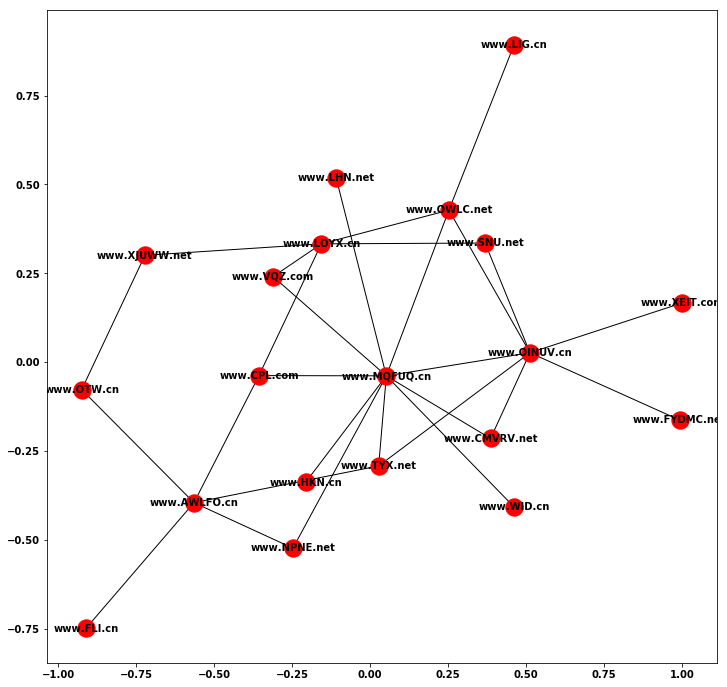

In [294]:
plt.figure(3, figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [298]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)  #pagerank被链接的次数越多越重要

[('www.MQFUQ.cn', 0.17549624516545487),
 ('www.OINUV.cn', 0.11596837056955925),
 ('www.AWLFO.cn', 0.09782744300196061),
 ('www.LOYX.cn', 0.0813009876738478),
 ('www.OWLC.net', 0.0675369963269366),
 ('www.TYX.net', 0.04900122344944293),
 ('www.CPL.com', 0.04874042899747728),
 ('www.OTW.cn', 0.0371262676799706),
 ('www.XJUWW.net', 0.03709936391728725),
 ('www.SNU.net', 0.03540236850420984),
 ('www.CMVRV.net', 0.03514245601600058),
 ('www.NPNE.net', 0.034919641971355185),
 ('www.VQZ.com', 0.03488166156403493),
 ('www.LIG.cn', 0.021851991159105914),
 ('www.FYDMC.net', 0.021581581478087745),
 ('www.XEIT.com', 0.021581581478087745),
 ('www.FLI.cn', 0.02135876743344235),
 ('www.HKN.cn', 0.02106087453791284),
 ('www.LHN.net', 0.02106087453791284),
 ('www.WID.cn', 0.02106087453791284)]